***

<font color=seagreen>
#################################################################################
<br> This notebook was written for a university project.
</font>
<br>
<font color=seagreen>
#################################################################################


# Homework assignment notebook

### General information:
- The homework assignment can be conducted in groups of 1 to 2 people (1 homework submission per group). 
- The homework should be submitted via email to <font color=blue>**rakers[at]pharm.kyoto-u.ac.jp**</font> using the **subject "homework - data analysis"**
- <font color=blue> **Deadline: 1st of August (Thu)**</font>
<br>

### General evaluation criteria:

- Quality of workflow execution 
- Documentation/ reporting of executed steps (data analysis procedures) 
- Interpretation of findings/ results
- *Bonus points for*: 
    - Creativity (e.g. in applying new statistical or technical methods, finding new ways to visualise results, ...)
    - Depth of analysis and/or interpretation



***

### 0. Import the modules necessary for your workflow

We start by importing the display utilities in order to print some markdown, format the dates, and then we import pandas, matplot, numpy and seaborn in order to gather the dataset, manipulate and print some information from it, and we import the sklearn modules to apply the K-means, linear and random forest regressions.

In [1]:
from IPython.display import display, Markdown, Image
from datetime import datetime

import pandas as pd
import matplotlib.pyplot
import numpy as np
import seaborn
import pydot

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz

In [2]:
%matplotlib inline

### 1. Pick a dataset and load it into jupyter

For this homework, I decided to use the regularity dataset provided by the SNCF for French  regional trains. <br>
The dataset is available <a href="https://data.sncf.com/explore/dataset/regularite-mensuelle-ter/table/?disjunctive.region&sort=date">here (link in french)</a><br>
<br>
We first define the API endpoint in order to download the dataset. We also define useful variables such as the number of datapoints, the date of the first recorded,and the date of the last recorded.<br>
<br>
We then convert the dates to readable formats, we fill NaN values with 0 in order to avoid any type of problem, and we convert some fields to their real types as it is not automatically done.<br>
<br>
For debugging purposes, we also display the table to check what informations are available, and how they are organized.

In [3]:
url = "https://data.sncf.com/explore/dataset/regularite-mensuelle-ter/download/?format=csv&timezone=Asia/Tokyo"

# Utility variables : number of lines in the dataset, most recent and oldest data
countDatapoints = 0
first = ""
last = ""

In [4]:
test = pd.read_csv(url, sep=';',header=0)

# Setting the datetime type on date with the correct format
test.date = pd.to_datetime(test.date)
test.date = test.date.dt.strftime('%Y-%m')

# Filling NaN values with fake data
test.fillna(0, inplace=True)

# Converting fields to their real types
test.nombre_de_trains_programmes = test.nombre_de_trains_programmes.astype(int)
test.nombre_de_trains_ayant_circule = test.nombre_de_trains_ayant_circule.astype(int)
test.nombre_de_trains_annules = test.nombre_de_trains_annules.astype(int)
test.nombre_de_trains_en_retard_a_l_arrivee = test.nombre_de_trains_en_retard_a_l_arrivee.astype(int)

# Set utility variables
first = test.date.min()
last = test.date.max()
countDatapoints = test.id.count()

# Display the table with all the data
pd.DataFrame(test).sort_values(by='date')

id     date                      region  \
0      TER_3  2013-01                    Auvergne   
861    TER_5  2013-01                   Bourgogne   
862   TER_19  2013-01  Provence Alpes Côte d'Azur   
863   TER_20  2013-01                 Rhône Alpes   
864   TER_13  2013-01                    Lorraine   
576   TER_15  2013-01          Nord Pas de Calais   
575   TER_12  2013-01                    Limousin   
574    TER_7  2013-01                      Centre   
573    TER_6  2013-01                    Bretagne   
572    TER_1  2013-01                      Alsace   
1150  TER_18  2013-01            Poitou Charentes   
860    TER_4  2013-01             Basse Normandie   
279   TER_16  2013-01            Pays de la Loire   
278   TER_11  2013-01        Languedoc Roussillon   
277   TER_10  2013-01             Haute Normandie   
276    TER_8  2013-01           Champagne Ardenne   
859    TER_2  2013-01                   Aquitaine   
1      TER_9  2013-01               Franche Comté   
2     TER_14  2013-01               Midi Pyrénées   
3     TER_17  2013-01                    Picardie   
4      TER_7  2013-02                      Centre   
284   TER_13  2013-02                    Lorraine   
283   TER_20  2013-02                 Rhône Alpes   
282   TER_10  2013-02             Haute Normandie   
281    TER_6  2013-02                    Bretagne   
280    TER_4  2013-02             Basse Normandie   
869   TER_12  2013-02                    Limousin   
868    TER_5  2013-02                   Bourgogne   
867    TER_3  2013-02                    Auvergne   
871   TER_18  2013-02            Poitou Charentes   
...      ...      ...                         ...   
1455   TER_1  2019-12                   Grand Est   
1143  TER_14  2019-12                   Occitanie   
1142   TER_6  2019-12                    Bretagne   
854    TER_7  2019-12                      Centre   
855   TER_15  2019-12             Hauts de France   
1144  TER_19  2019-12  Provence Alpes Côte d'Azur   
565    TER_5  2019-12     Bourgogne-Franche Comté   
566   TER_16  2019-12            Pays de la Loire   
1458   TER_2  2020-01                   Aquitaine   
569   TER_19  2020-01  Provence Alpes Côte d'Azur   
1145   TER_6  2020-01                    Bretagne   
1146   TER_7  2020-01                      Centre   
1147  TER_16  2020-01            Pays de la Loire   
567    TER_5  2020-01     Bourgogne-Franche Comté   
568   TER_15  2020-01             Hauts de France   
856    TER_1  2020-01                   Grand Est   
271    TER_3  2020-01        Auvergne-Rhône Alpes   
273   TER_14  2020-01                   Occitanie   
272    TER_4  2020-01                   Normandie   
857    TER_4  2020-02                   Normandie   
1459   TER_2  2020-02                   Aquitaine   
275   TER_19  2020-02  Provence Alpes Côte d'Azur   
1149   TER_6  2020-02                    Bretagne   
1148   TER_5  2020-02     Bourgogne-Franche Comté   
570    TER_1  2020-02                   Grand Est   
571   TER_16  2020-02            Pays de la Loire   
1460   TER_7  2020-02                      Centre   
858   TER_15  2020-02             Hauts de France   
274    TER_3  2020-02        Auvergne-Rhône Alpes   
1461  TER_14  2020-02                   Occitanie   

      nombre_de_trains_programmes  nombre_de_trains_ayant_circule  \
0                            5785                            5732   
861                          8400                            8332   
862                         13956                           13219   
863                         31438                           30779   
864                             0                               0   
576                         19227                           18890   
575                          3817                            3770   
574                          9882                            9687   
573                          8776                            8631   
572                         20095

### 2. Data inspection
Describe the raw data (For example: What is the source and background of the data? What kind of descriptors does it include? How many data points? Which attribute(s) could be used for prediction tasks (e.g. classification)?). <br> The following aspects might help to assess the data: 
- Number and types of attributes
- Number of instances per attribute
- Numeric data ranges of attributes
- Distribution of data values per attribute (e.g. through plotting histograms and/or applying kernel density estimator plotting function (KDE)) 
- Use scatter plots to visualise the relationship between some of the descriptors 
- ...

The data represents the monthly regularity rates for the french local trains between 2013-01 and 2020-02.

There are 1462 datapoints inside of this dataset. It contains the following 10 fields :

id                                                               object
date                                                             object
region                                                           object
nombre_de_trains_programmes                                       int32
nombre_de_trains_ayant_circule                                    int32
nombre_de_trains_annules                                          int32
nombre_de_trains_en_retard_a_l_arrivee                            int32
taux_de_ponctualite                                             float64
nombre_de_trains_a_lheure_pour_un_train_en_retard_a_larrivee    float64
commentaires                                                     object
dtype: object


The data distribution for each attribute is represented via the following boxplot :

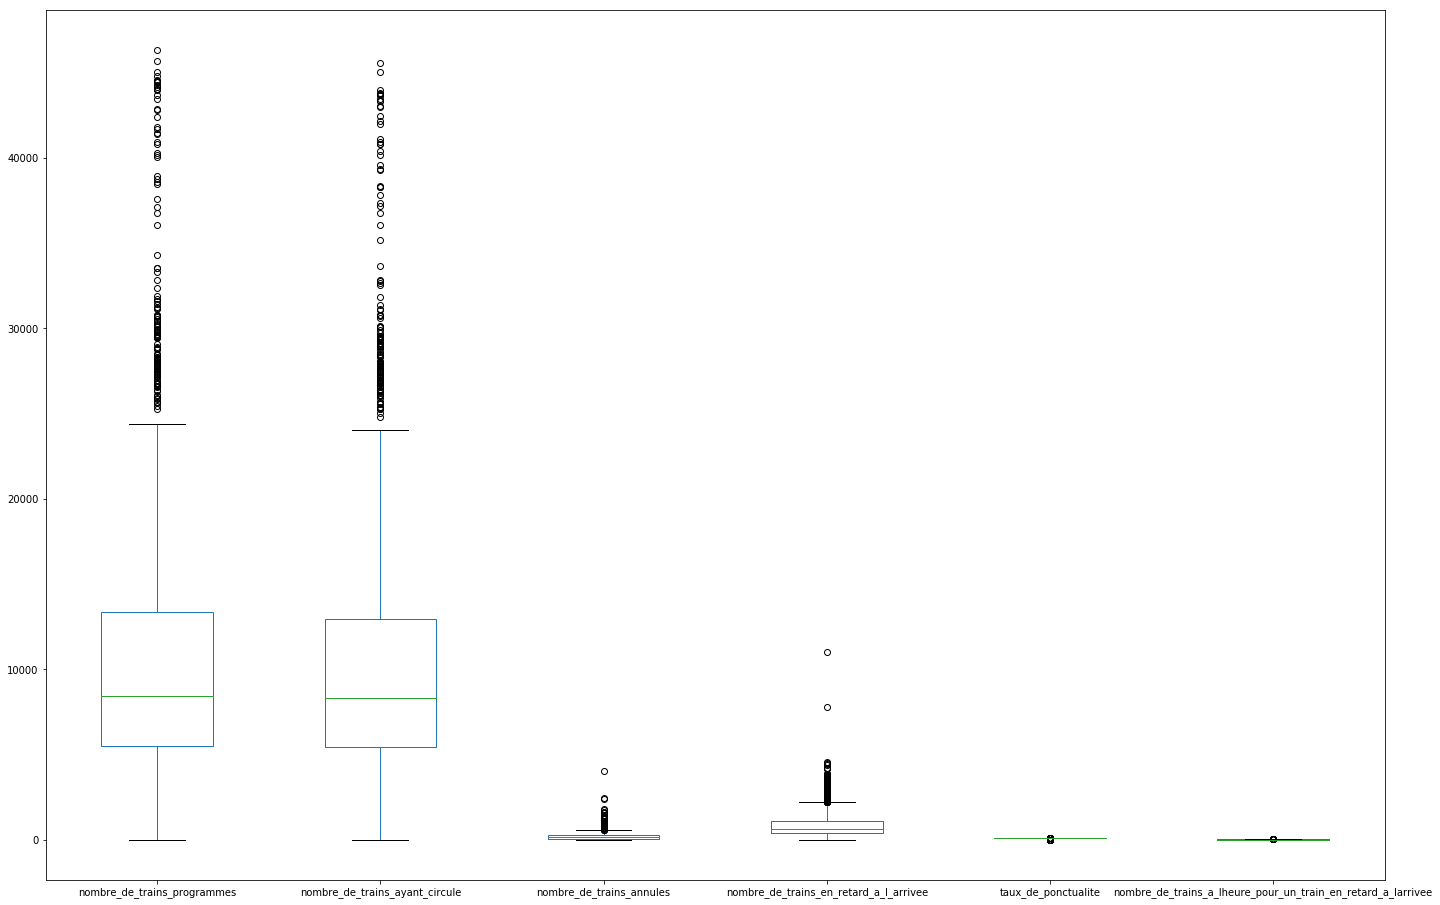

In [5]:
display(Markdown("The data represents the monthly regularity rates for the french local trains between "+first+" and "+last+"."))
display(Markdown("There are "+str(countDatapoints)+" datapoints inside of this dataset. It contains the following "+str(len(test.dtypes))+" fields :"))
print(test.dtypes)
display(Markdown("The data distribution for each attribute is represented via the following boxplot :"))
test.plot.box(figsize=(24, 16))

Source: https://data.sncf.com/explore/dataset/regularite-mensuelle-ter/table/?disjunctive.region&sort=date

The header for the CSV file downloaded previously is the following :

ID;Date;Région;Nombre de trains programmés;Nombre de trains ayant circulé;Nombre de trains annulés;Nombre de trains en retard à l'arrivée;Taux de régularité;Nombre de trains à l'heure pour un train en retard à l'arrivée;Commentaires

A datapoint looks like this :

TER_3;2013-01;Auvergne;5785;5732;53;431;92.5;12.3;Conditions météos défavorables.
    
Each datapoint has the following 10 fields (the names are french in the dataset, the descriptions are translated for more convenience):

    - id : id of the region concerned
    - date : YYYY-MM Year and month for those results
    - région : name of the concerned region
    - nombre de trains programmés : Number of scheduled trains for the month - no range
    - nombre de trains ayant circulé : number of scheduled trains that have effectively circulated - between 0 and the value of
    nombre_de_trains_programmes
    - nombre de trains annulés : number of scheduled trains that were cancelled - between 0 and the value of 
    nombre_de_trains_programmes
    - nombre de trains en retard à l'arrivée : Number of trains delayed among the scheduled trains - between 0 and the value of
    nombre_de_trains_programmes
    - taux de ponctualité : punctuality rate (percentage of trains on time) - Between -100 and 100. Some datapoints don't have this
    value, so the default value will be 0
    - nombre de trains à l'heure pour un train en retard à l'arrivée : number of trains that effectively arrived on time for 1 train 
    cancelled (in the example, 10 trains were on time for one delayed.
    - commentaires : various comments written by the managers about the reasons why trains were delayed or cancelled, and 
    observations about the different indicators and results

Some of those fields can be absent, as one region did not disclosed it's punctuality results until 2015, and some of the datapoints may have been filled incorrectly by the transportation authority. In this case, the fields will contain a 0 when concerned by those restrictions.<br>
<br>
For the prediction tasks, we can basically use all the attributes, expect for the Commentaires section which contains only informations meant to have a deeper understanding of the data and that are not formatted in a computer-readable format nor in english language. It would have been better to have a standardized system which classifies the situations depending of the context, but this is strictly a limitation of the dataset.<br>
<br>
We now display several scatter plots to display the relationships between several attributes. Those relationships are the most present in the dataset, especially for the linear between the number of scheduled trains and any other attribute related to a number of trains.

Relationship between the number of scheduled trains and the number of trains that have effectively run

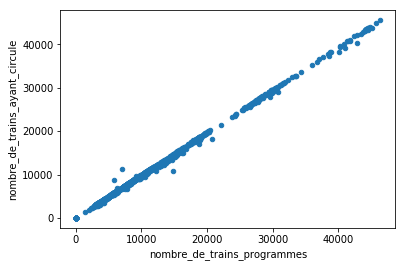

In [6]:
display(Markdown("Relationship between the number of scheduled trains and the number of trains that have effectively run"))
test.plot.scatter(x="nombre_de_trains_programmes", y="nombre_de_trains_ayant_circule")

Relationship between the number of scheduled trains and the number of cancelled trains

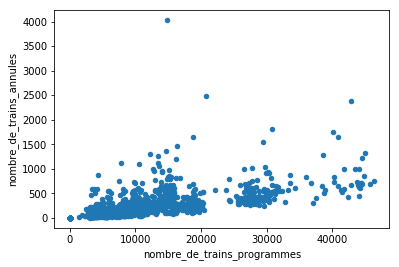

In [8]:
display(Markdown("Relationship between the number of scheduled trains and the number of cancelled trains"))
test.plot.scatter(x="nombre_de_trains_programmes", y="nombre_de_trains_annules")

Relationship between the number of scheduled trains and the punctuality rate

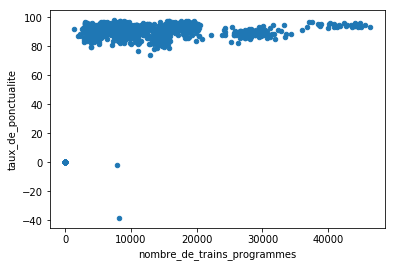

In [9]:
display(Markdown("Relationship between the number of scheduled trains and the punctuality rate"))
test.plot.scatter(x="nombre_de_trains_programmes", y="taux_de_ponctualite")

Relationship between the number of scheduled trains and the number of trains on time for one delayed train

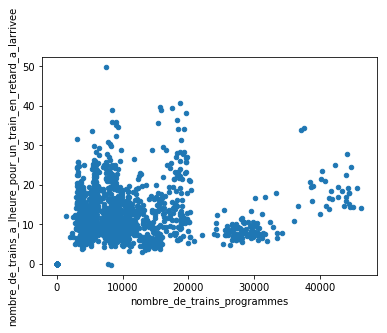

In [10]:
display(Markdown("Relationship between the number of scheduled trains and the number of trains on time for one delayed train"))
test.plot.scatter(x="nombre_de_trains_programmes", y="nombre_de_trains_a_lheure_pour_un_train_en_retard_a_larrivee")

Relationship between the punctuality rate and the number of trains on time for one delayed train

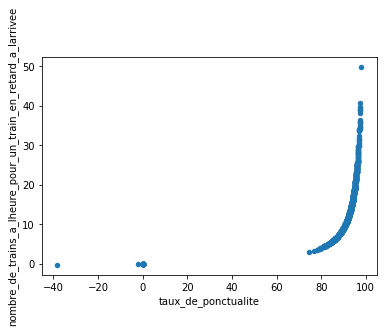

In [11]:
display(Markdown("Relationship between the punctuality rate and the number of trains on time for one delayed train"))
test.plot.scatter(x="taux_de_ponctualite", y="nombre_de_trains_a_lheure_pour_un_train_en_retard_a_larrivee")

### 3. Basic data exploration
Analyse your data in terms of measures of central tendency and dispersion (Calculation of statistics AND visualization). <br>
(Examples: mean, median, standard deviation, variance, 25th/75th percentile, ...) <br>

In [12]:
display(Markdown("The global data analysis gives us the following :"))
pd.DataFrame(test).describe()

The global data analysis gives us the following :

nombre_de_trains_programmes  nombre_de_trains_ayant_circule  \
count                  1462.000000                     1462.000000   
mean                  10824.285910                    10607.298906   
std                    8333.604446                     8169.137232   
min                       0.000000                        0.000000   
25%                    5498.500000                     5426.750000   
50%                    8412.500000                     8281.500000   
75%                   13331.500000                    12949.750000   
max                   46329.000000                    45569.000000   

       nombre_de_trains_annules  nombre_de_trains_en_retard_a_l_arrivee  \
count               1462.000000                             1462.000000   
mean                 222.194938                              947.478796   
std                  263.820233                              899.507293   
min                    0.000000                                0.000000   
25%                   70.000000                              369.000000   
50%                  134.000000                              654.000000   
75%                  280.000000                             1106.500000   
max                 4024.000000                            10996.000000   

       taux_de_ponctualite  \
count          1462.000000   
mean             88.832353   
std              15.326816   
min             -38.400000   
25%              88.800000   
50%              91.700000   
75%              93.900000   
max              98.000000   

       nombre_de_trains_a_lheure_pour_un_train_en_retard_a_larrivee  
count                                        1462.000000             
mean                                           12.330711             
std                                             6.387889             
min                                            -0.300000             
25%                                             8.000000             
50%                                            11.000000             
75%                                            15.500000             
max                                            49.700000

We then display plots of the punctuality rates for each region per month, and the means and medians for each set

Displaying punctuality rates per month for each region, along with means and medians

Region : Grand Est
Mean : 95.47093023255812
Median : 95.6


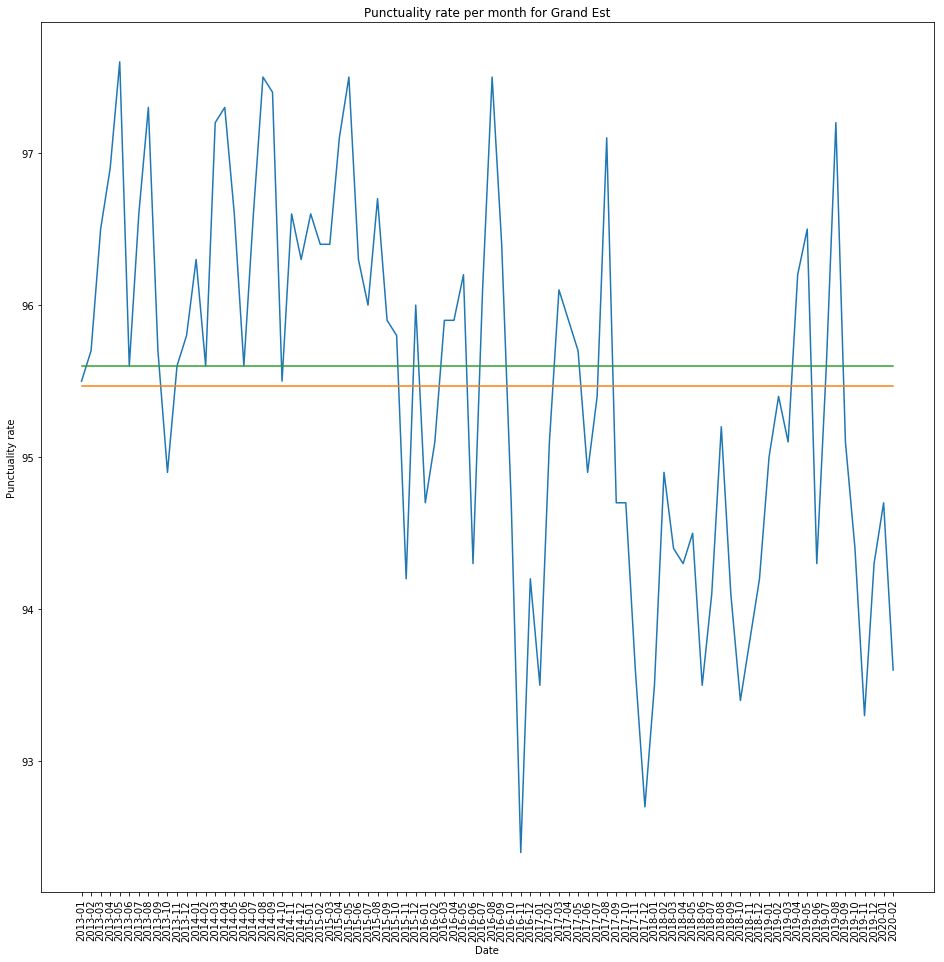

Region : Aquitaine
Mean : 89.15813953488373
Median : 89.2


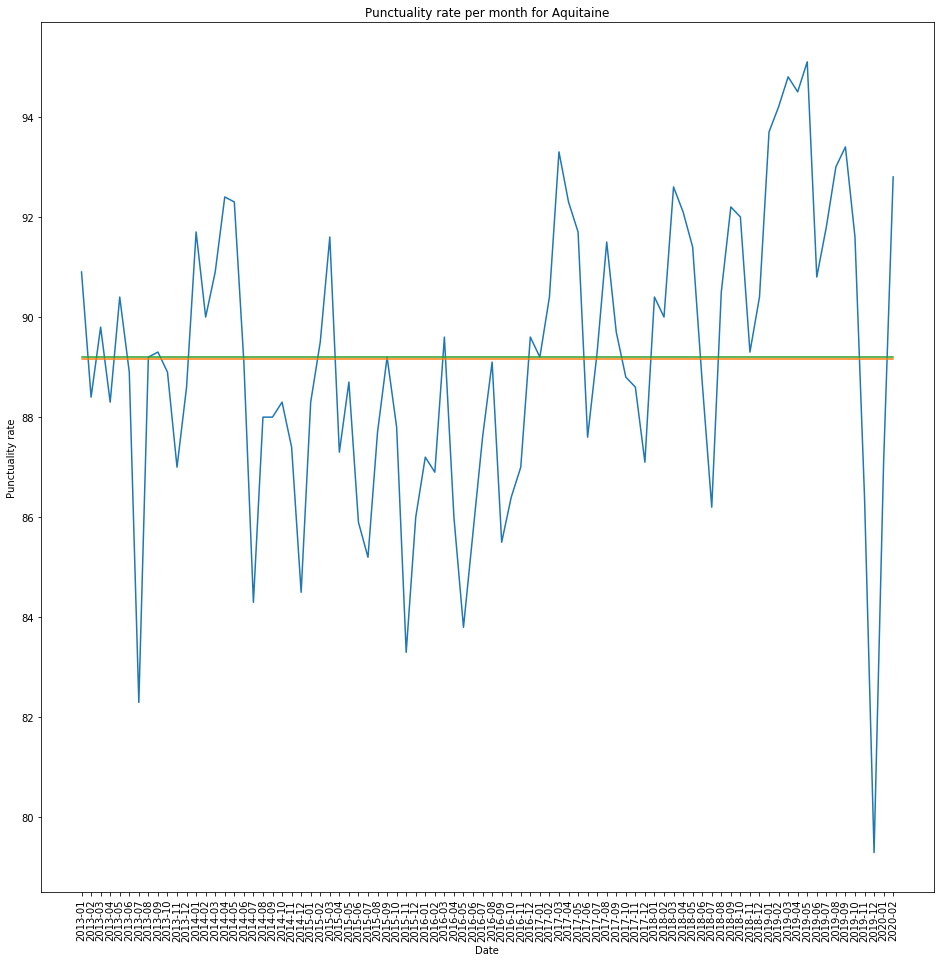

Region : Auvergne-Rhône Alpes
Mean : 91.72674418604652
Median : 92.35


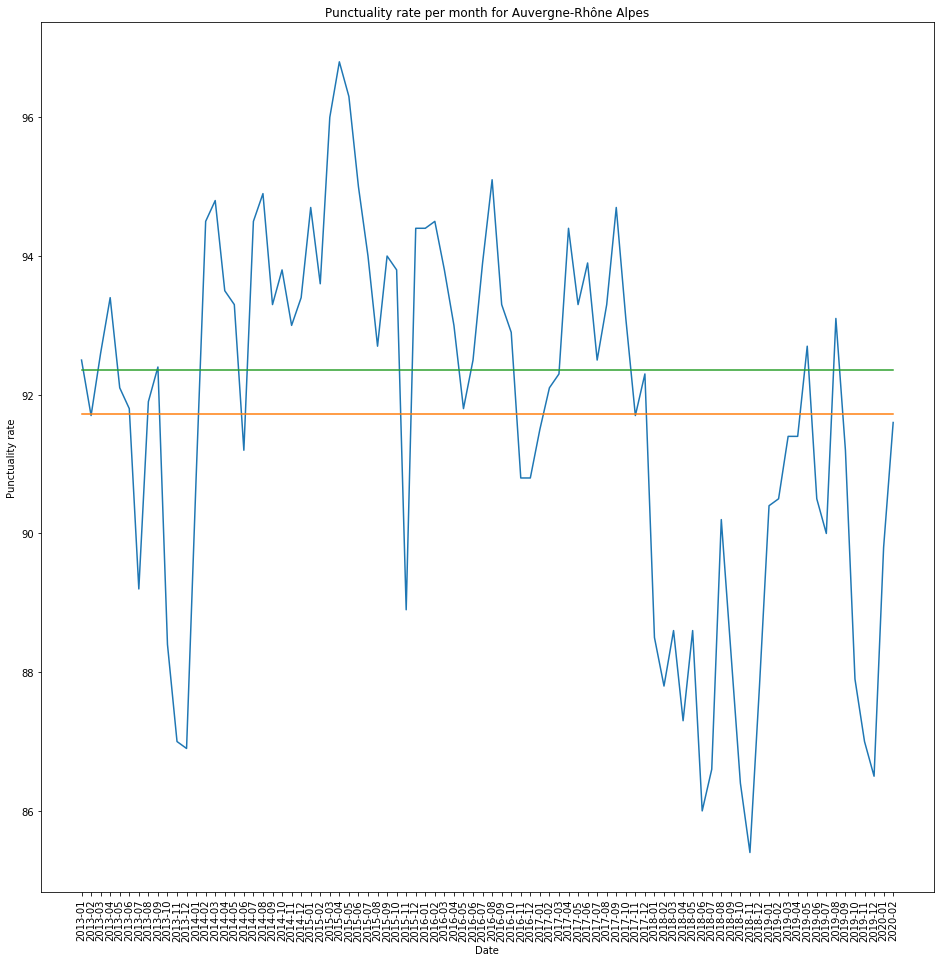

Region : Normandie
Mean : 93.2906976744186
Median : 93.9


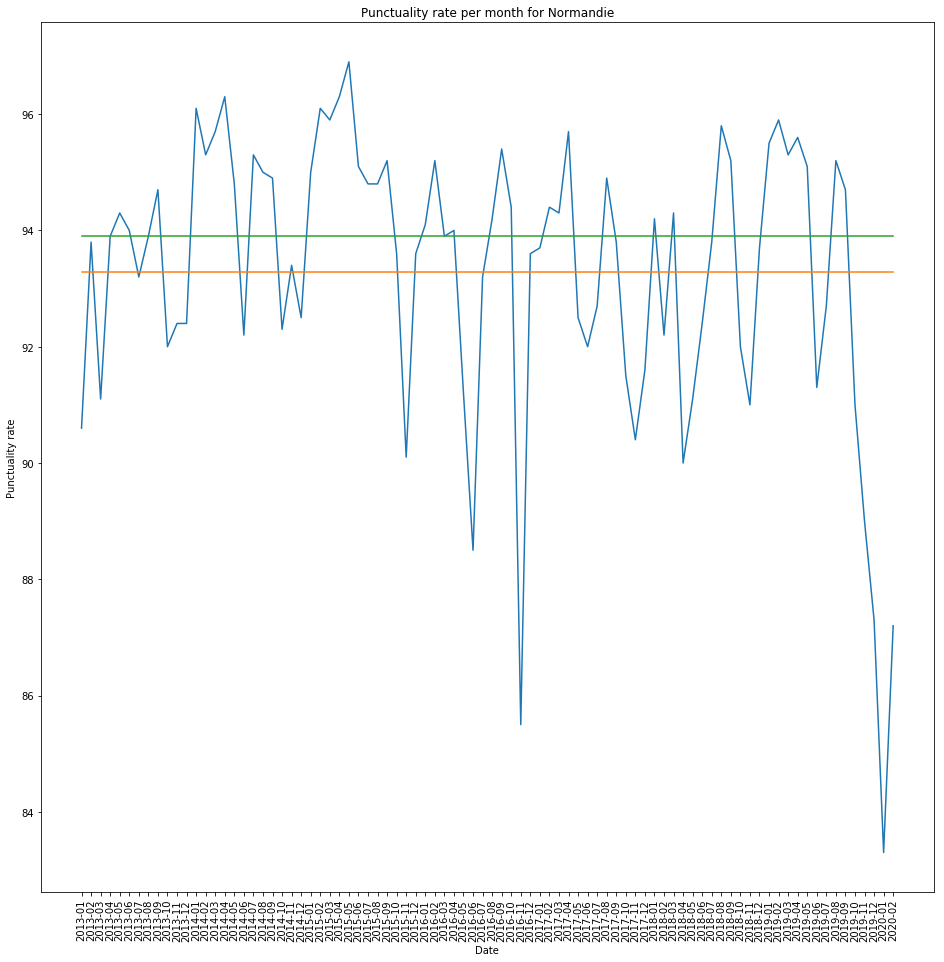

Region : Bourgogne-Franche Comté
Mean : 91.25232558139535
Median : 91.5


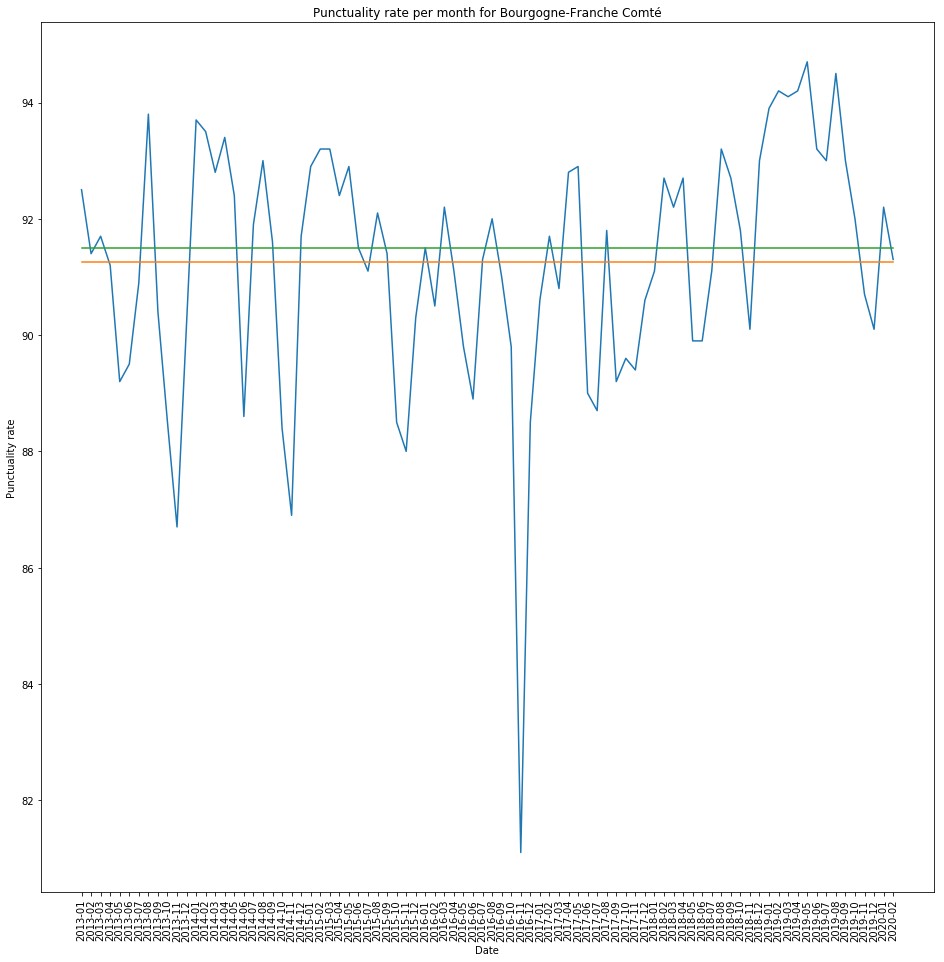

Region : Bretagne
Mean : 94.66860465116284
Median : 95.15


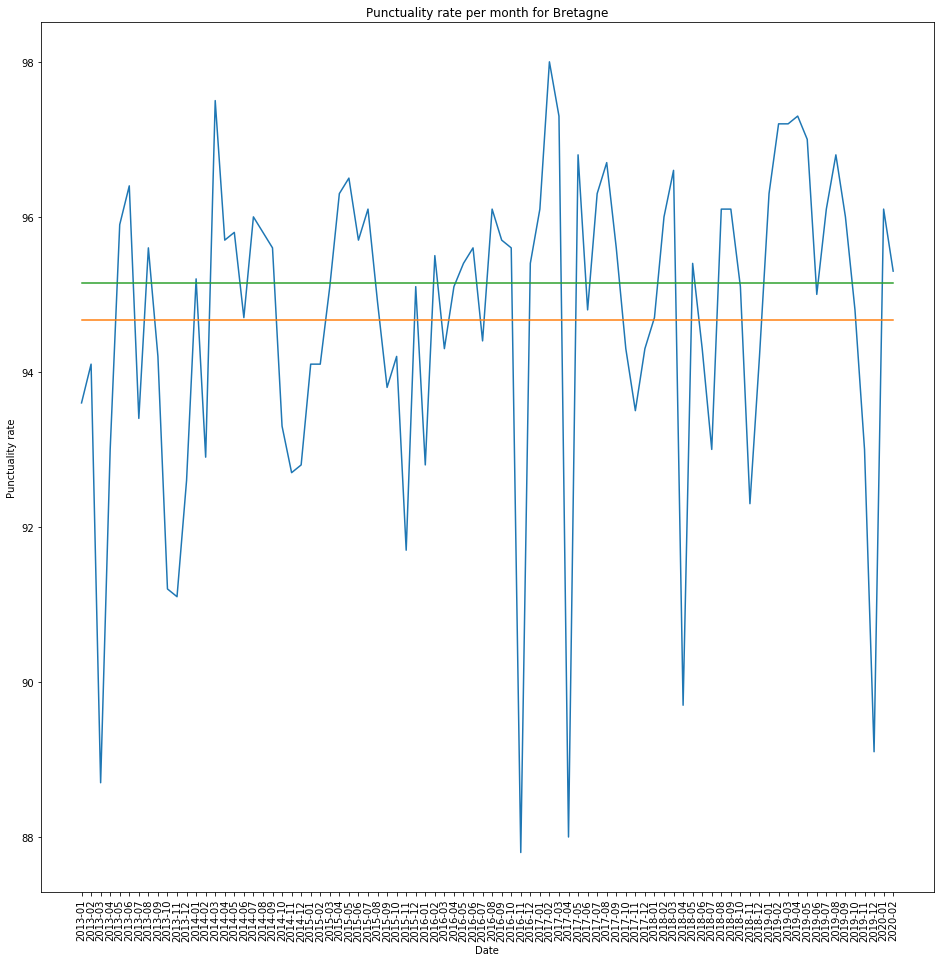

Region : Centre
Mean : 91.59302325581396
Median : 92.0


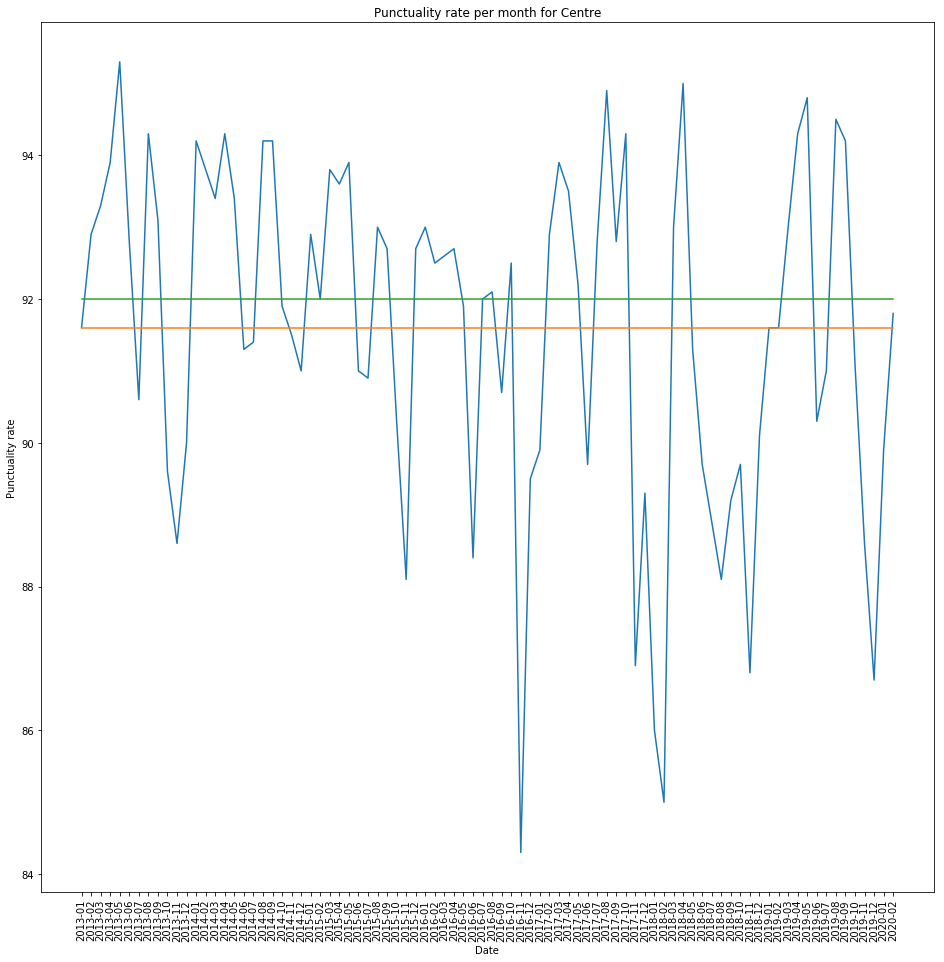

Region : Champagne Ardenne
Mean : 94.47916666666667
Median : 94.9


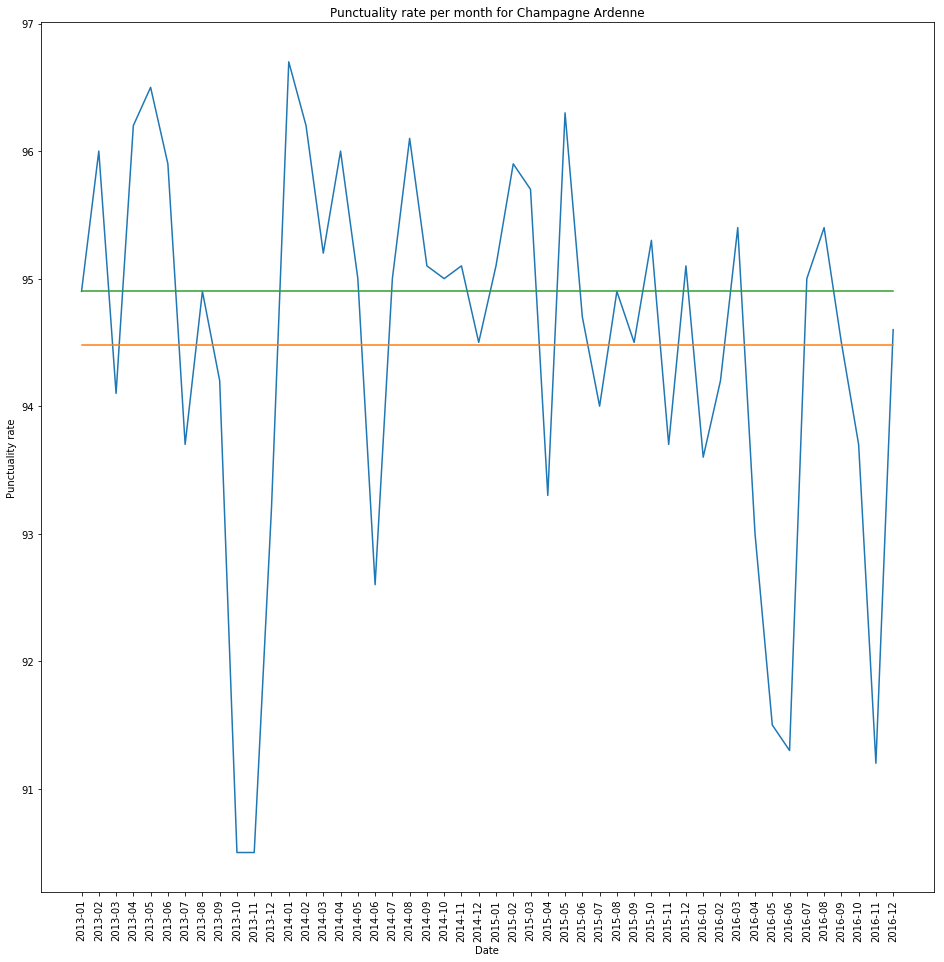

Region : Franche Comté
Mean : 91.71000000000001
Median : 91.95


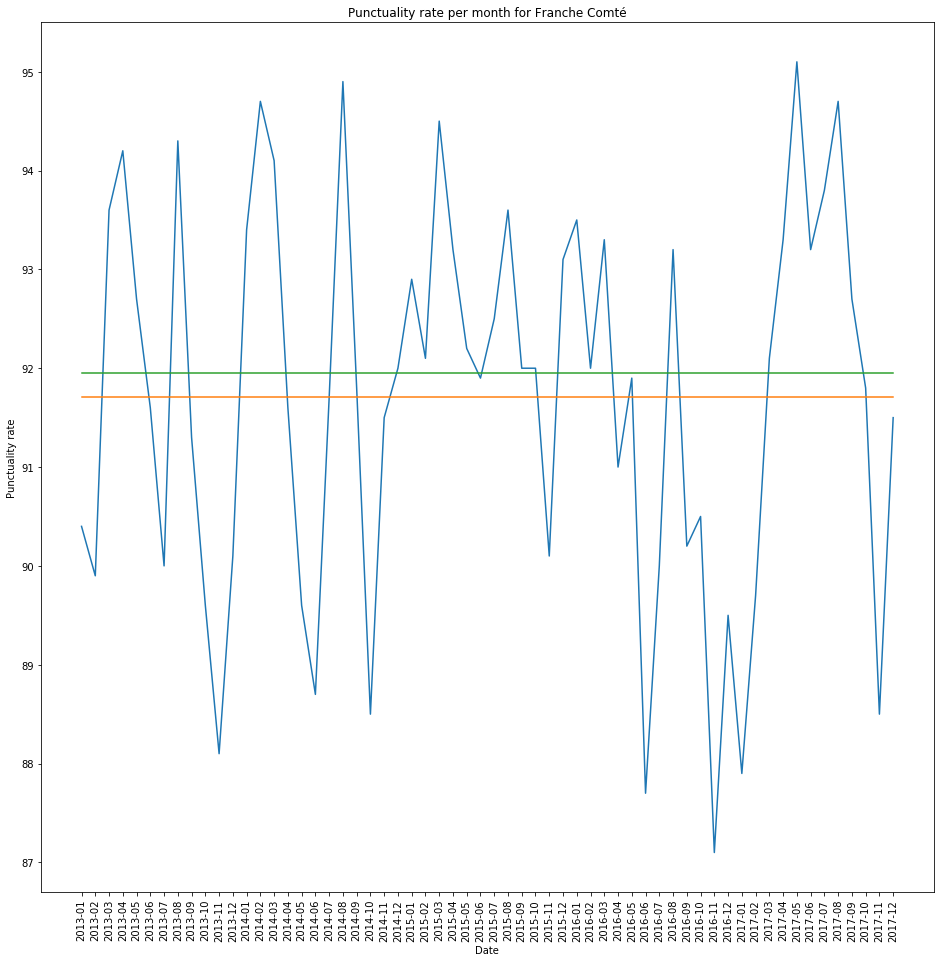

Region : Haute Normandie
Mean : 94.51666666666665
Median : 94.80000000000001


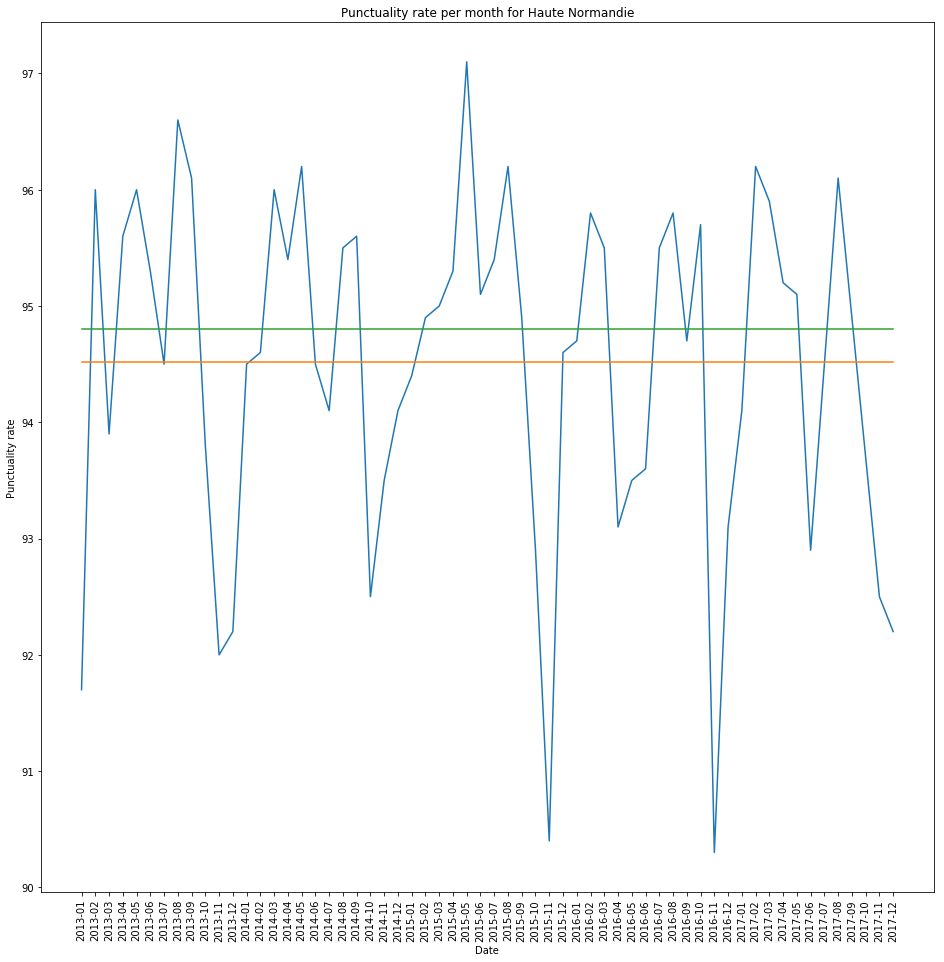

Region : Languedoc Roussillon
Mean : 88.30999999999997
Median : 88.75


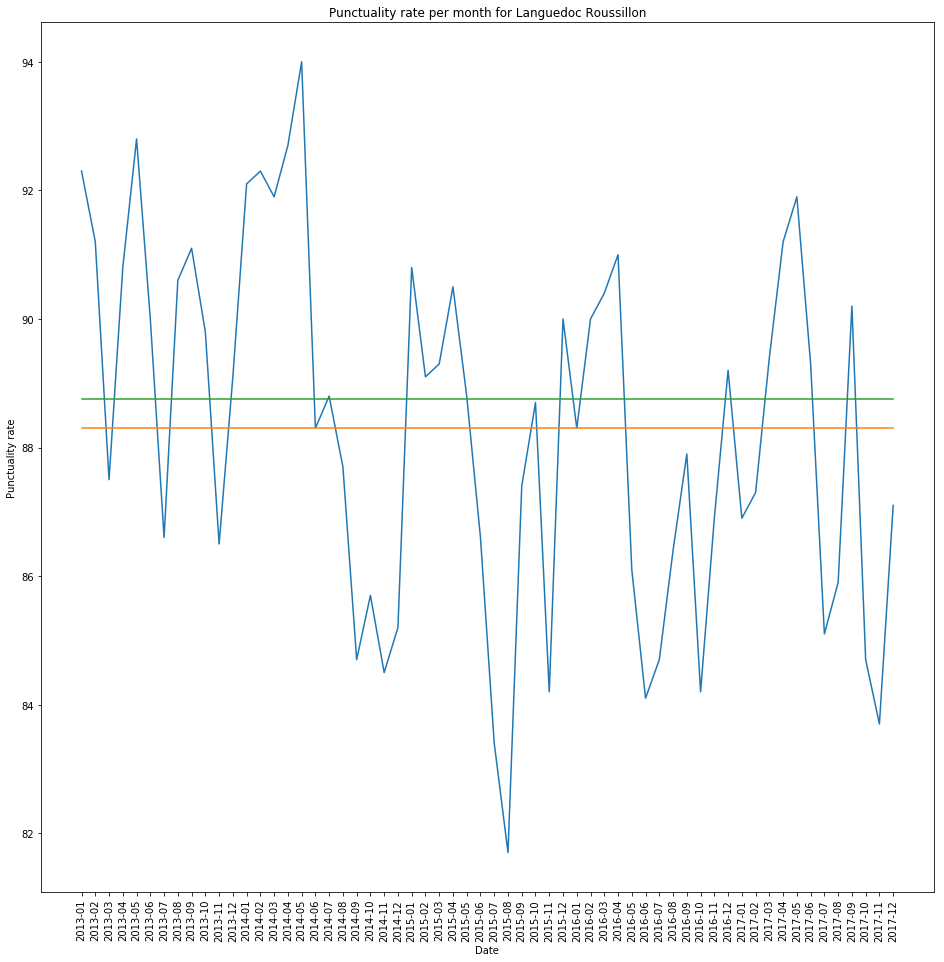

Region : Limousin
Mean : 91.29166666666666
Median : 91.85


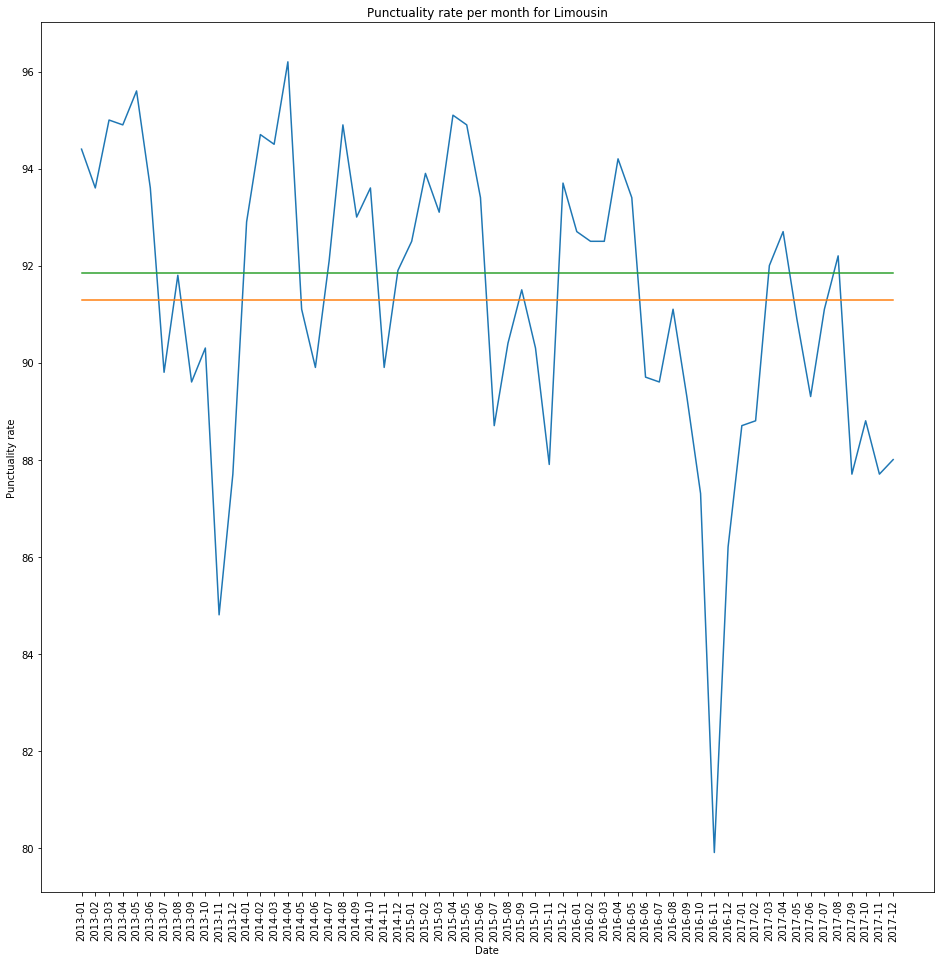

Region : Lorraine
Mean : 25.72708333333334
Median : 0.0


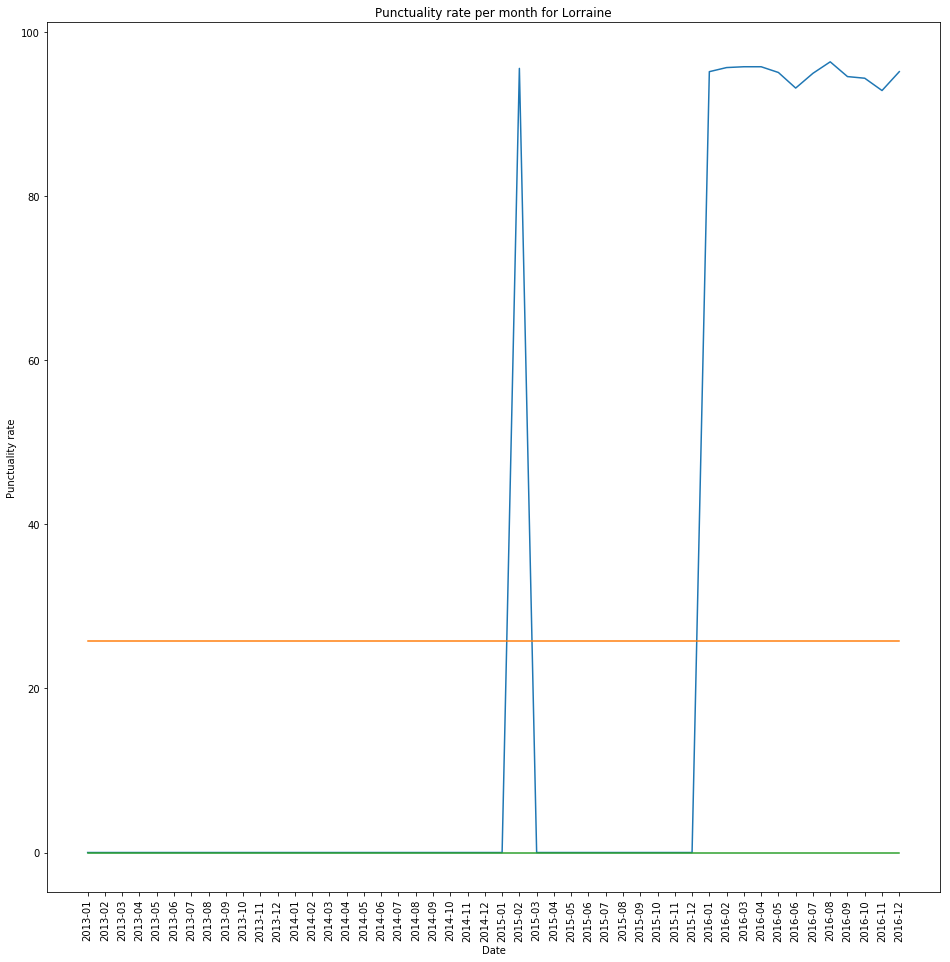

Region : Occitanie
Mean : 86.71279069767444
Median : 89.65


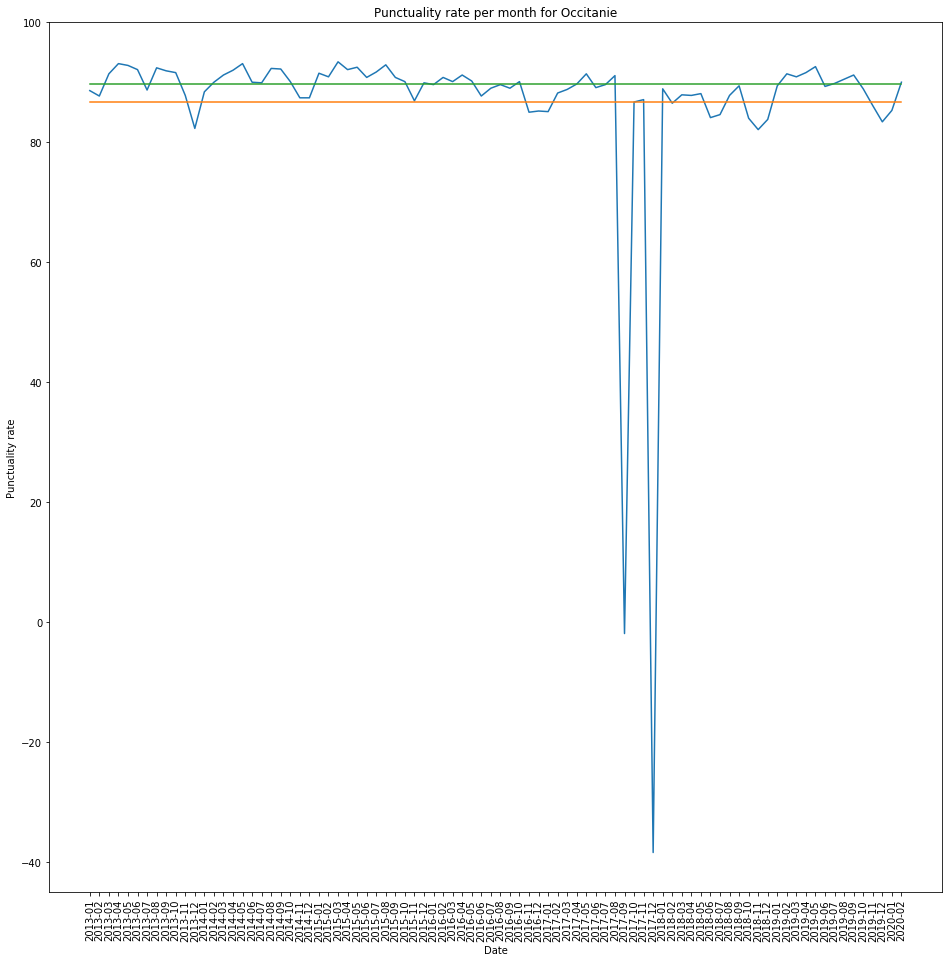

Region : Hauts de France
Mean : 88.89186046511628
Median : 91.4


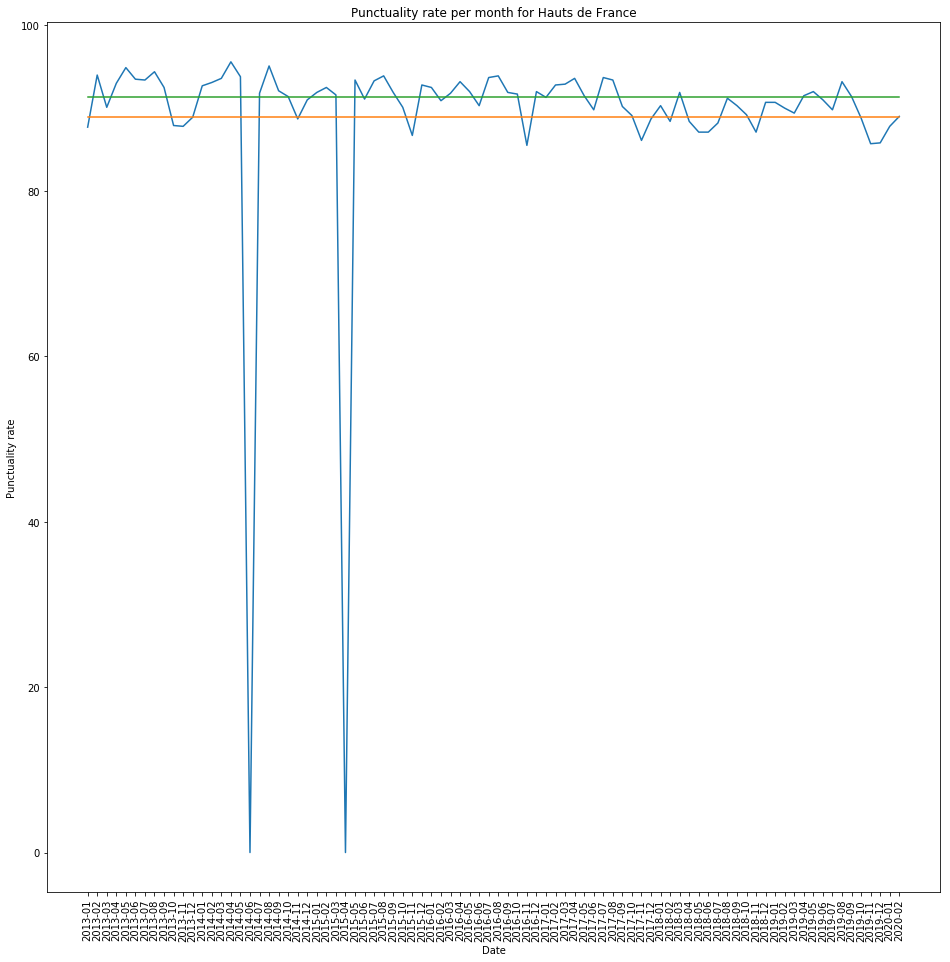

Region : Pays de la Loire
Mean : 92.11162790697676
Median : 92.6


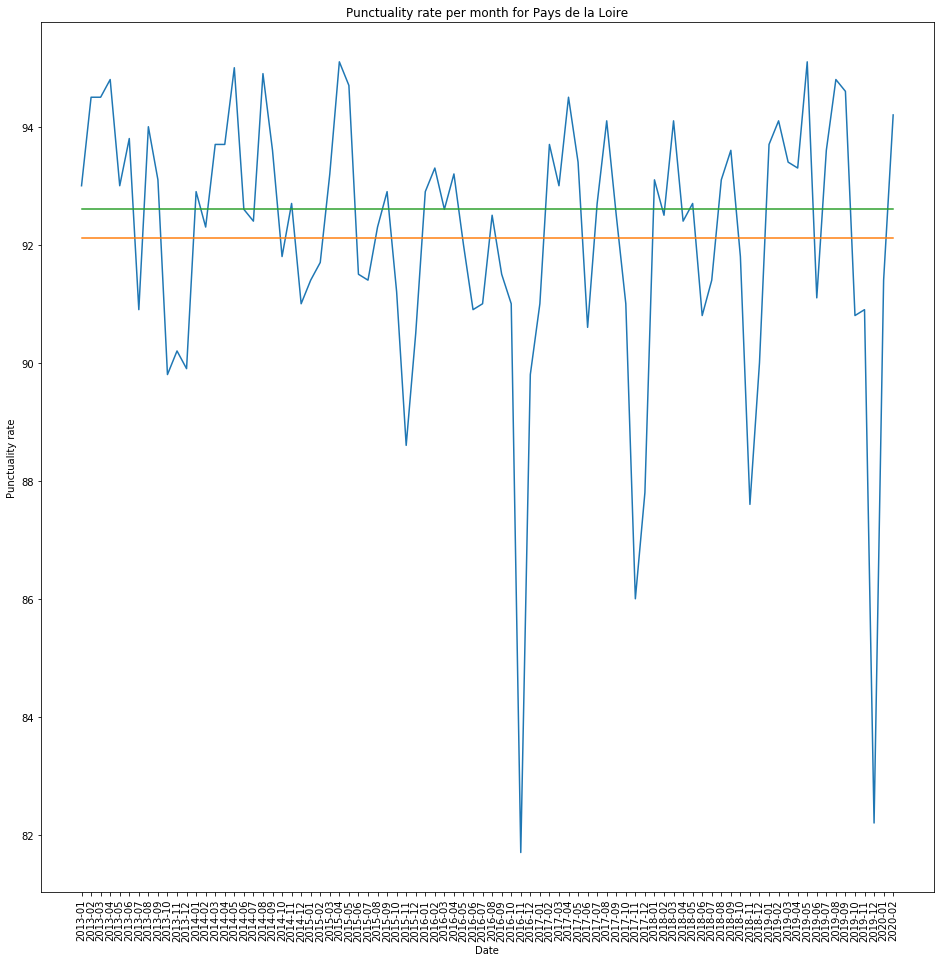

Region : Picardie
Mean : 91.02
Median : 91.05


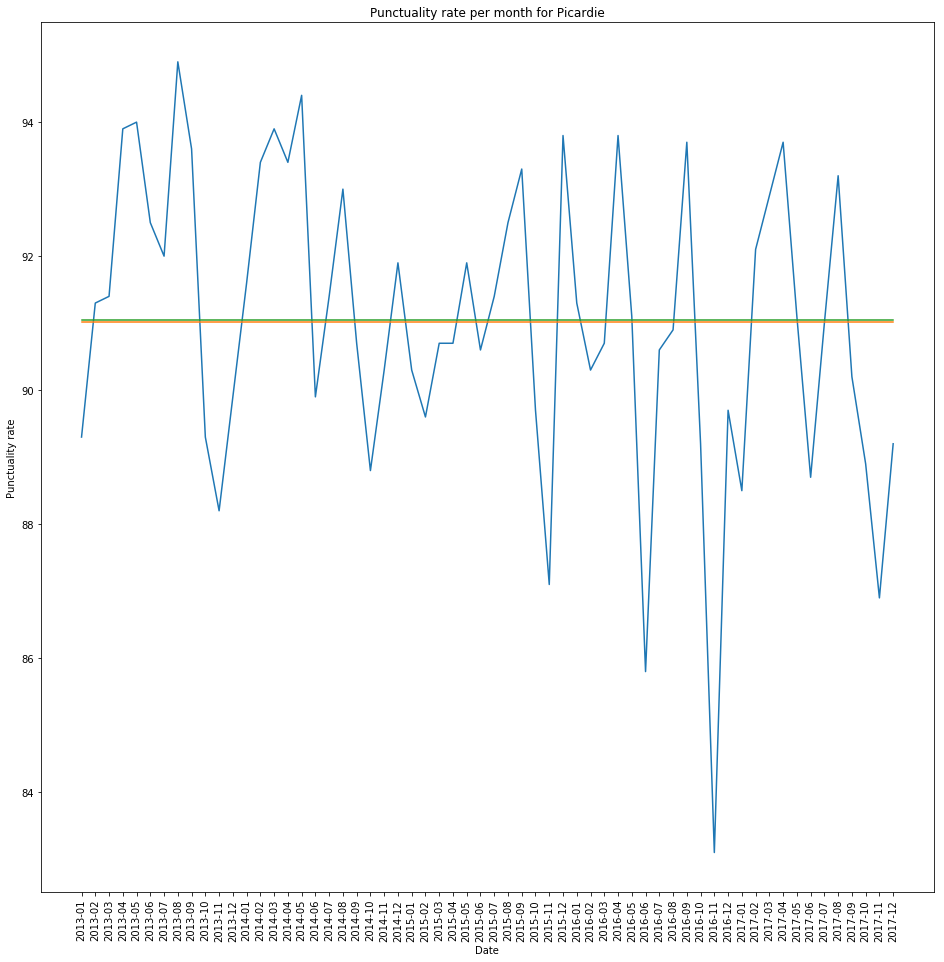

Region : Poitou Charentes
Mean : 90.88166666666666
Median : 91.1


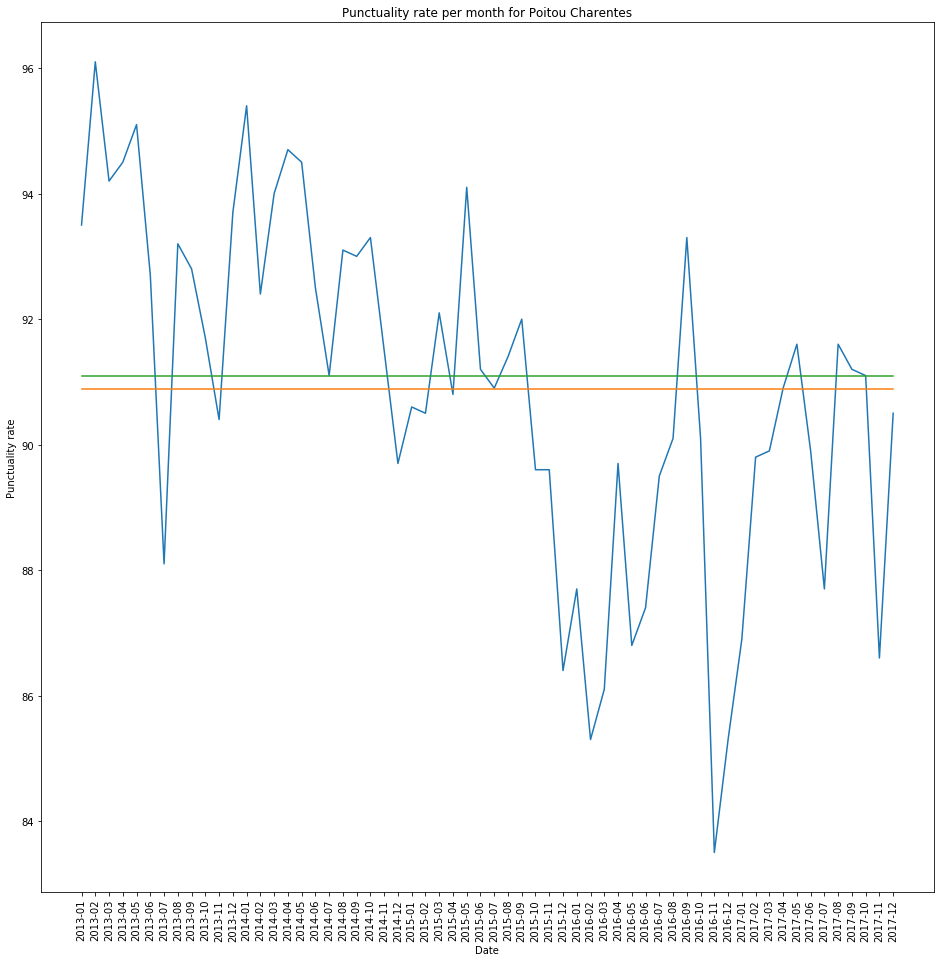

Region : Provence Alpes Côte d'Azur
Mean : 84.60697674418607
Median : 84.8


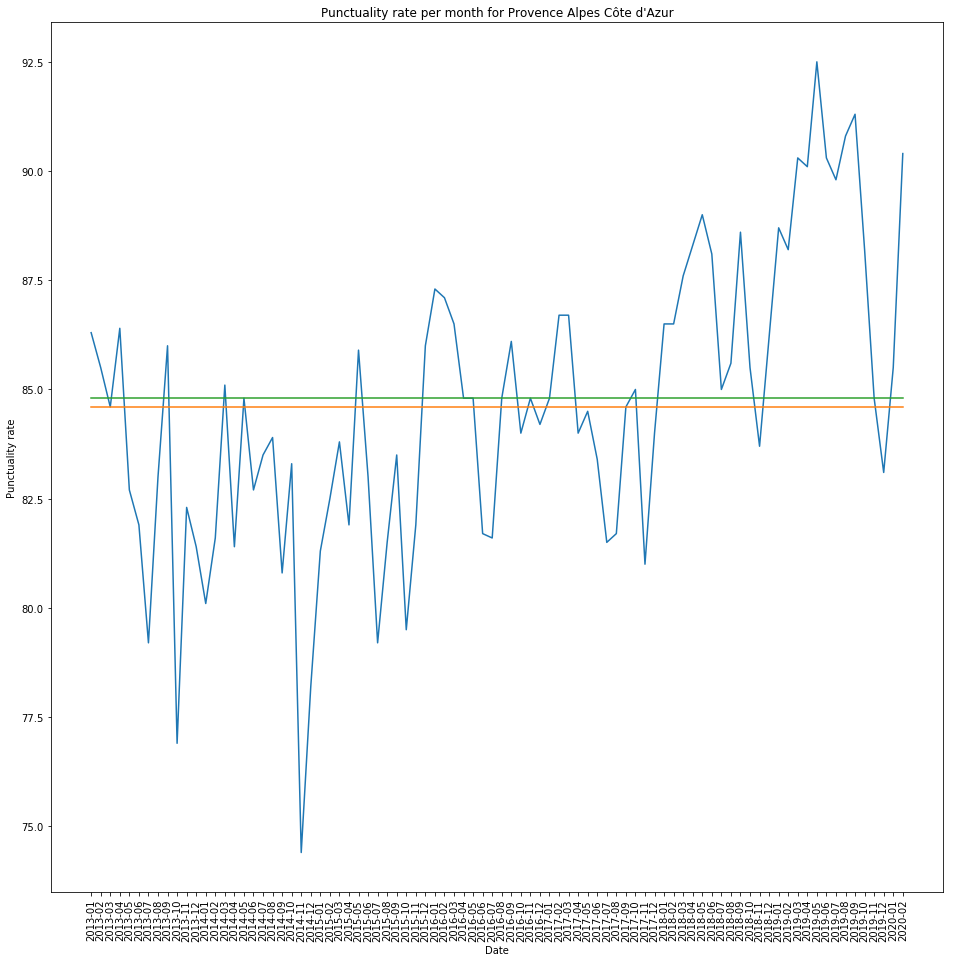

In [13]:
print("Displaying punctuality rates per month for each region, along with means and medians\n")
for i in range(1,20):
    # Create the id to sort and filter the data
    id = "TER_"+str(i)
    
    # Filter to keep only the data for the selected region, sorted by date
    m = test.loc[test.id == id].sort_values(by='date')
    
    # Draw the plot with all the parameters
    matplotlib.pyplot.rcParams["figure.figsize"] = [16.0, 16.0]
    matplotlib.pyplot.title('Punctuality rate per month for '+m.region.all())
    print("Region : "+m.region.all())
    matplotlib.pyplot.xlabel('Date')
    matplotlib.pyplot.ylabel('Punctuality rate')
    matplotlib.pyplot.xticks(rotation=90)
    matplotlib.pyplot.plot(m.date,m.taux_de_ponctualite)
    
    # Compute the mean, display and draw it
    mean = m.taux_de_ponctualite.mean()
    print("Mean : "+str(mean))
    horiz_line_data = np.array([mean for i in range(0,len(m.date))])
    matplotlib.pyplot.plot(m.date, horiz_line_data)
    
    #compute the median, display and draw it
    median = m.taux_de_ponctualite.median()
    print("Median : "+str(median))
    horiz_line_data2 = np.array([median for i in range(0,len(m.date))])
    matplotlib.pyplot.plot(m.date, horiz_line_data2)
    
    matplotlib.pyplot.show()
    
    
#seaborn.heatmap(punct, cmap='hot')
#matplotlib.pyplot.boxplot(punct, date)

We then display the Boxplots for each region. They report, for each numerical attribute related to the number of trains (number of trains scheduled, that have circulated, delayed at final stop and cancelled), the quartiles, means, and the upper and lower bounds.

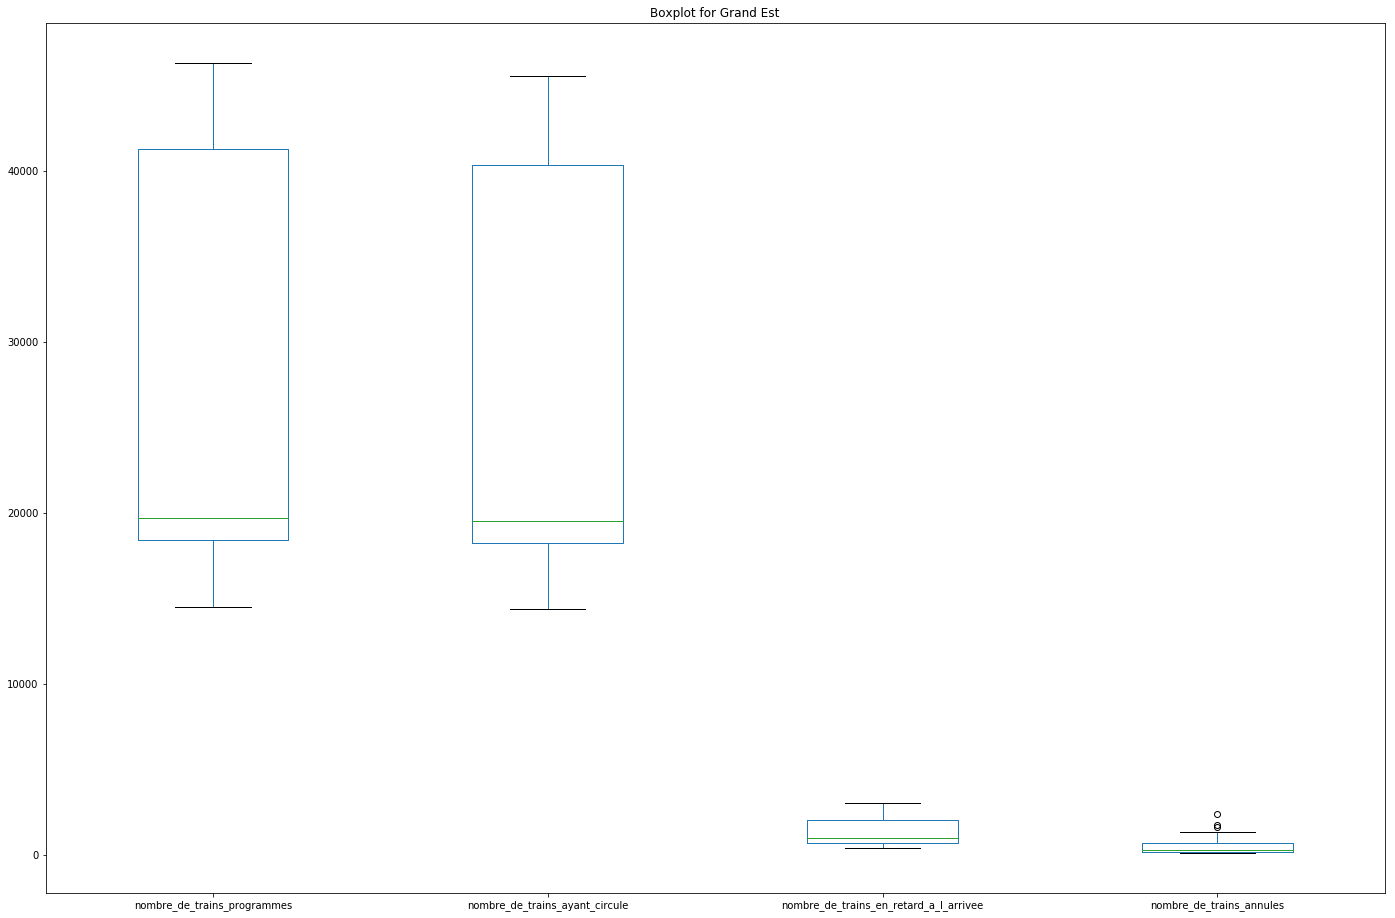

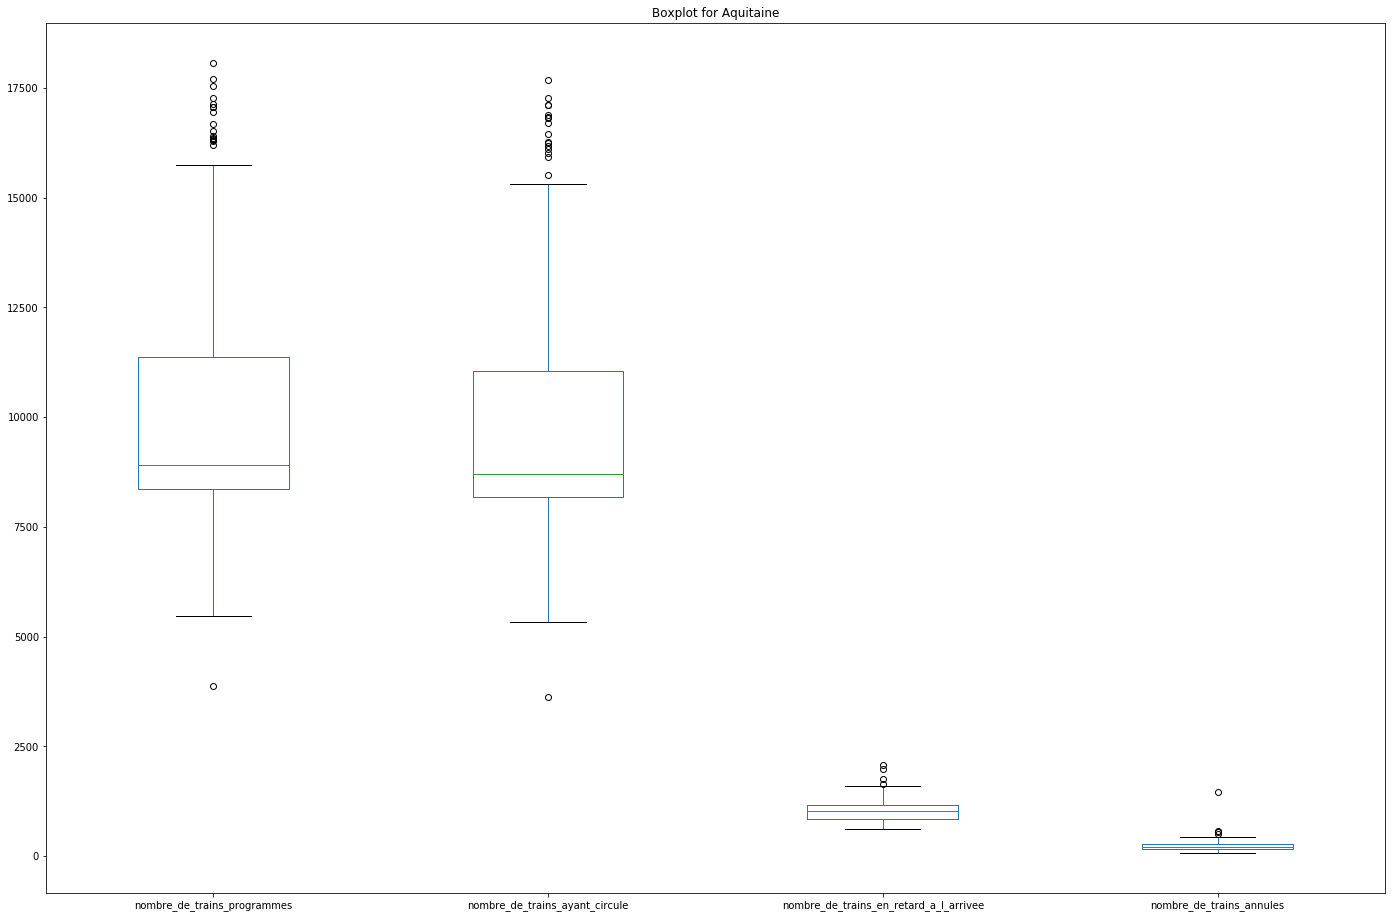

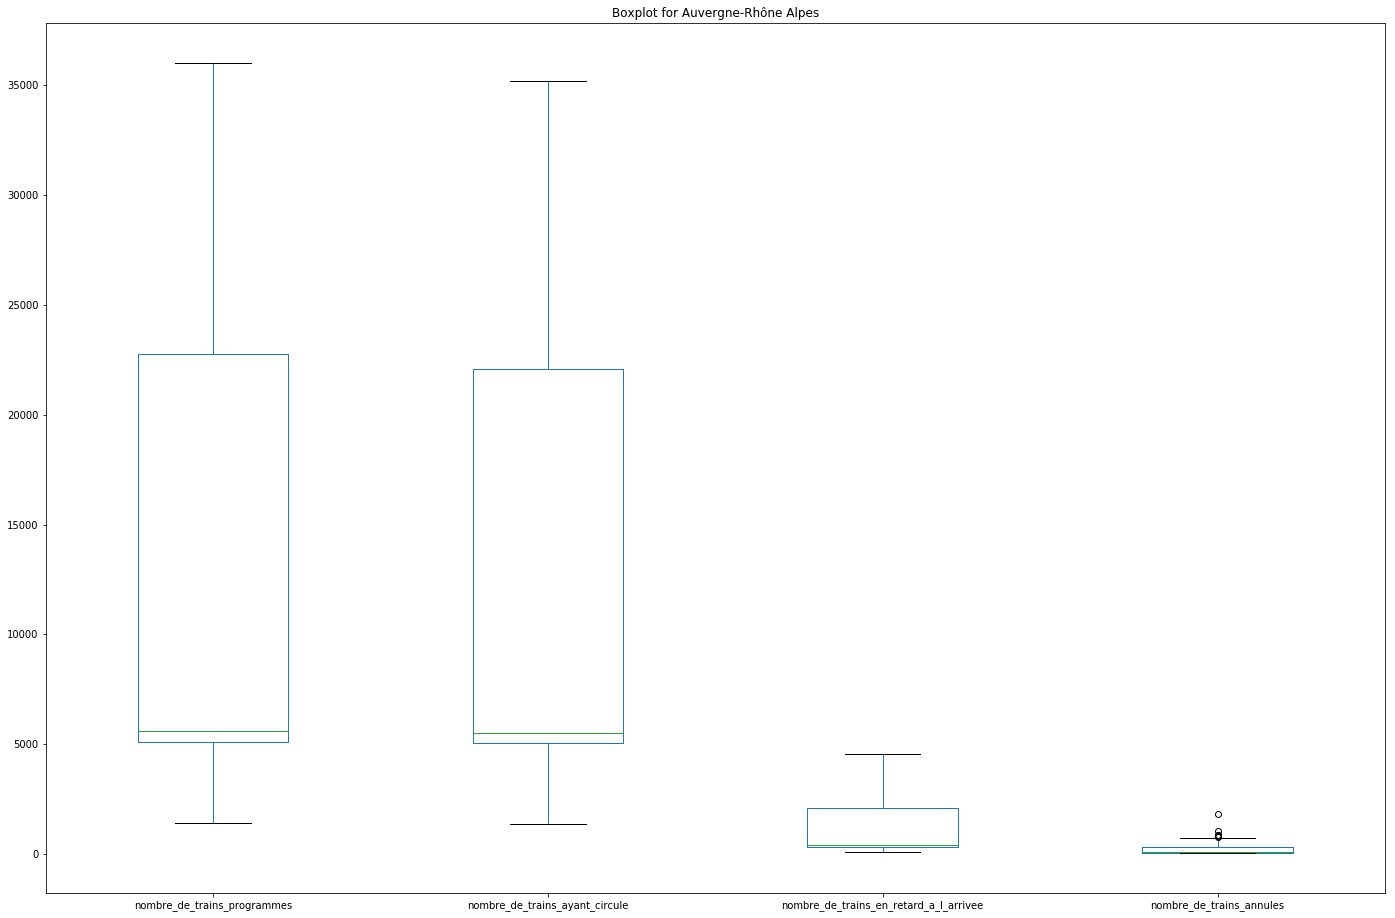

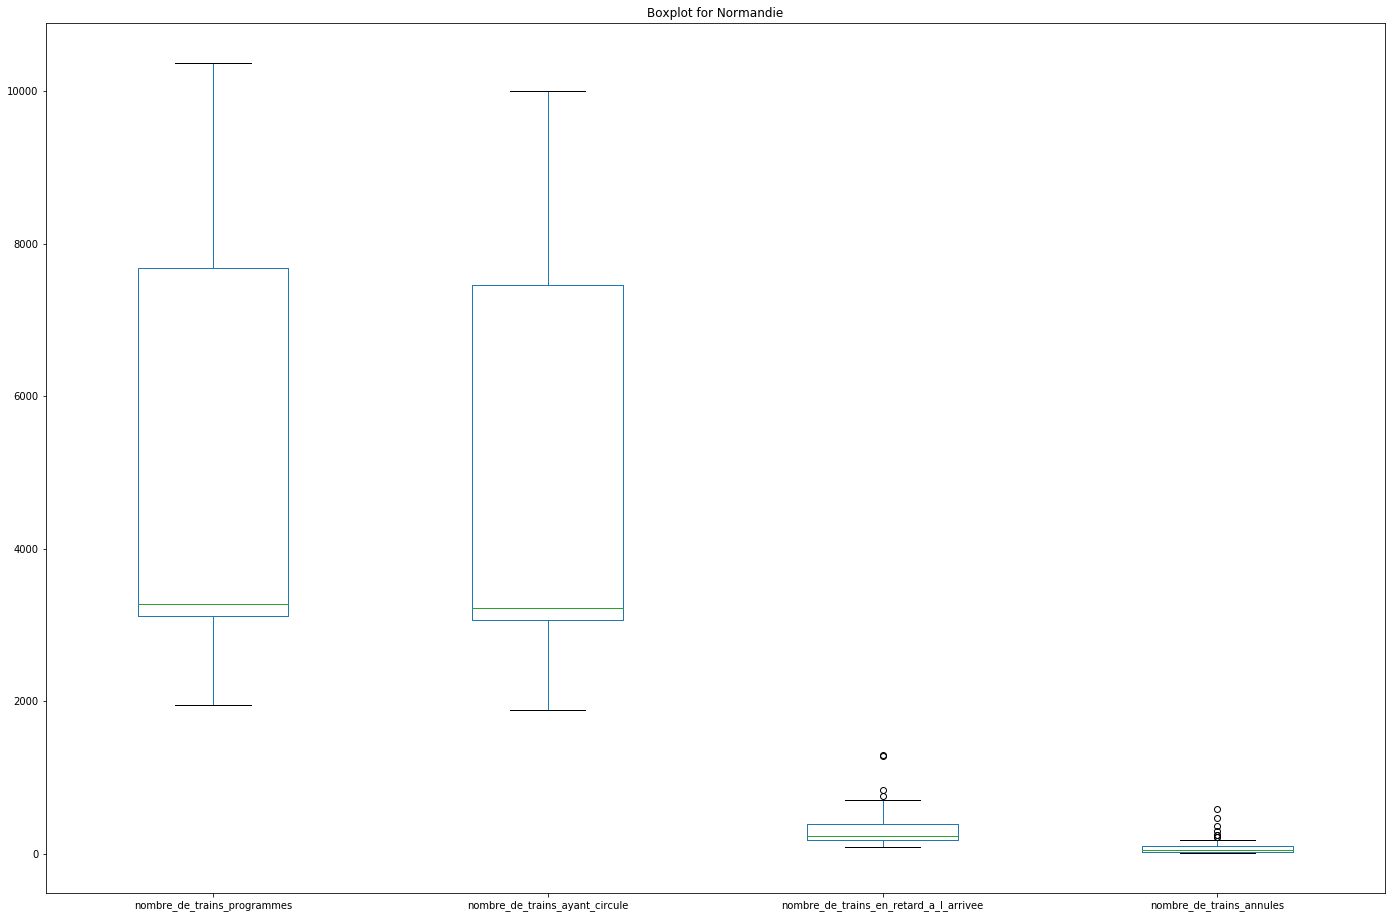

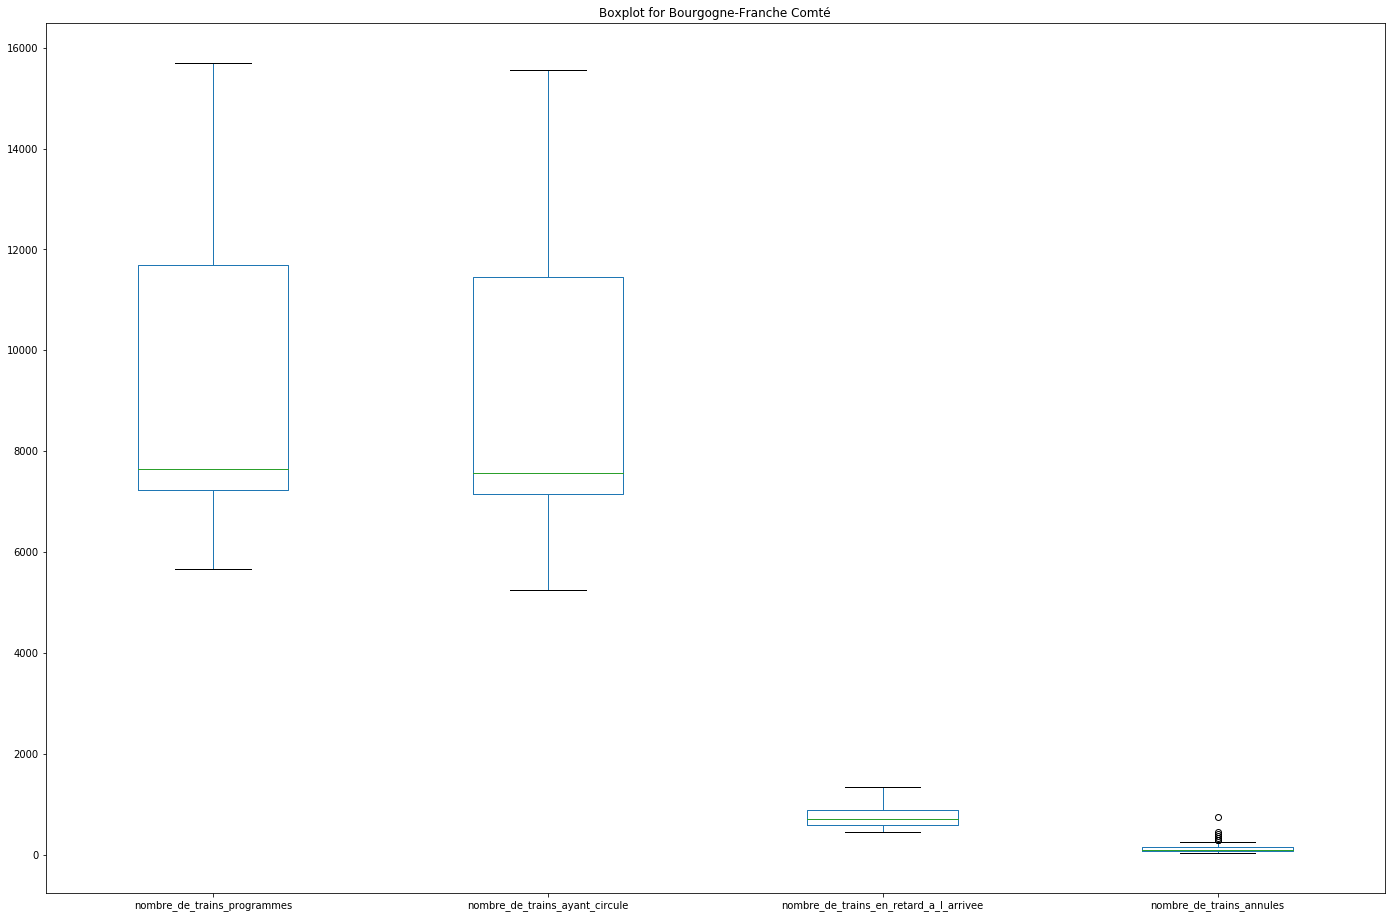

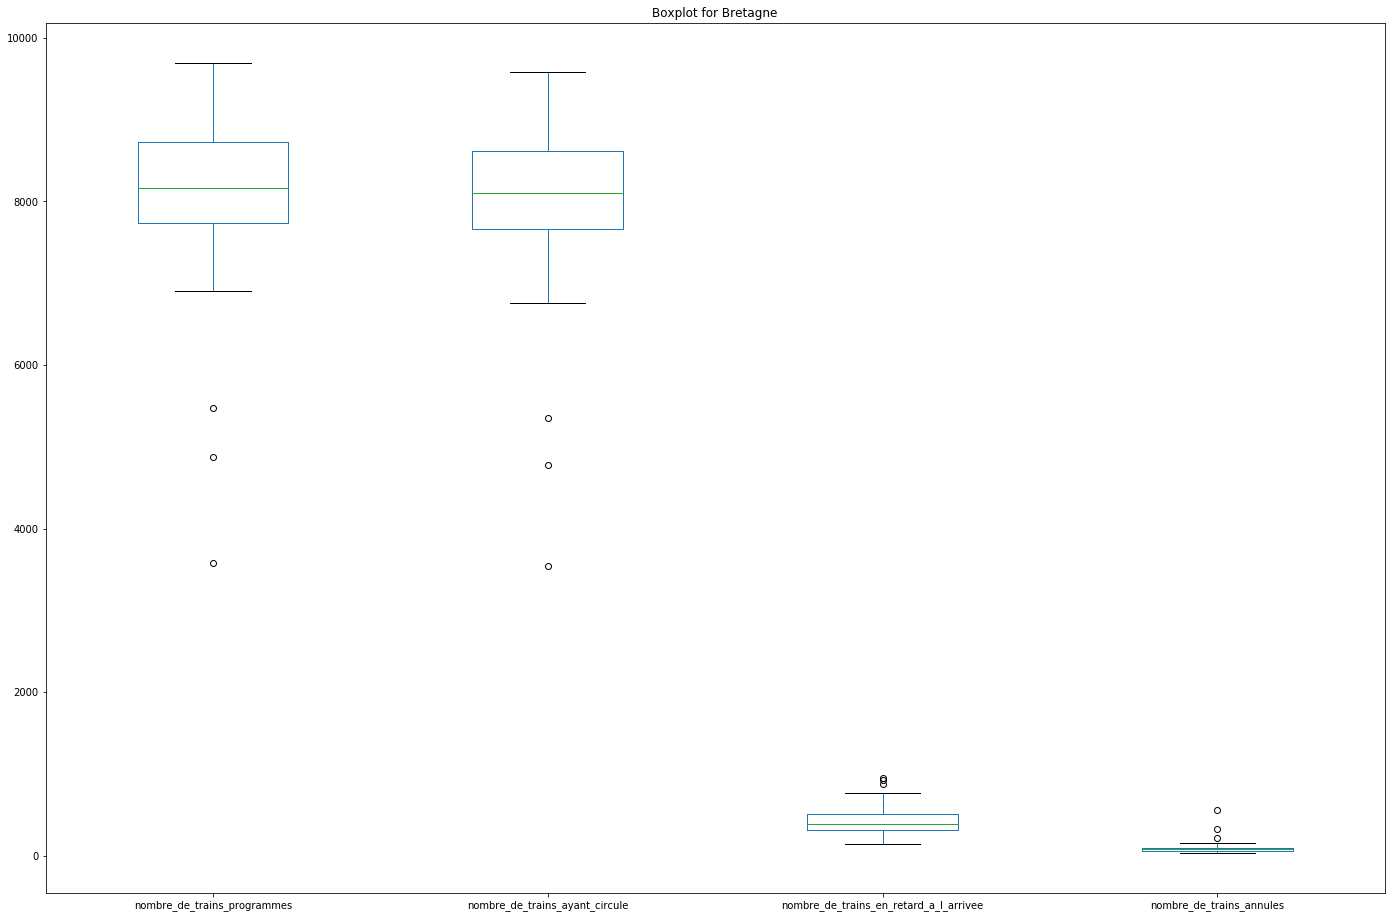

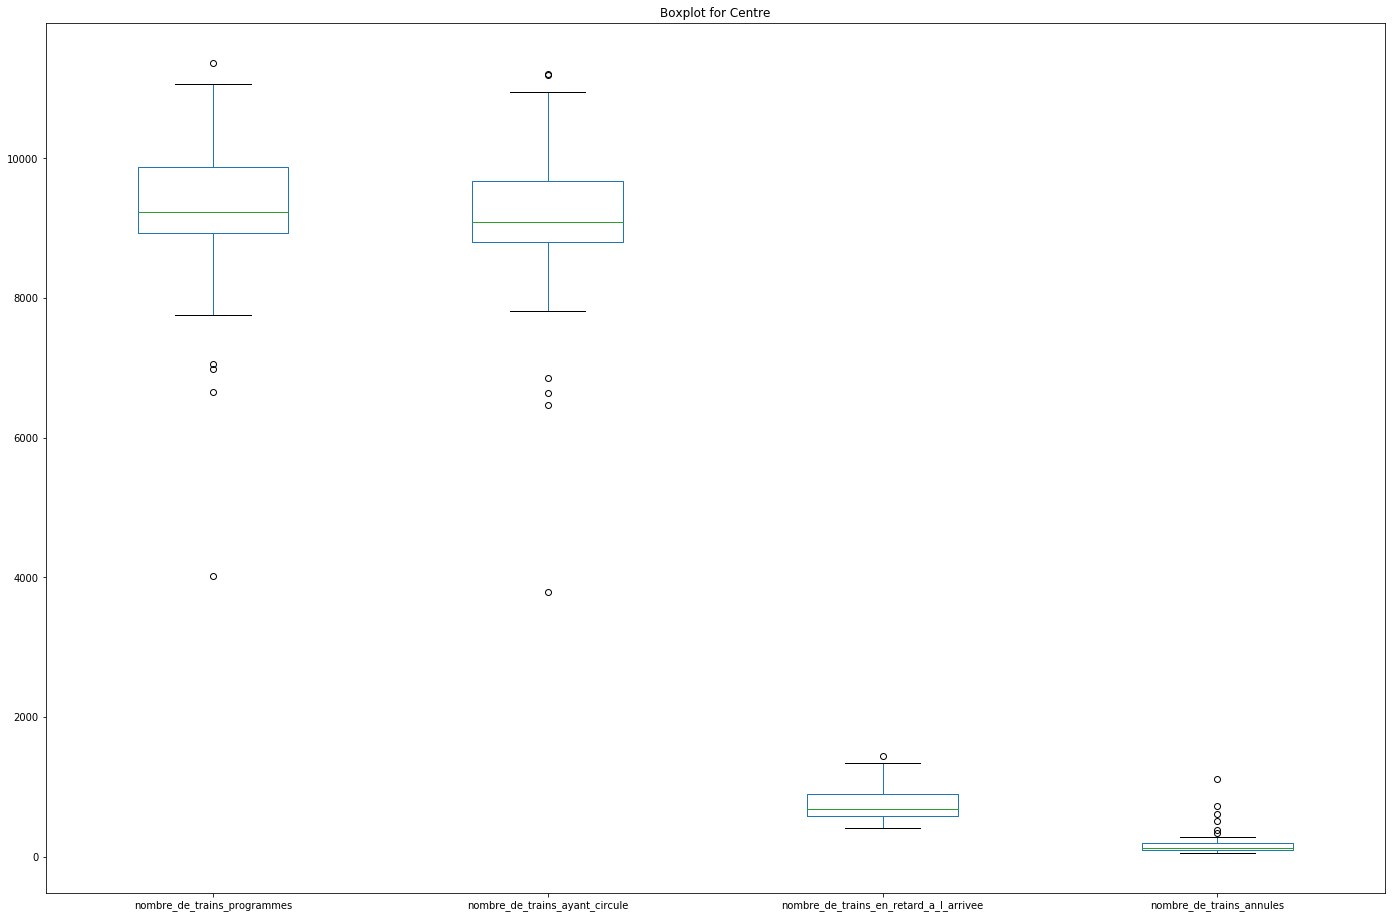

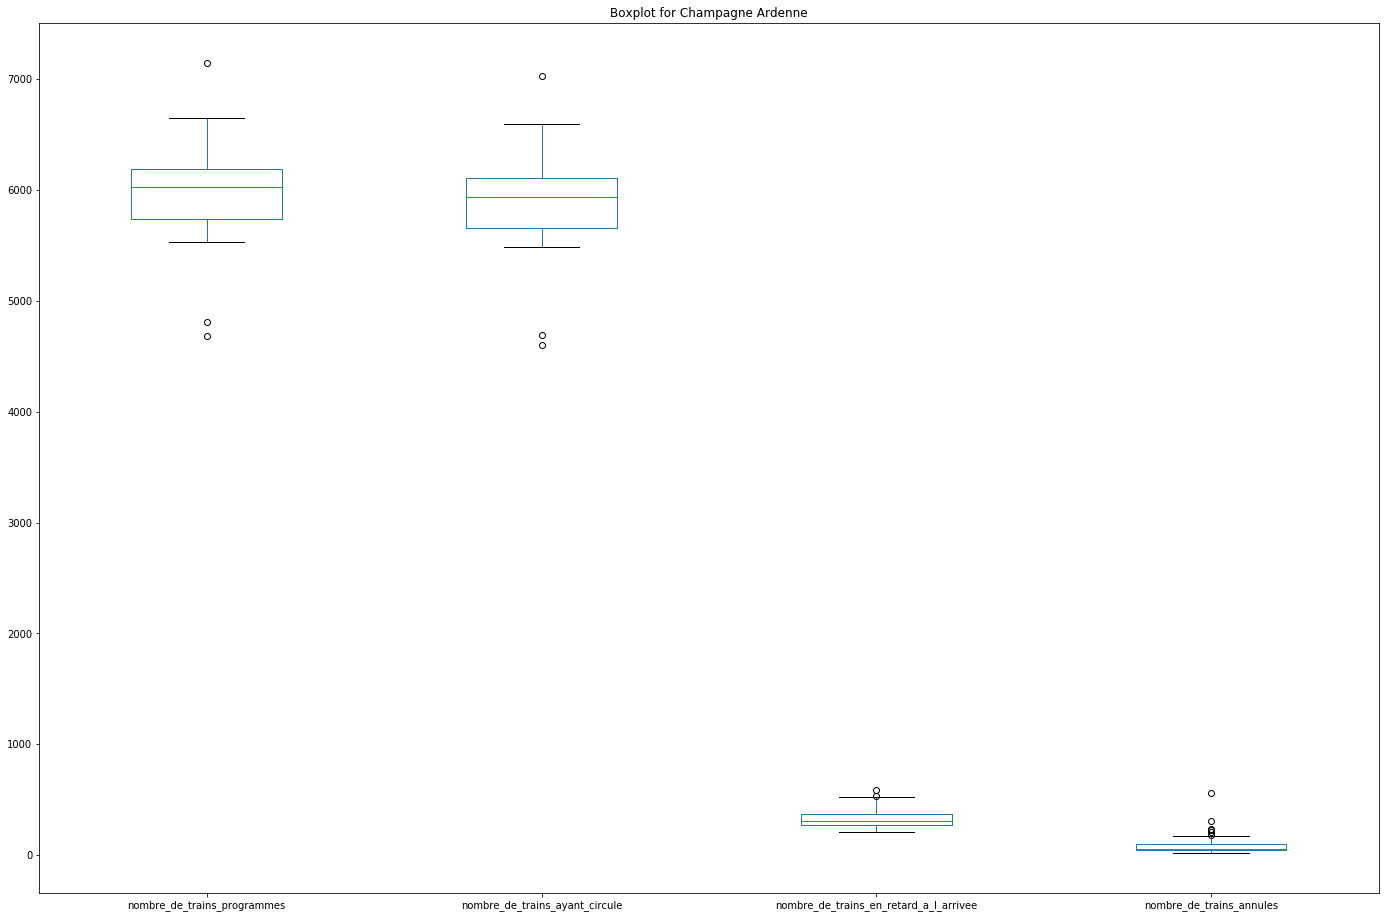

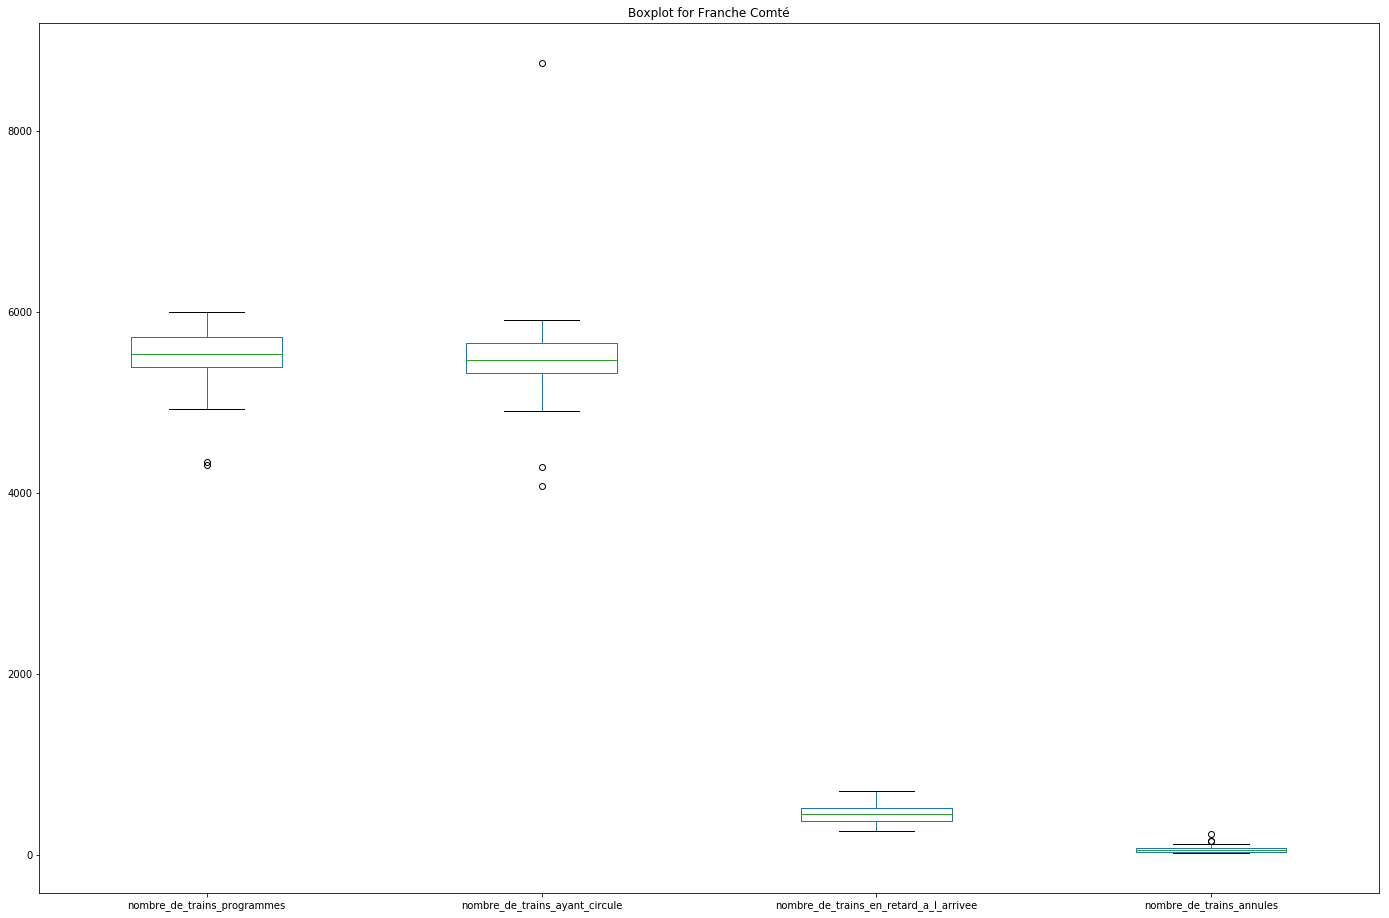

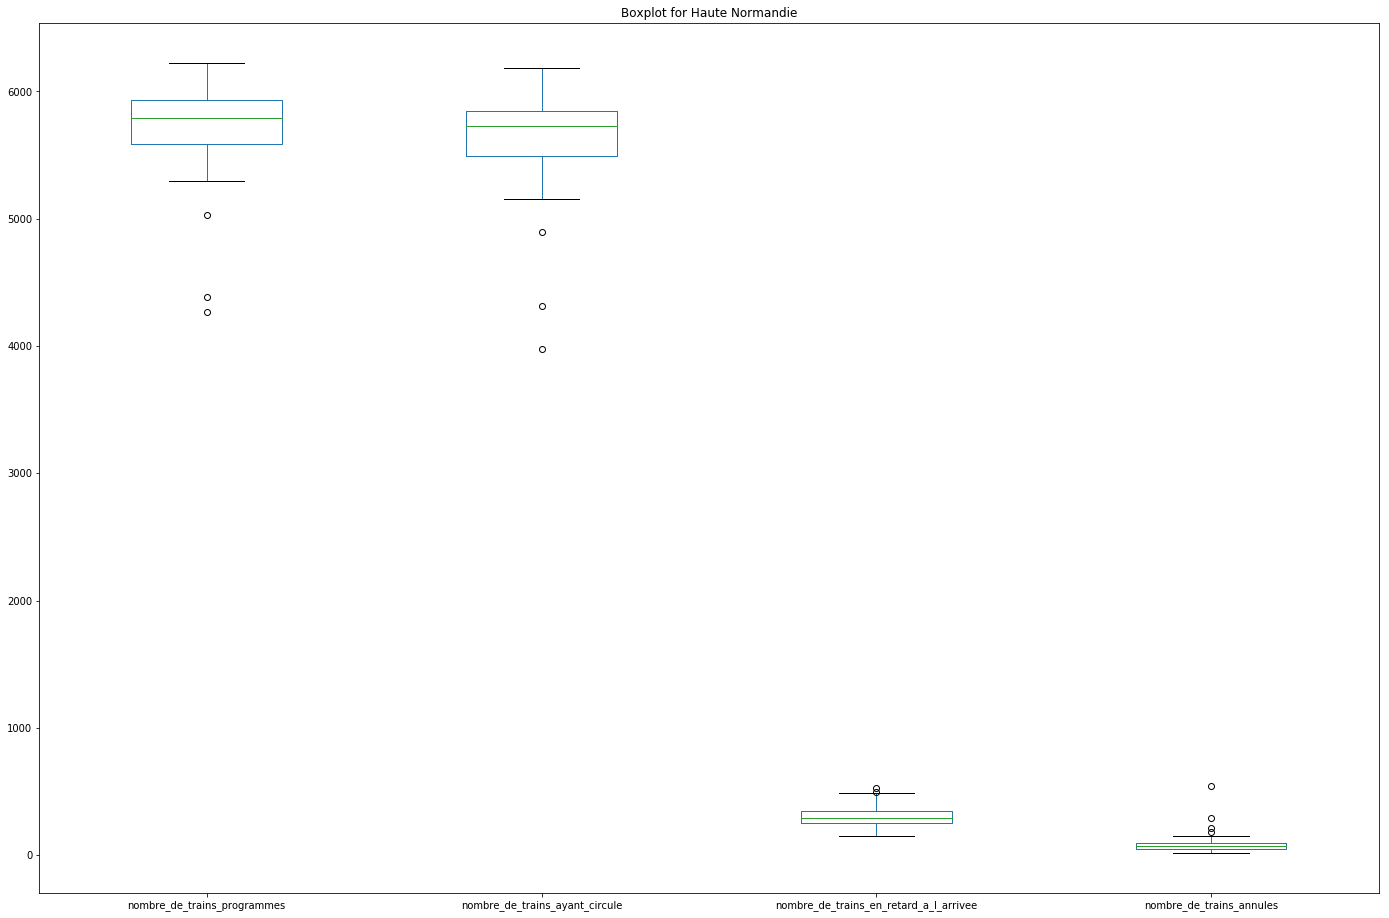

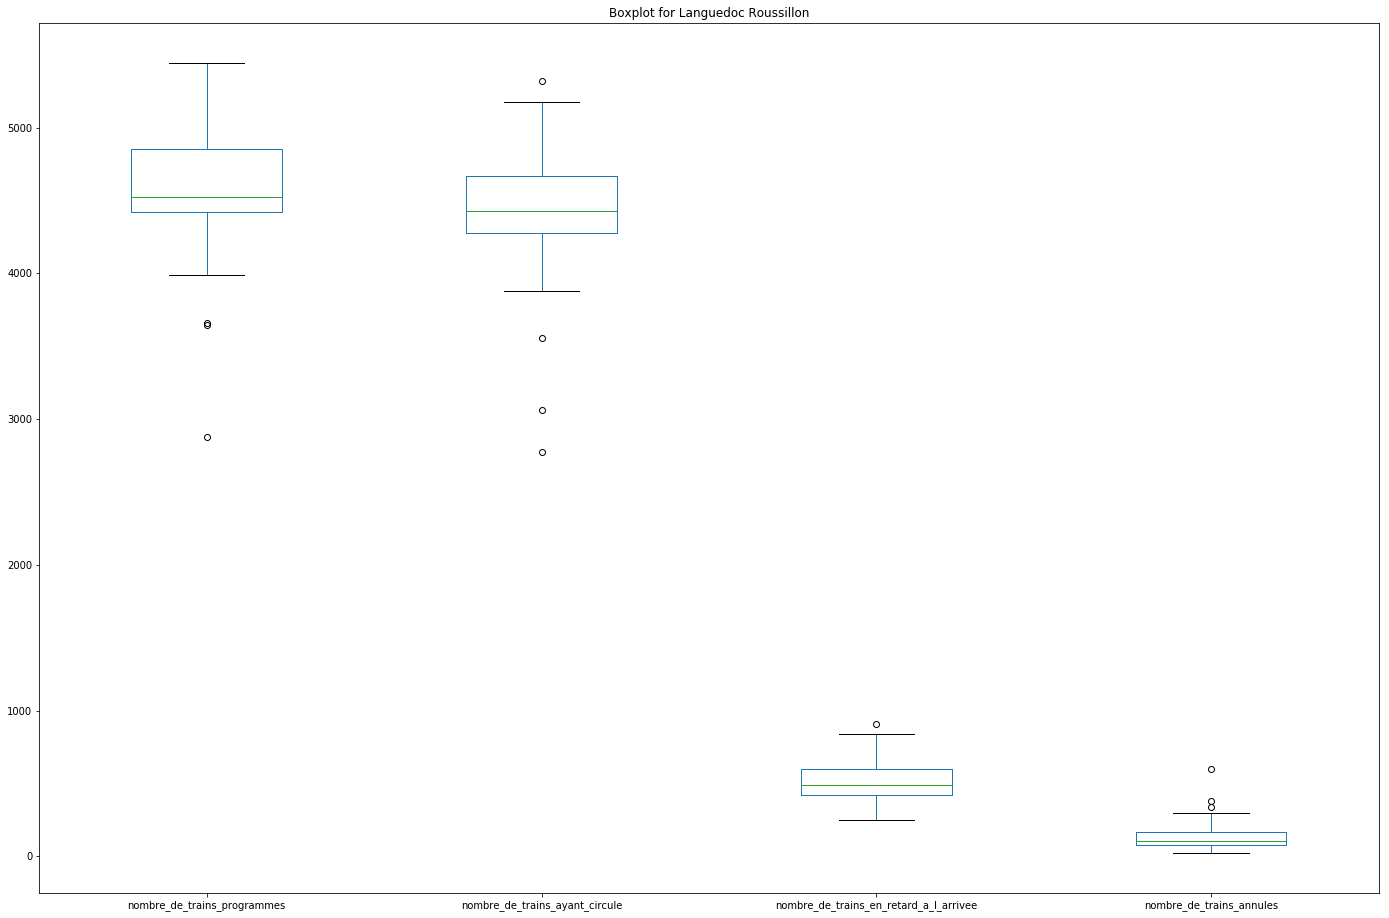

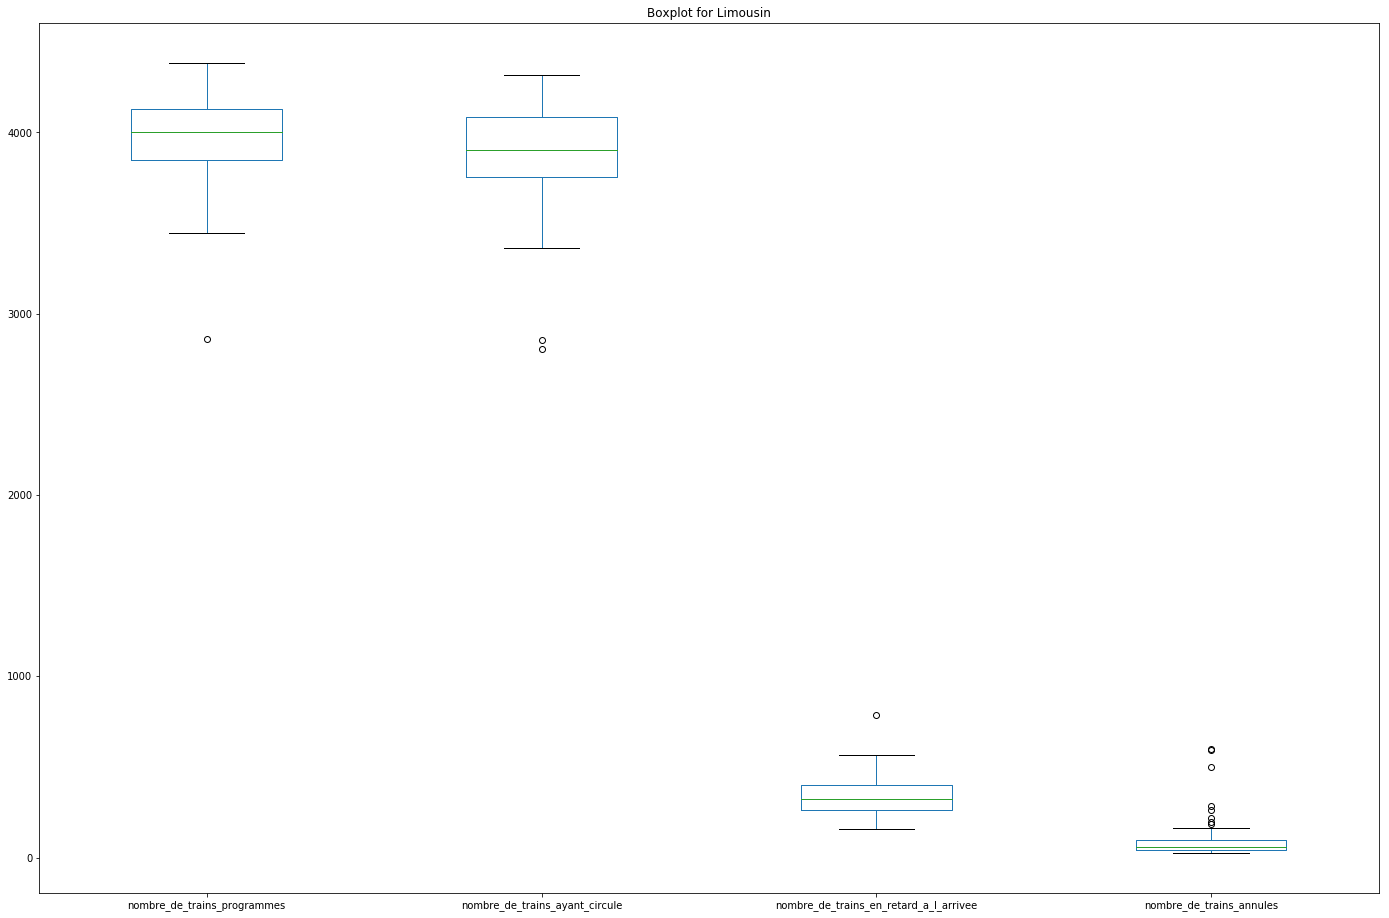

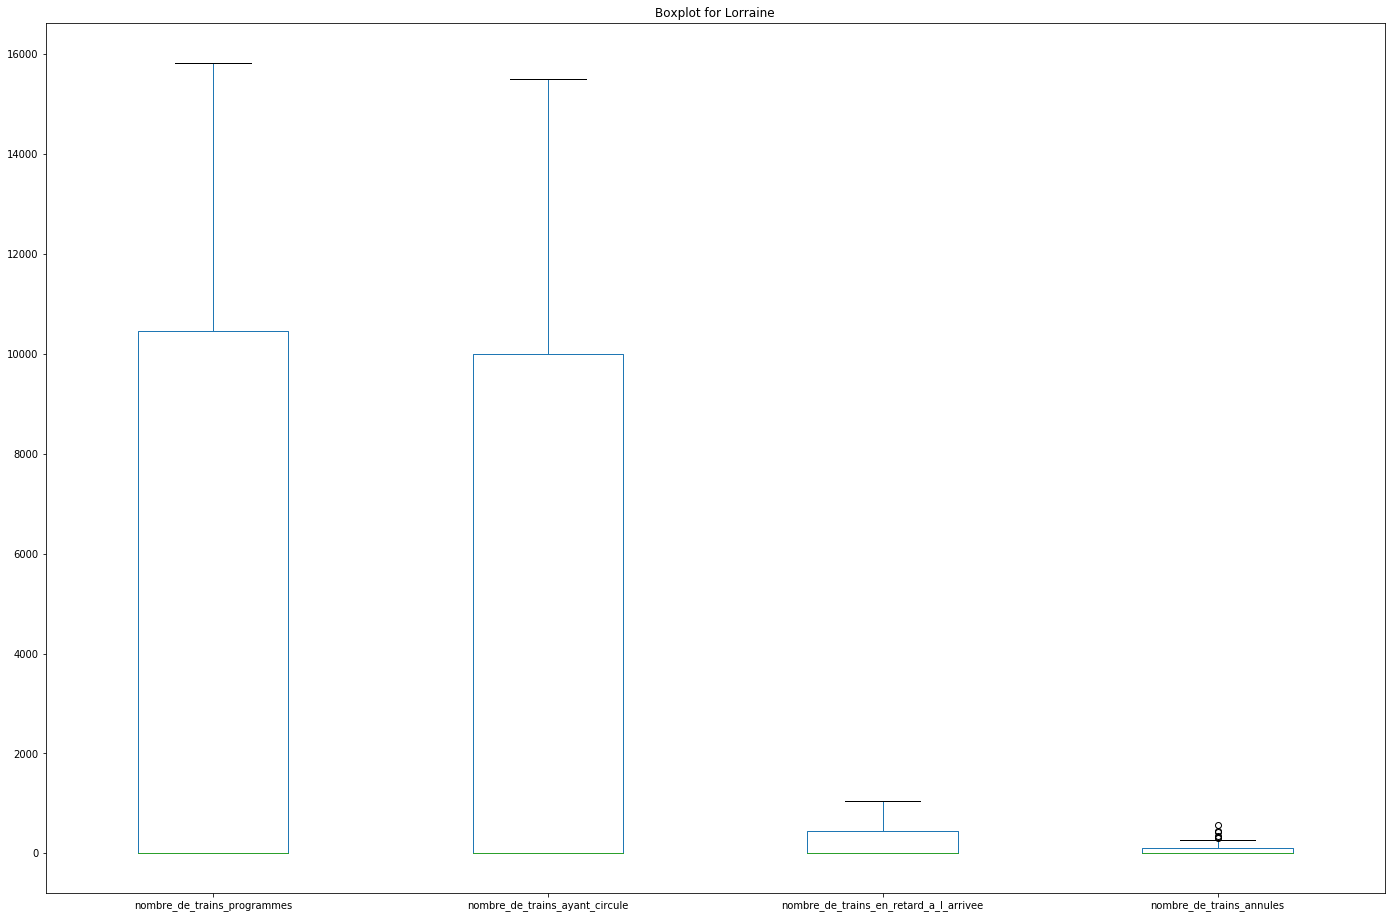

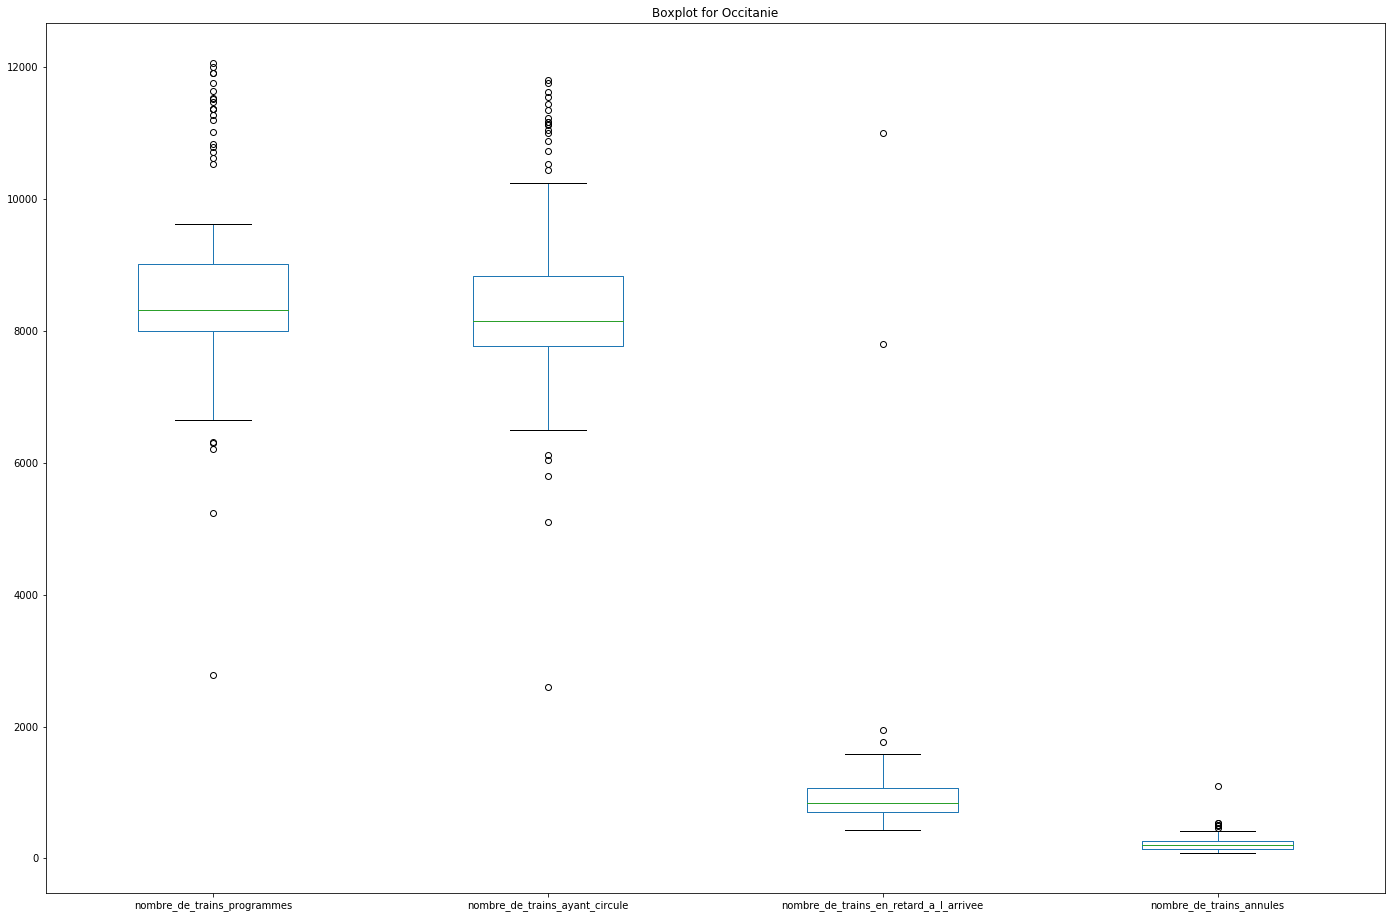

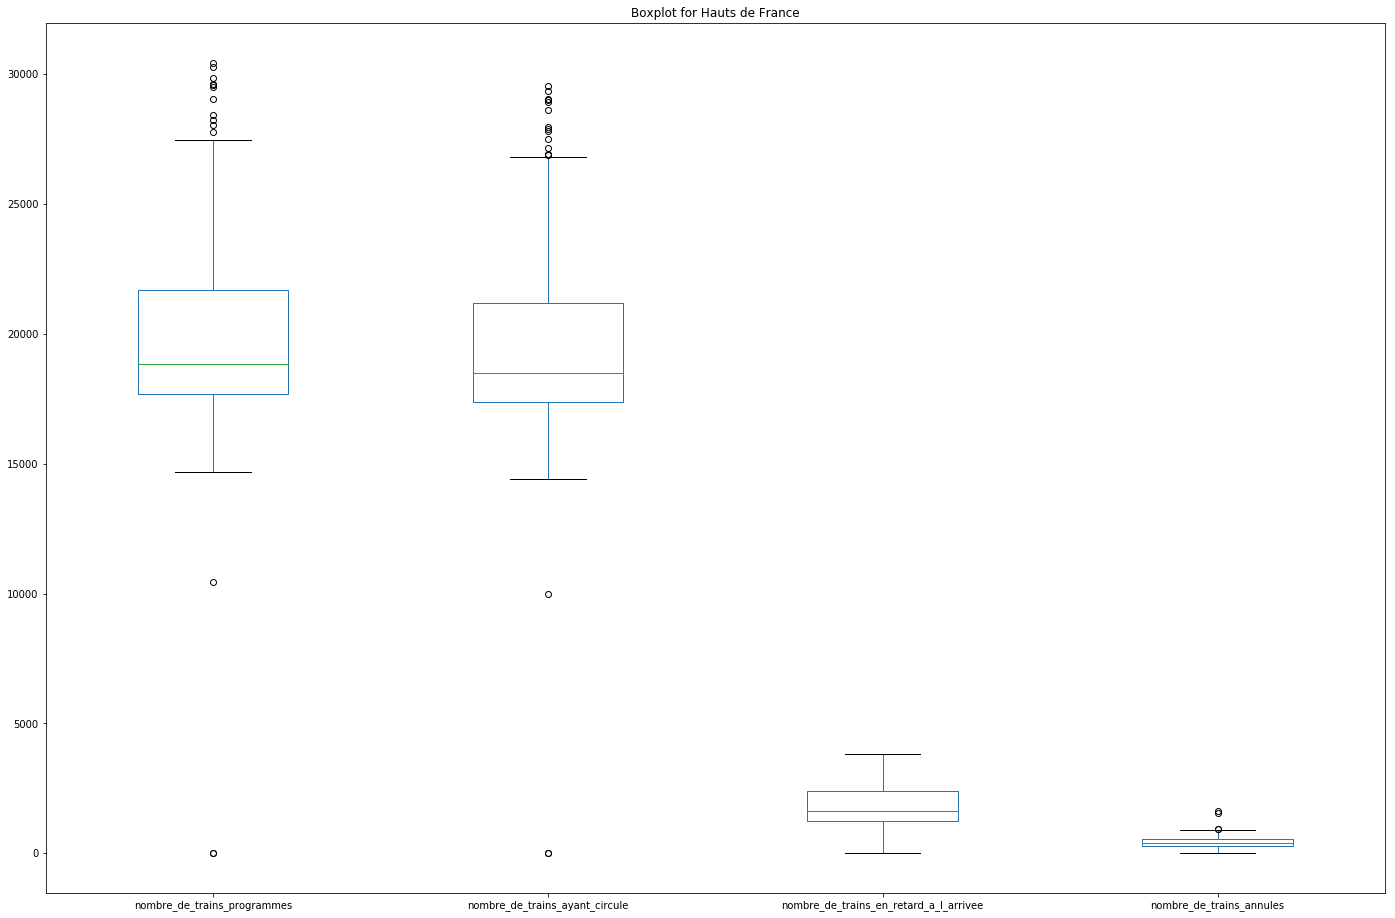

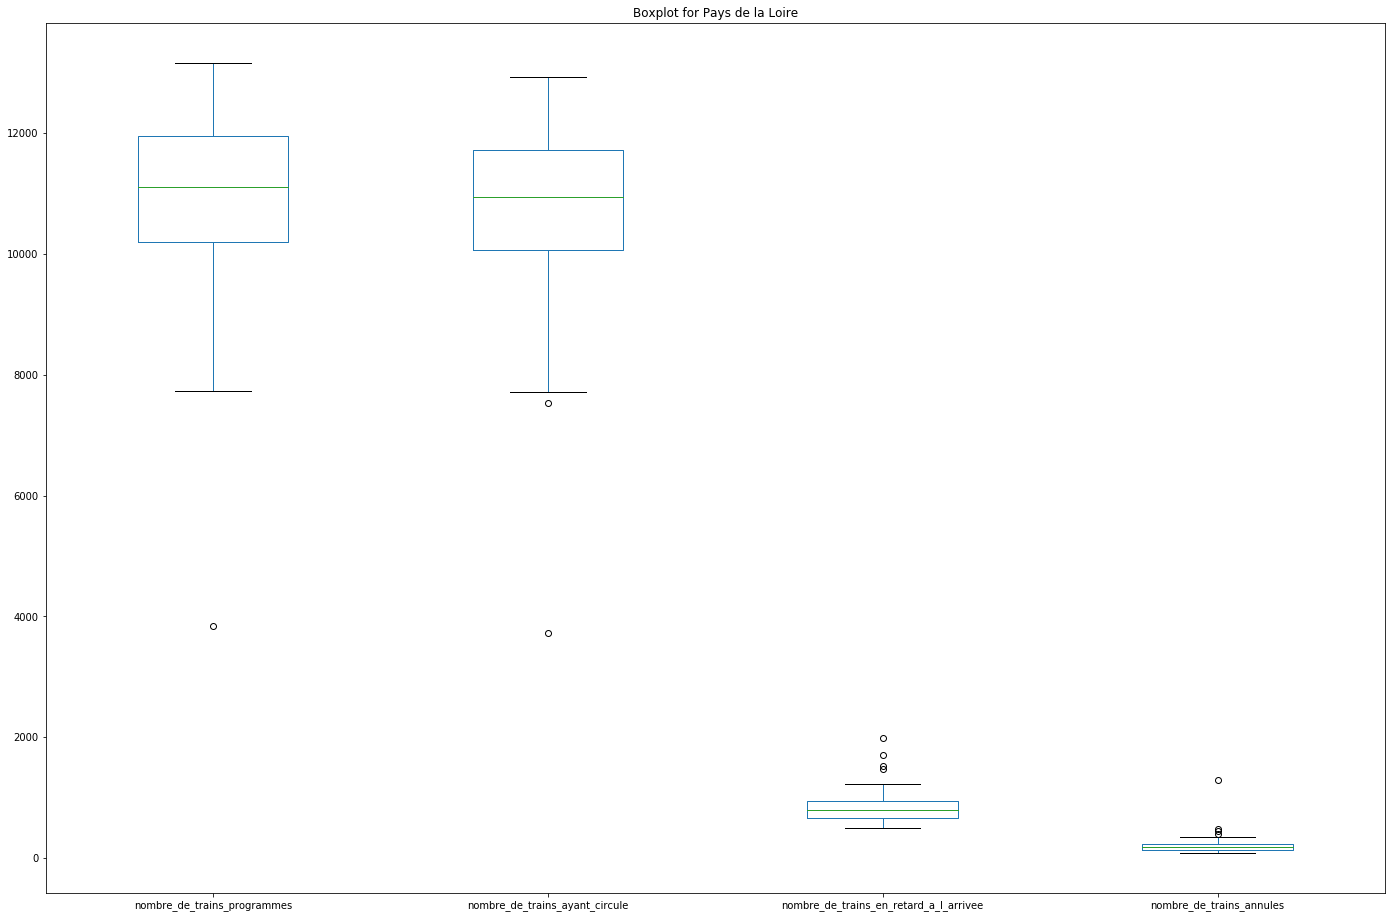

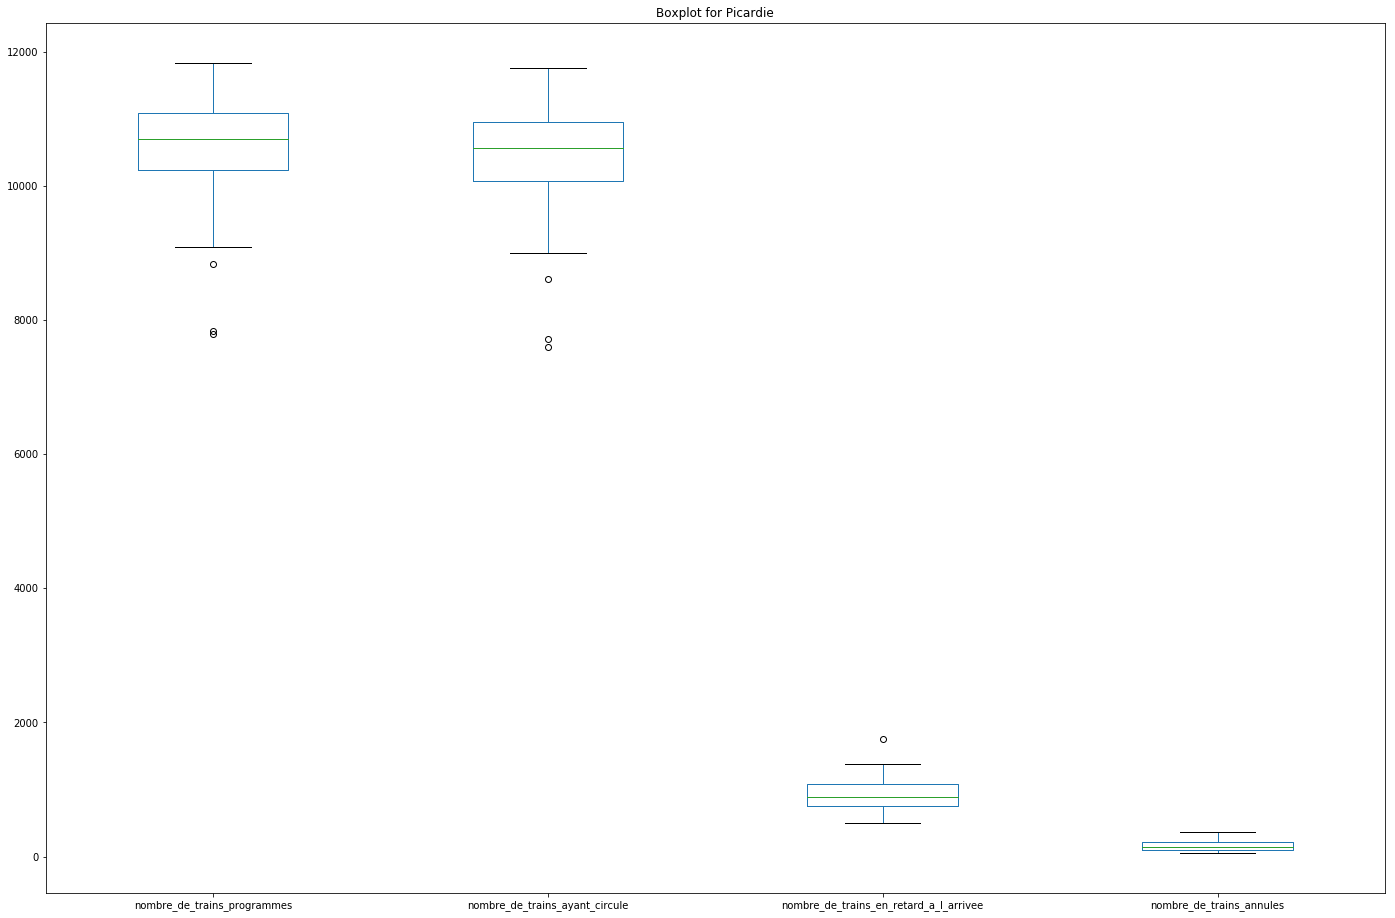

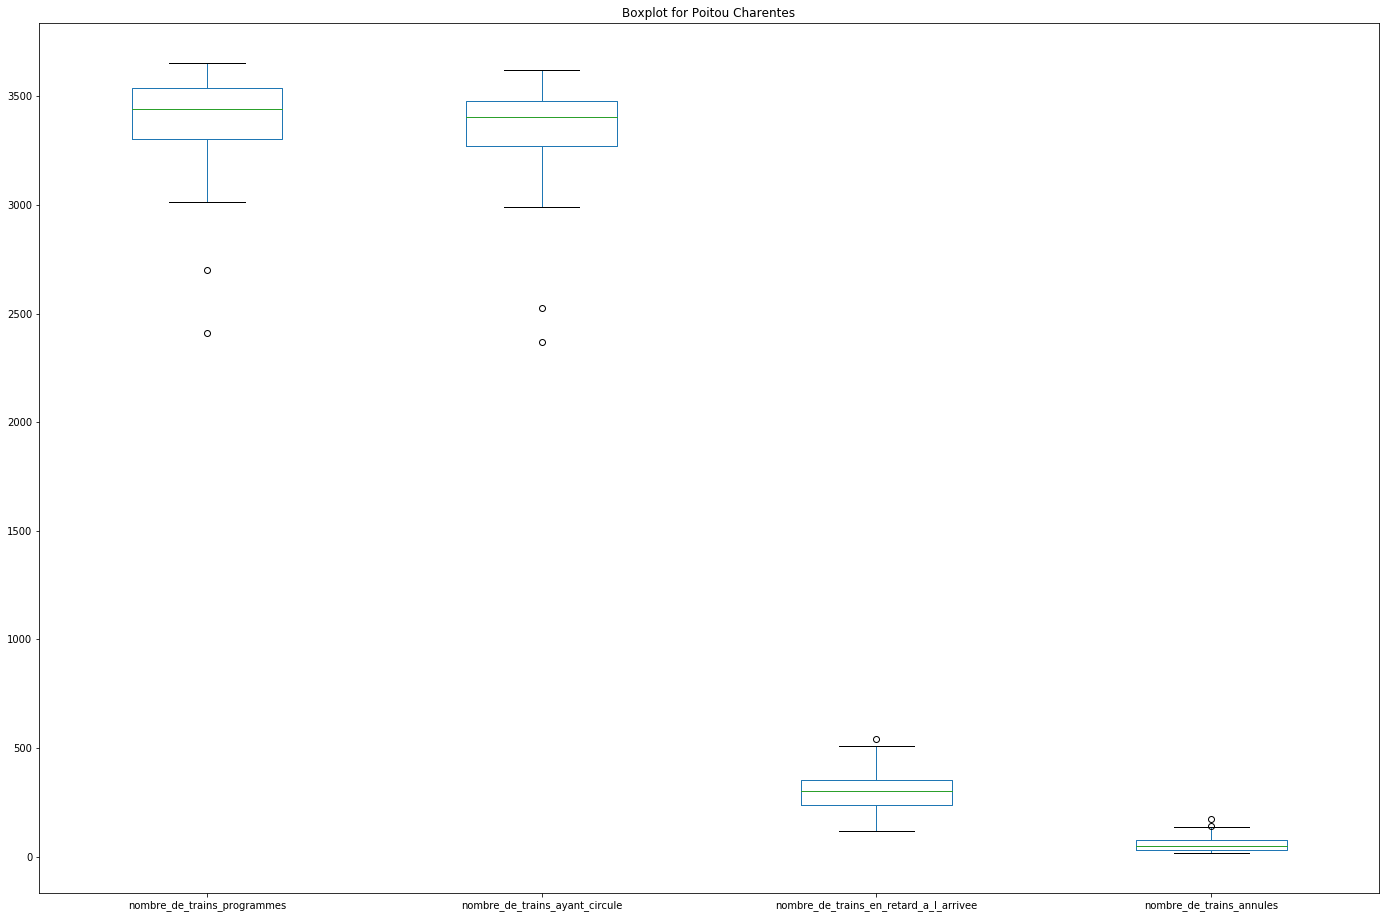

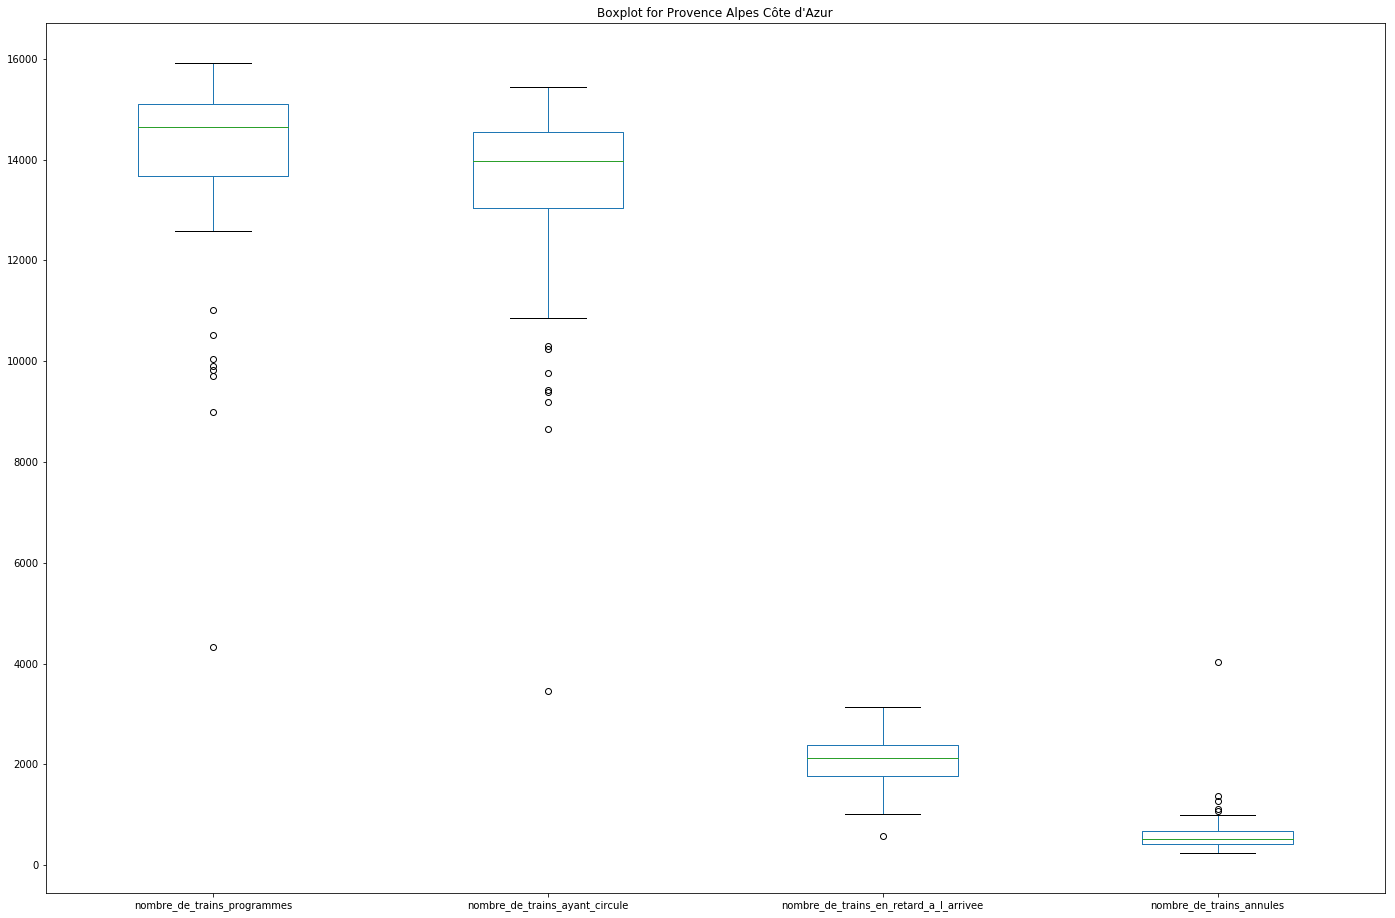

In [14]:
display(Markdown("We then display the Boxplots for each region. They report, for each numerical attribute related to the number of trains (number of trains scheduled, that have circulated, delayed at final stop and cancelled), the quartiles, means, and the upper and lower bounds."))
for i in range(1,20):
    # Create the id to sort and filter the data
    id = "TER_"+str(i)
    
    # Filter to keep only the data for the selected region, sorted by date, and with only the attributes that we want
    m = test.loc[test.id == id, ["date","region","nombre_de_trains_programmes","nombre_de_trains_ayant_circule","nombre_de_trains_en_retard_a_l_arrivee","nombre_de_trains_annules"]].sort_values(by='date')
    
    matplotlib.pyplot.rcParams["figure.figsize"] = [24.0, 16.0]
    m.plot.box()
    matplotlib.pyplot.title('Boxplot for '+m.region.all())
    
    matplotlib.pyplot.show()

We do the same for the punctuality rates and the number of trains on time for one delayed train, since their values are much smaller (generally between 0 and 100, with some exceptions).

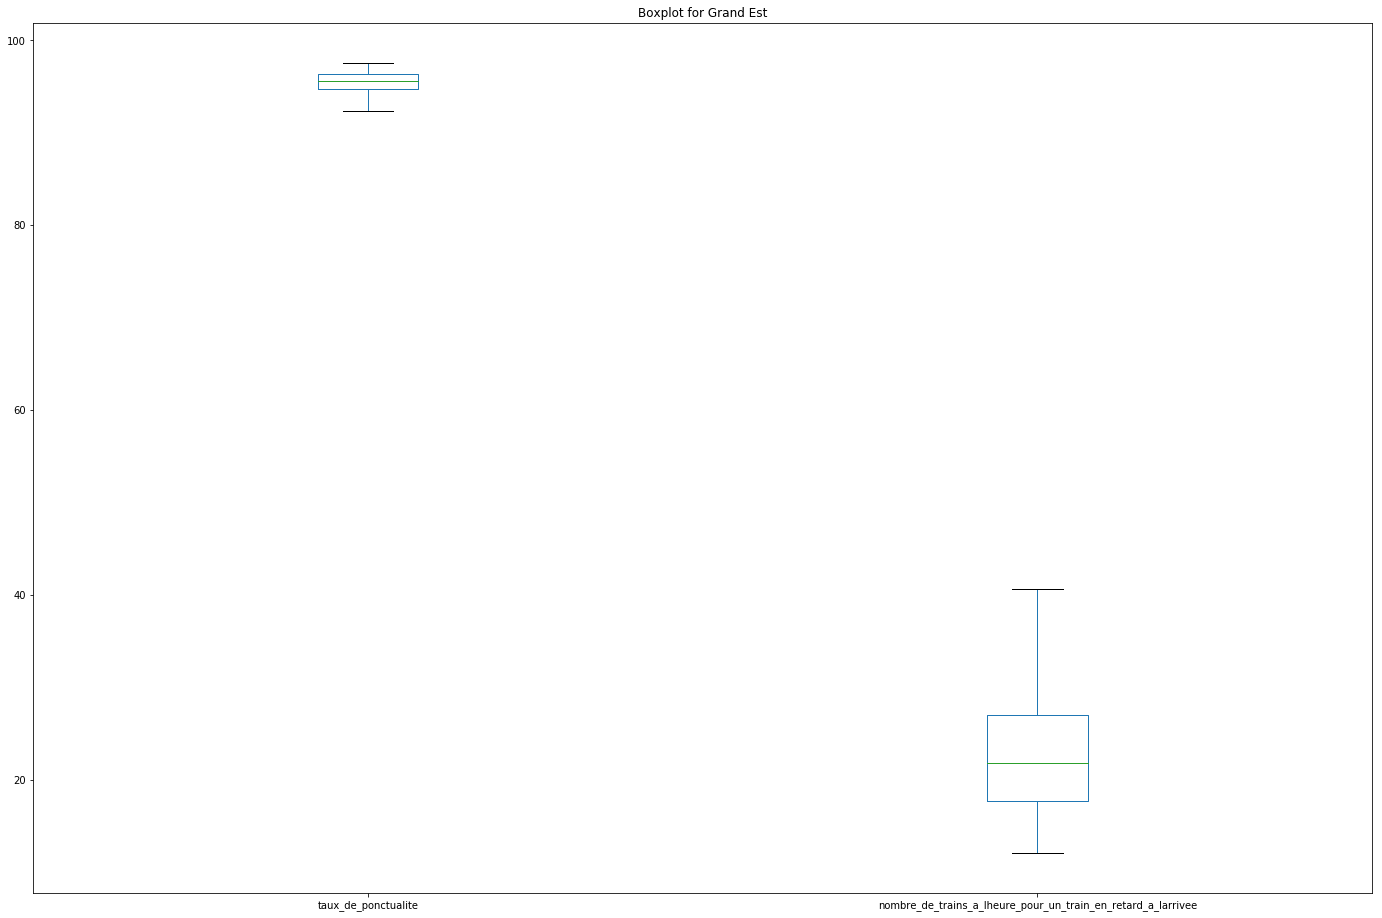

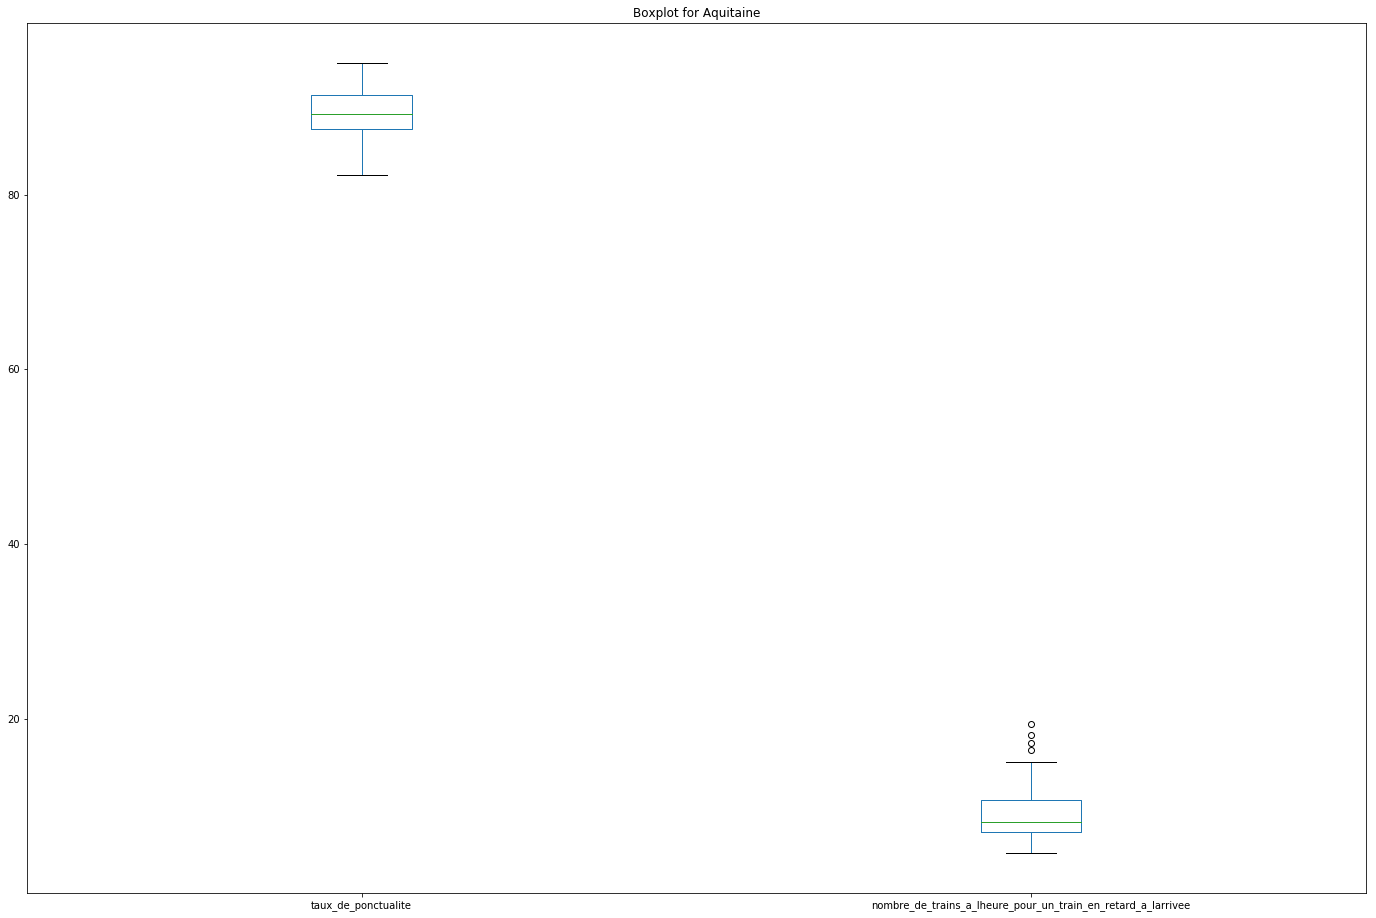

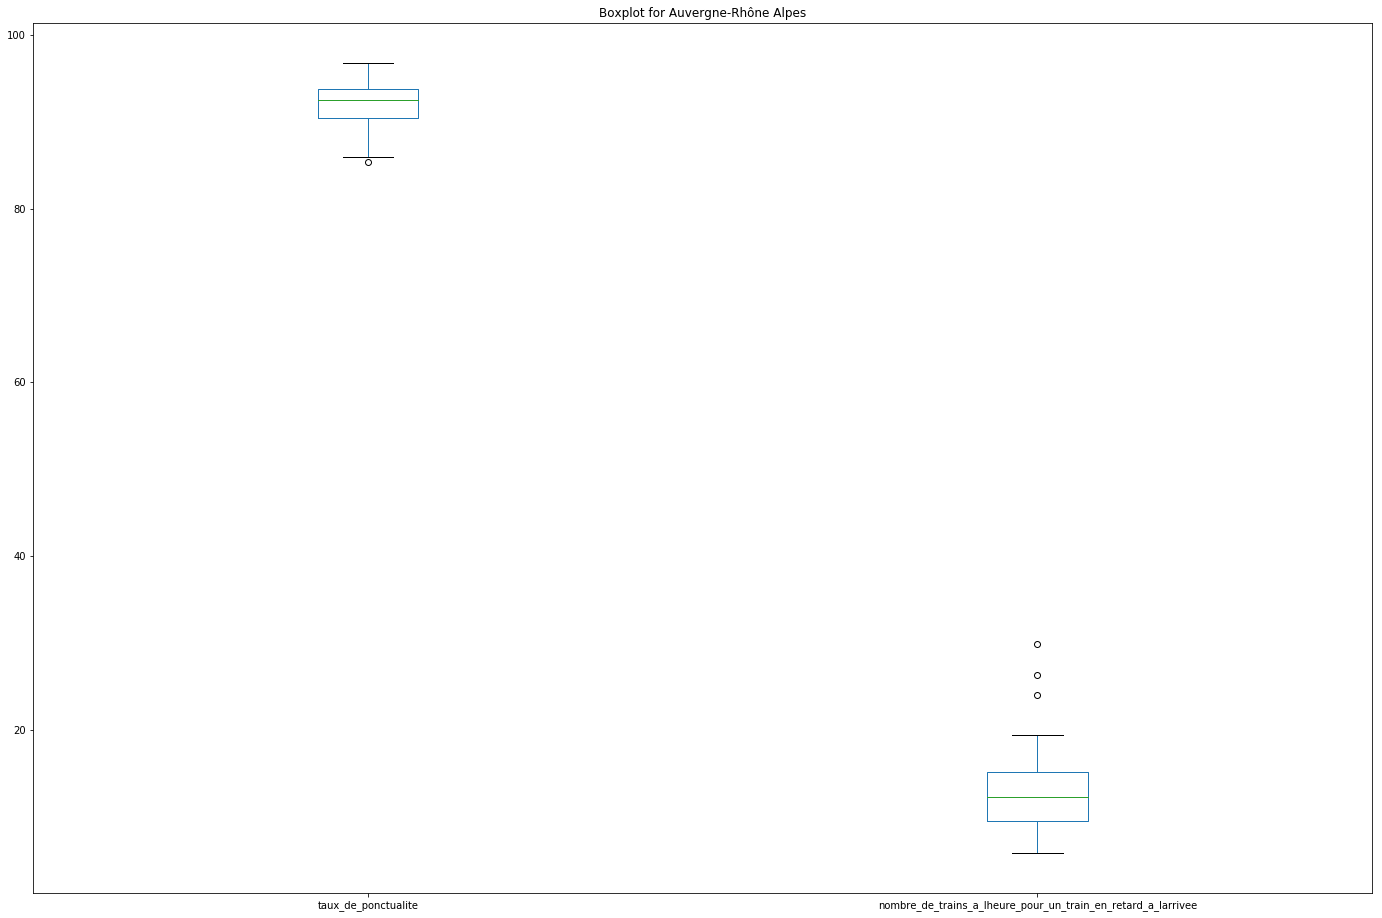

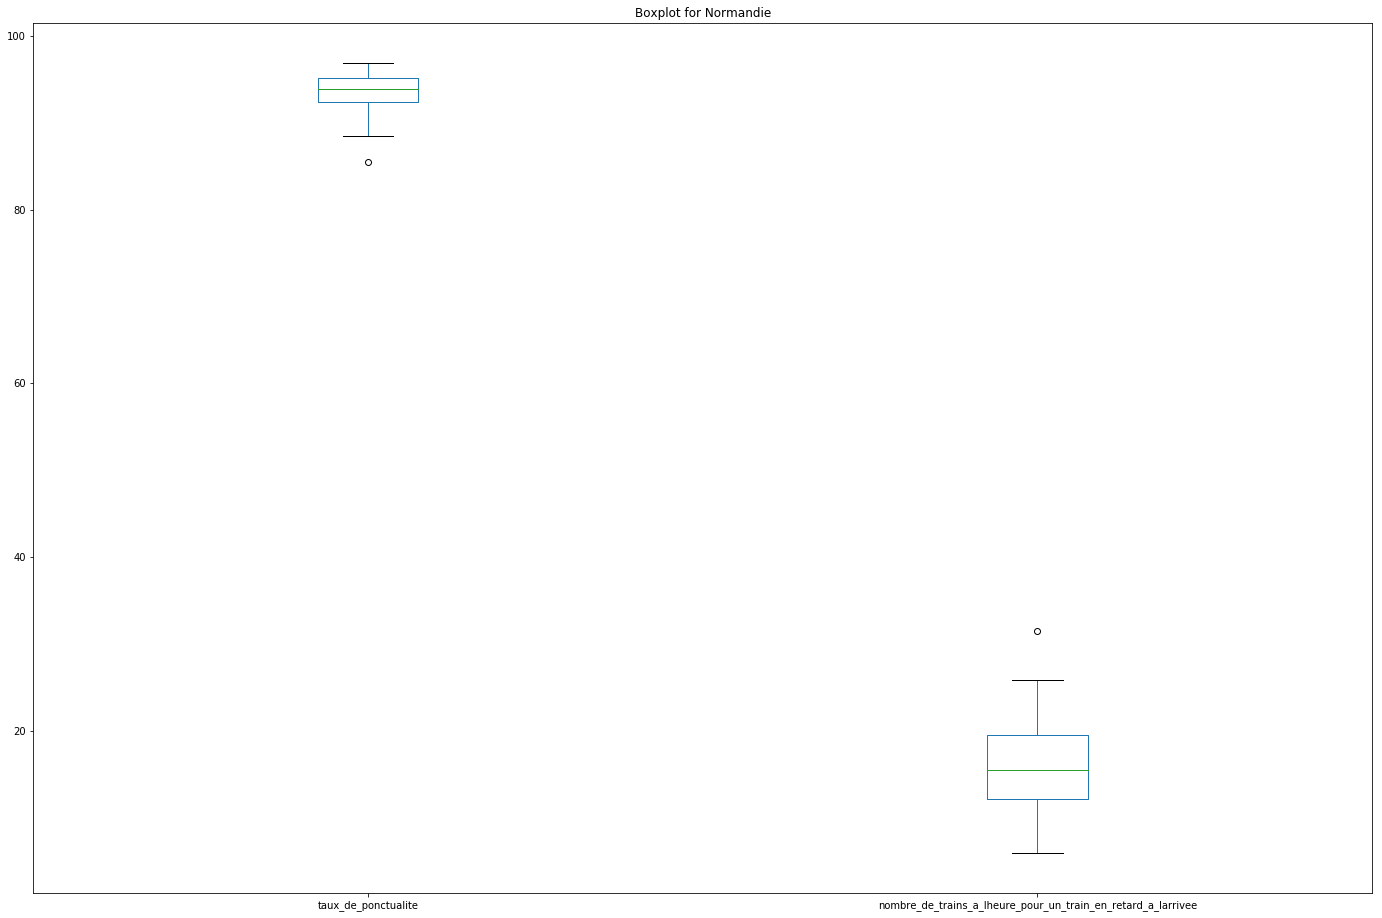

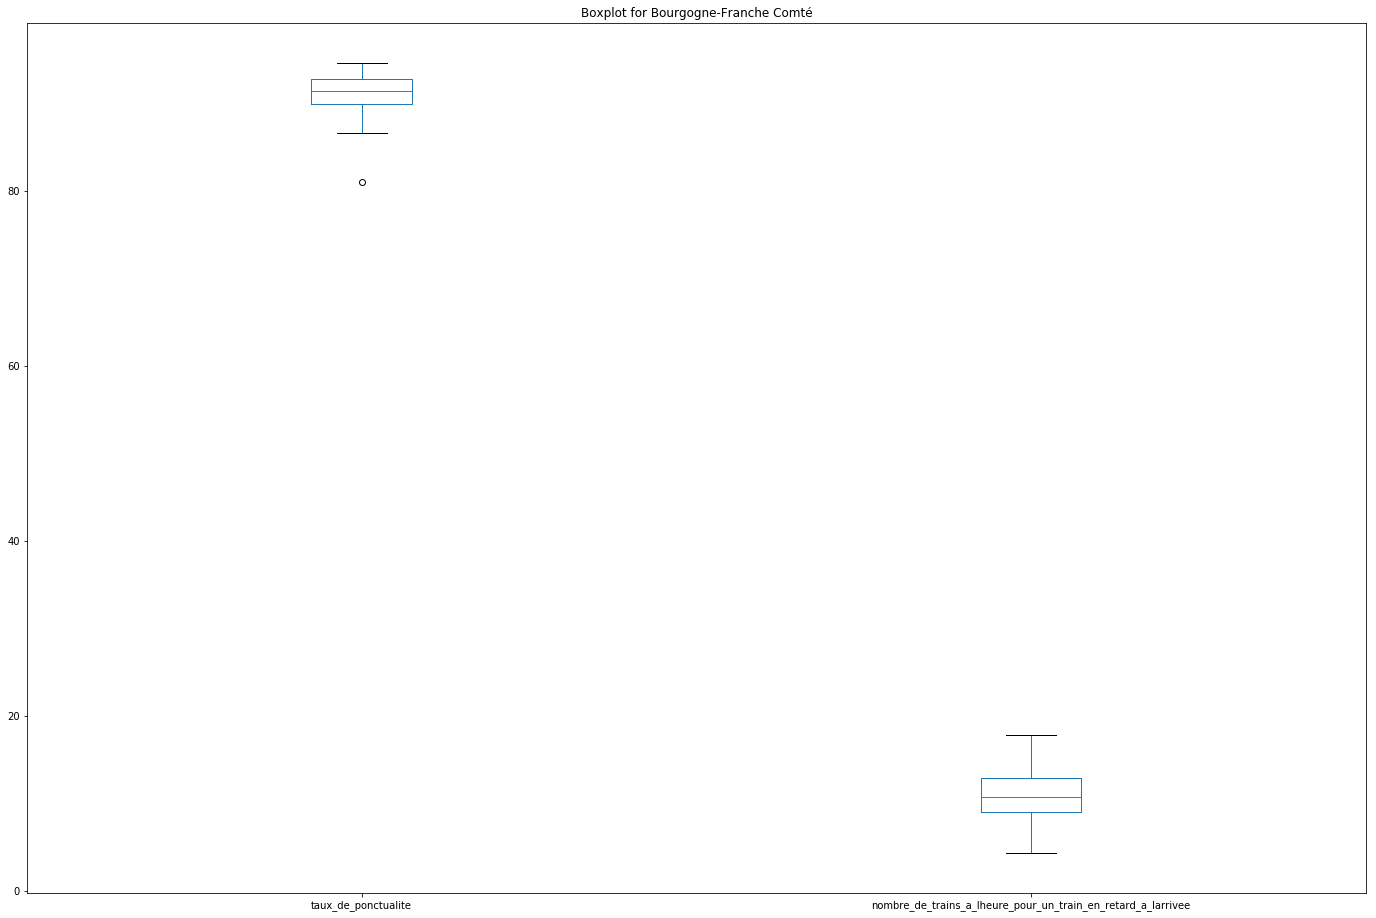

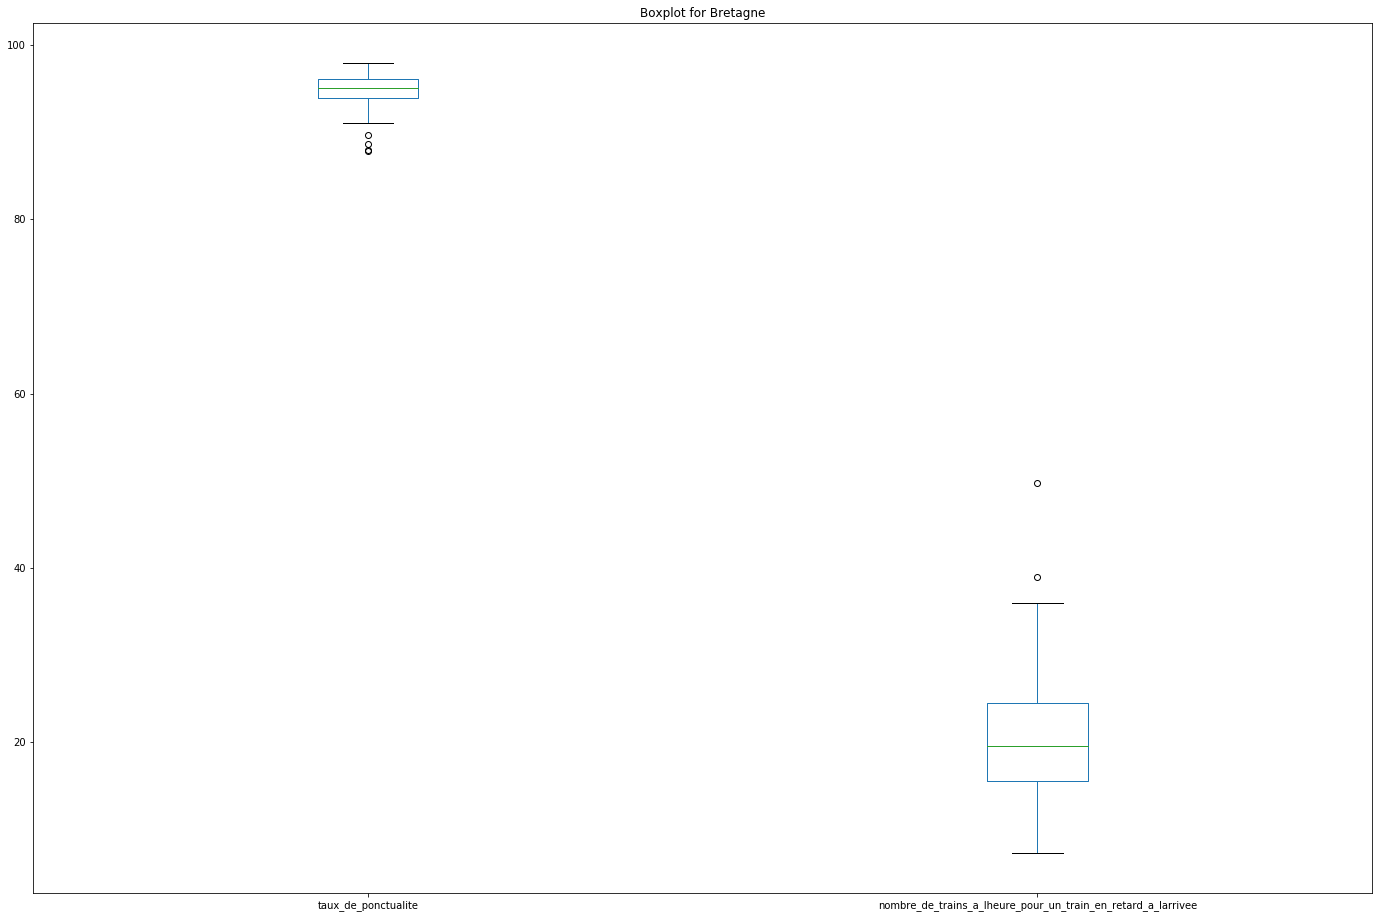

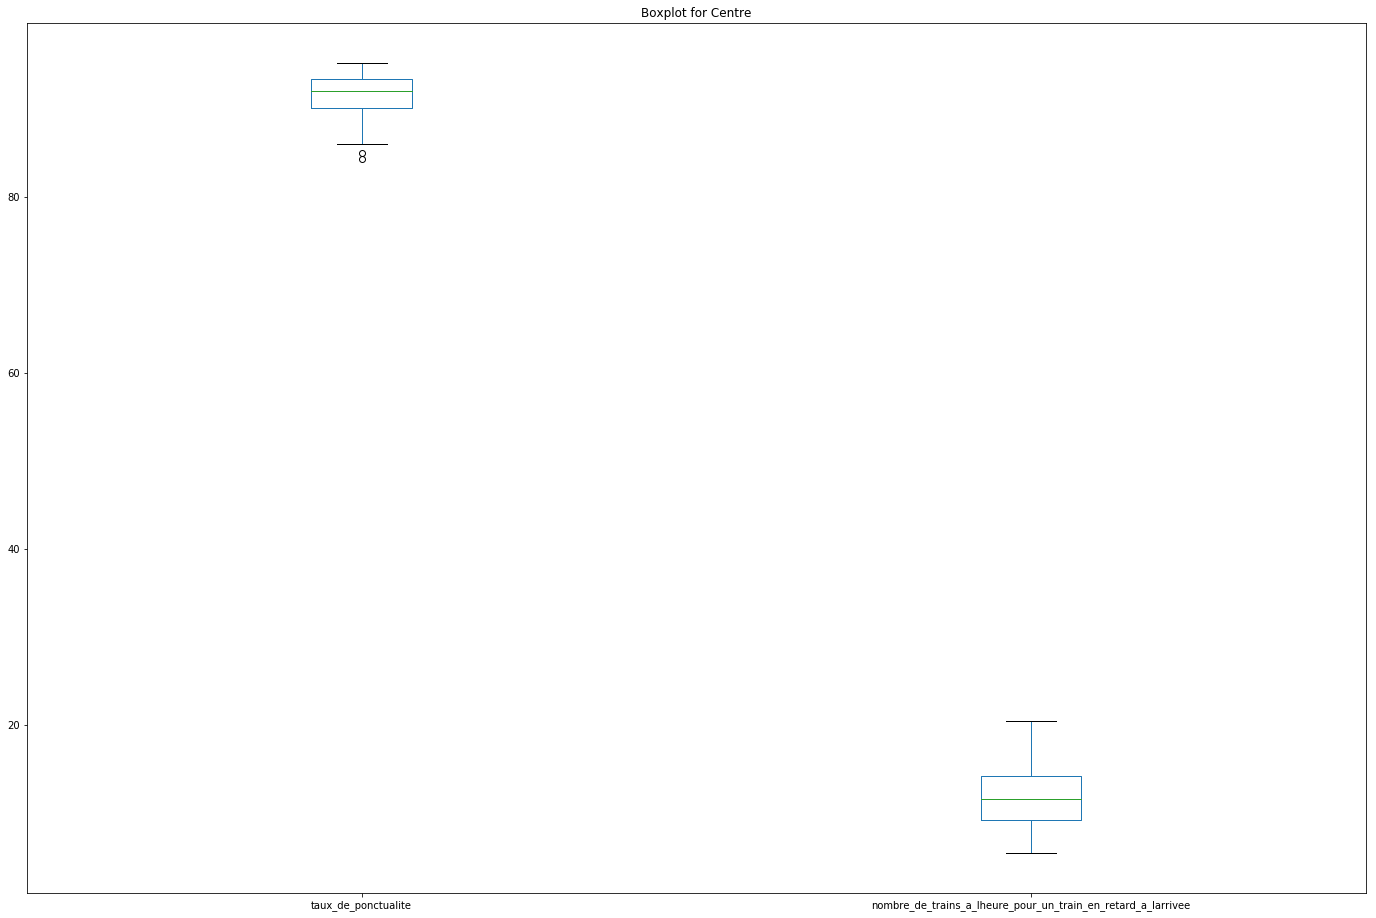

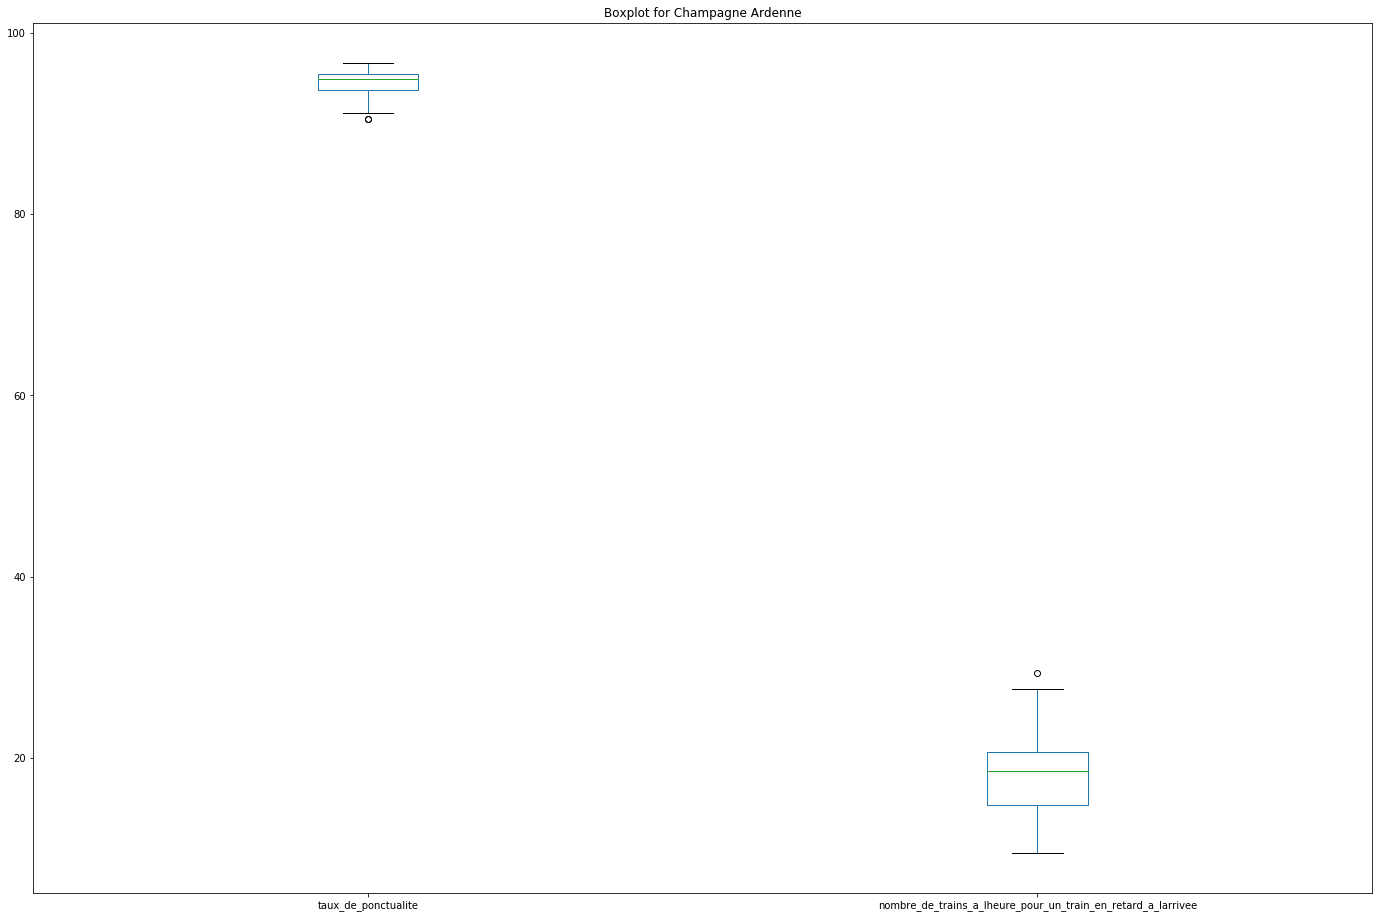

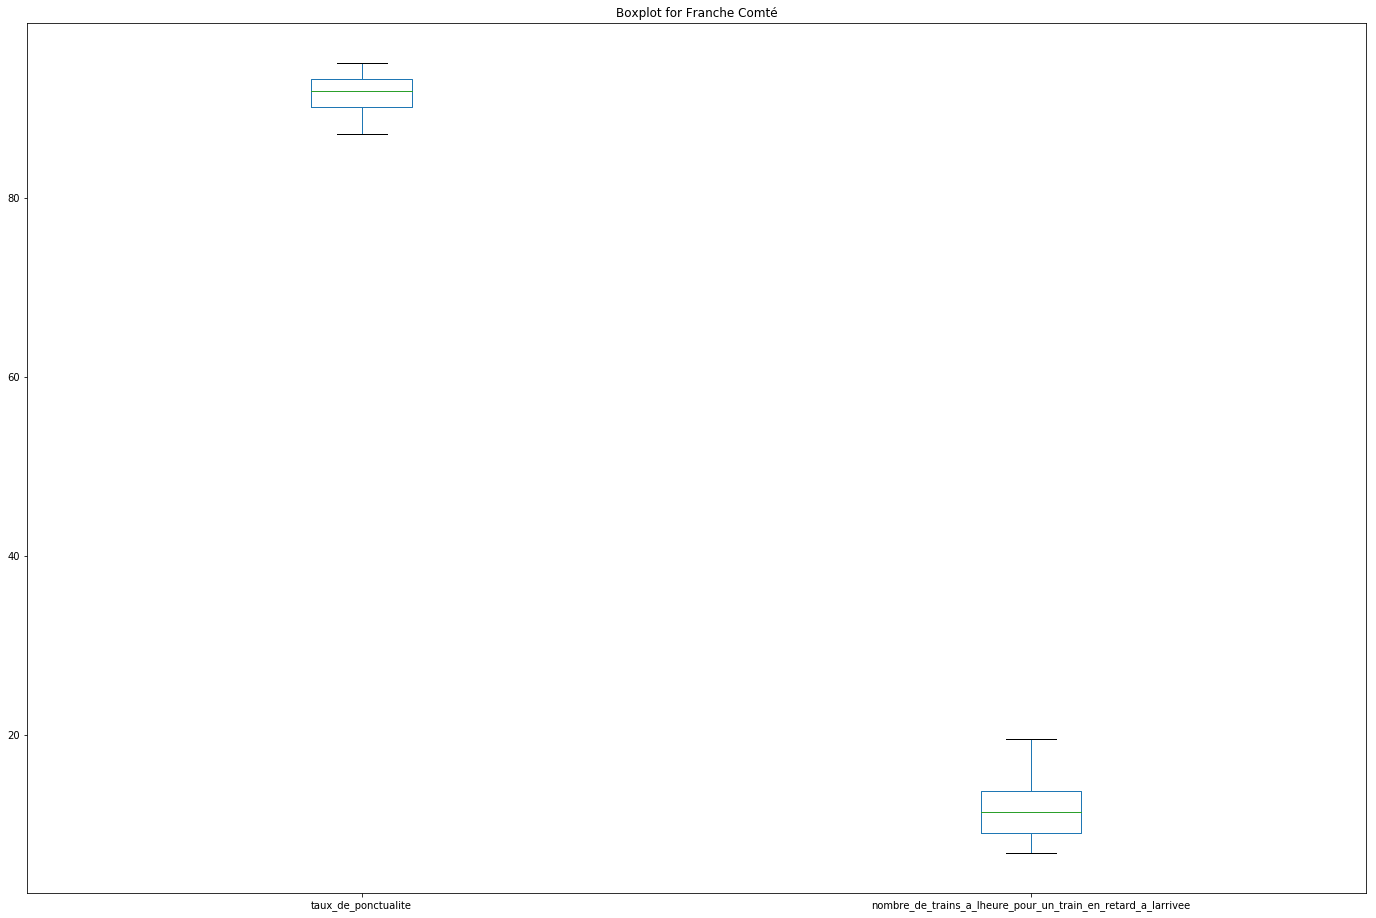

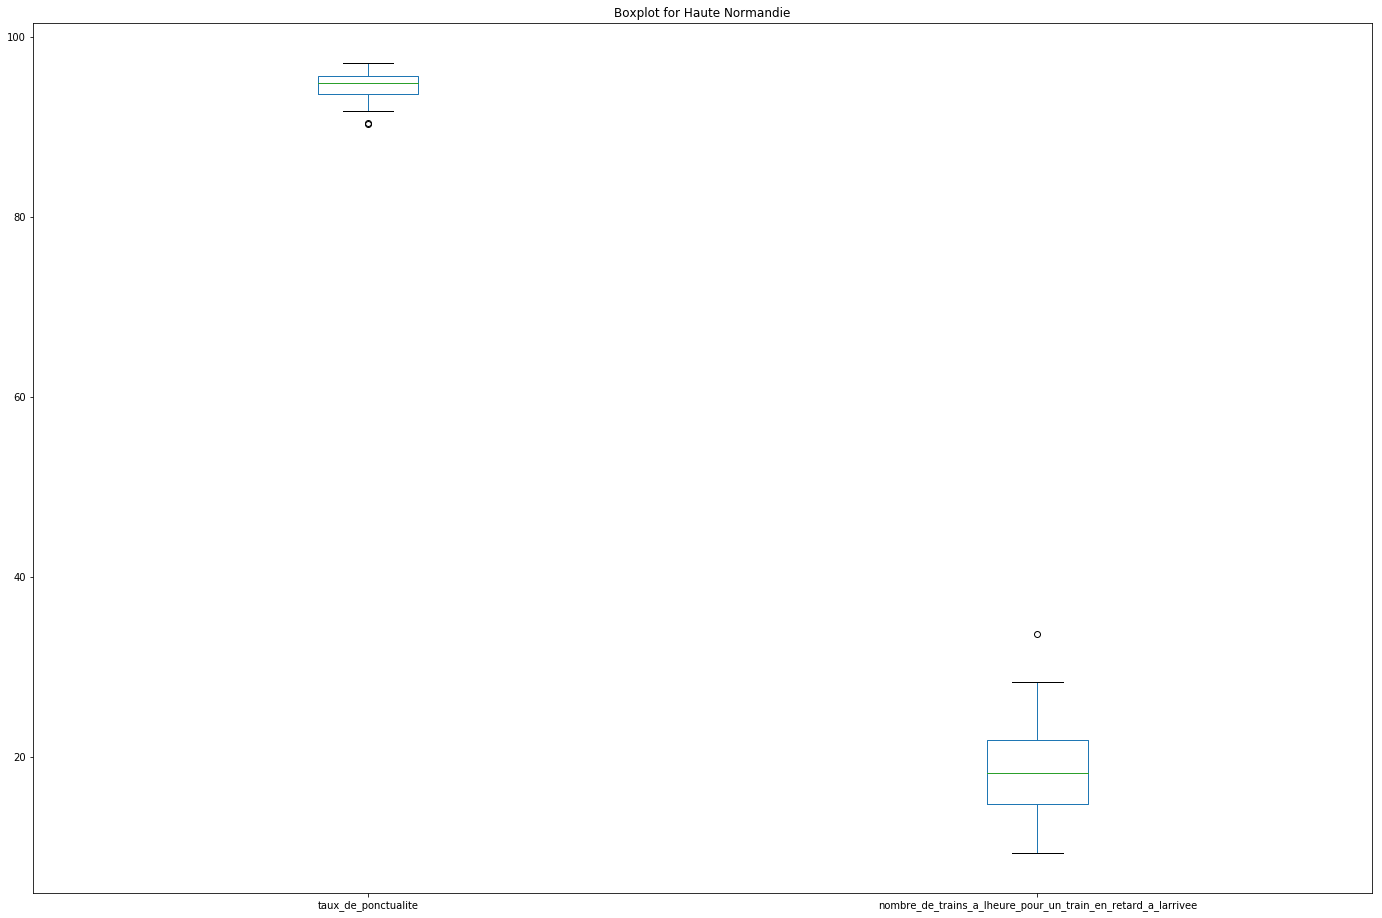

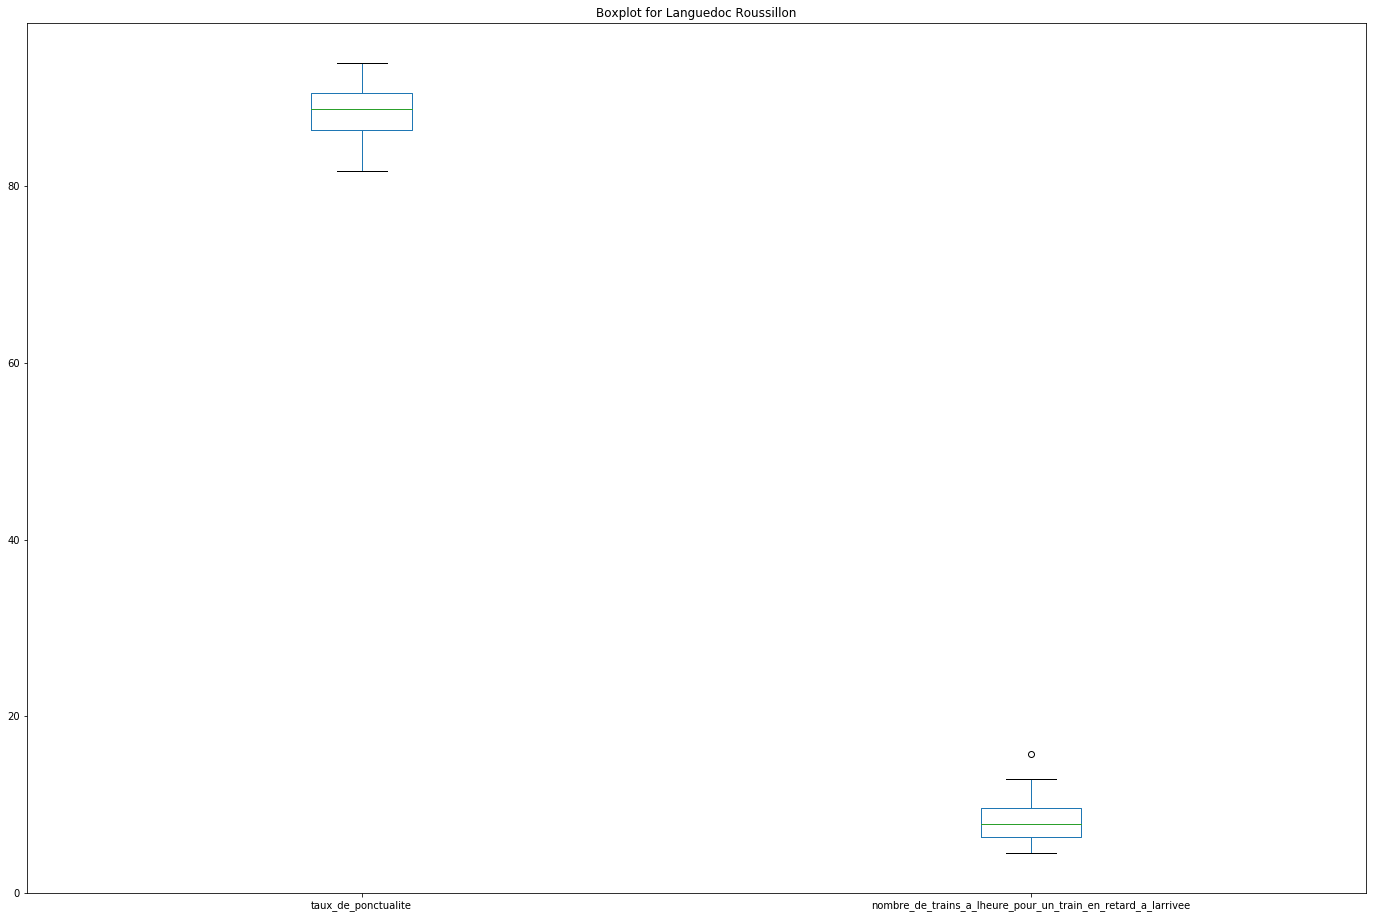

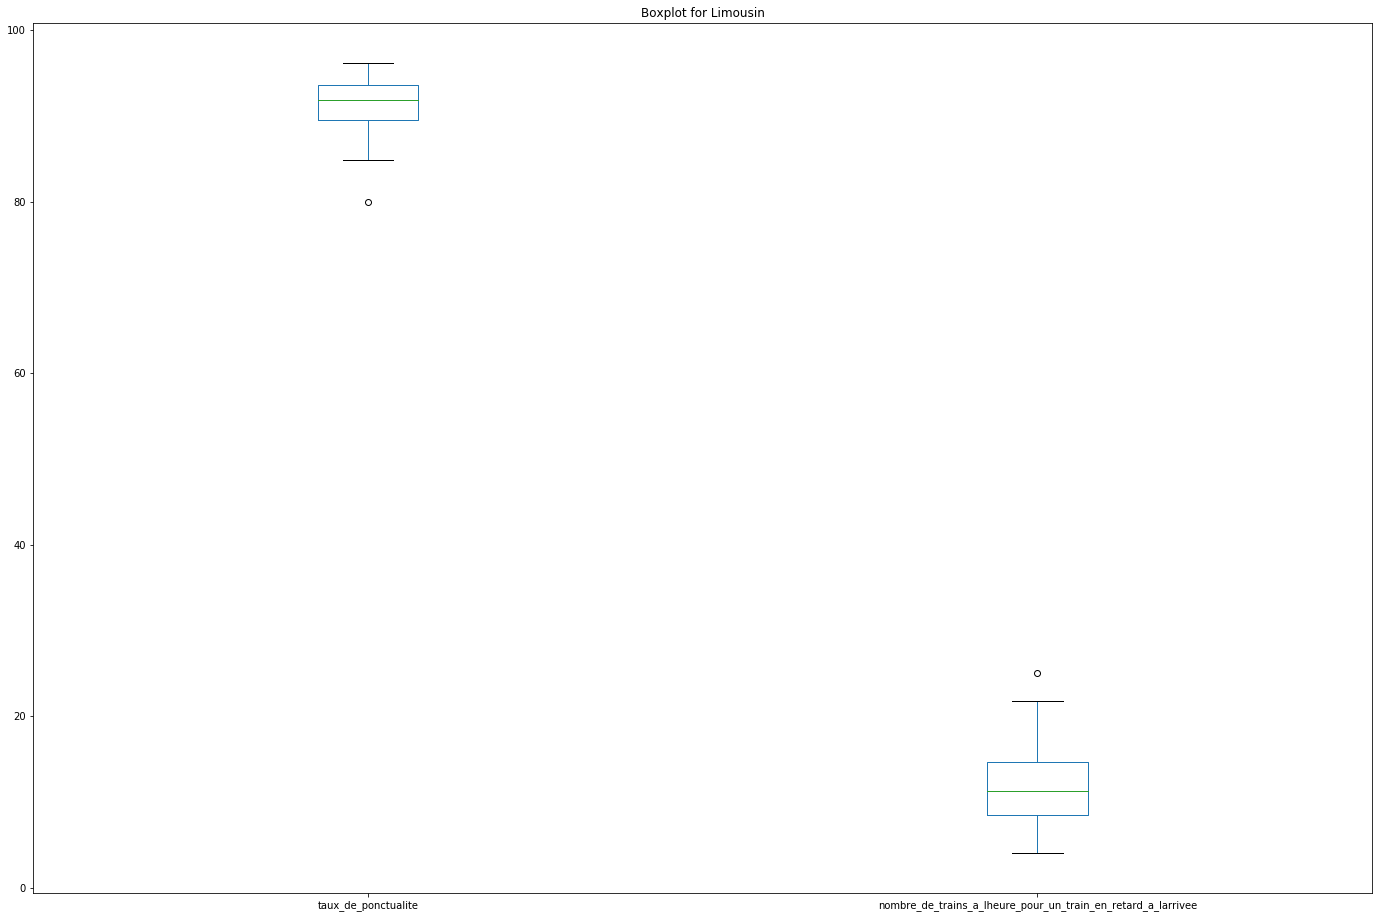

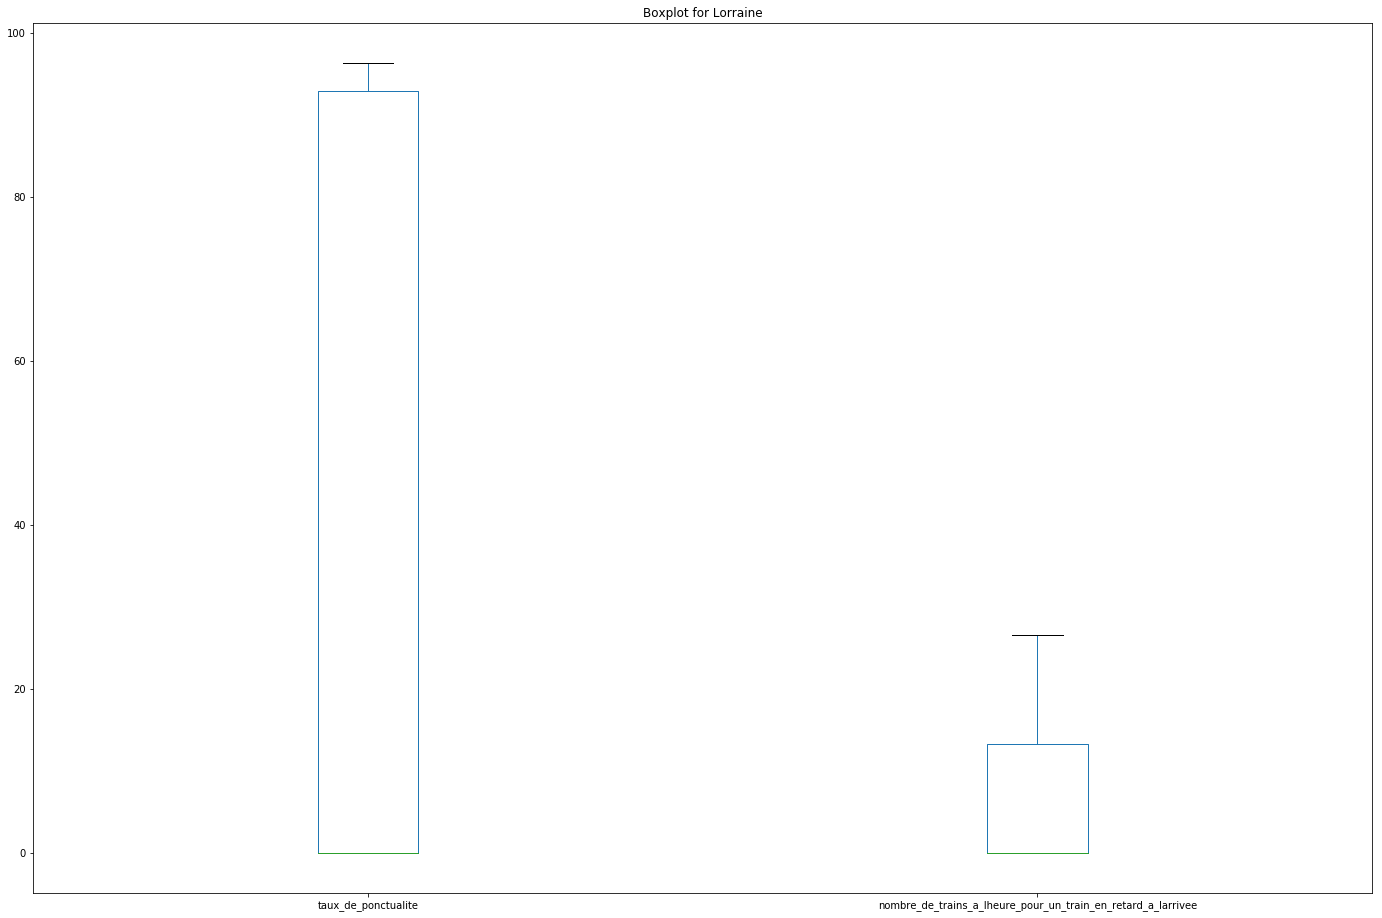

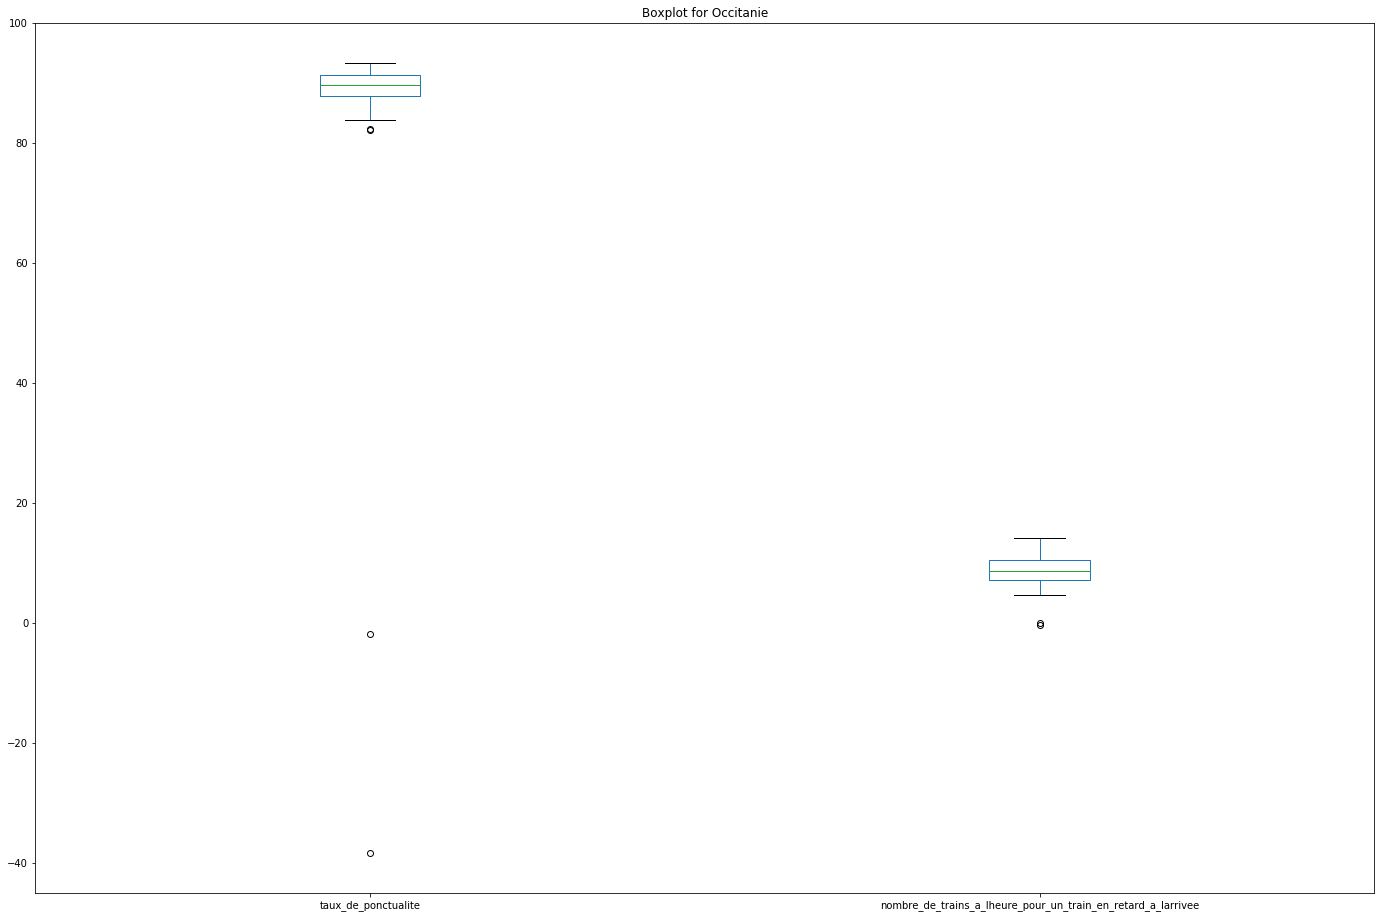

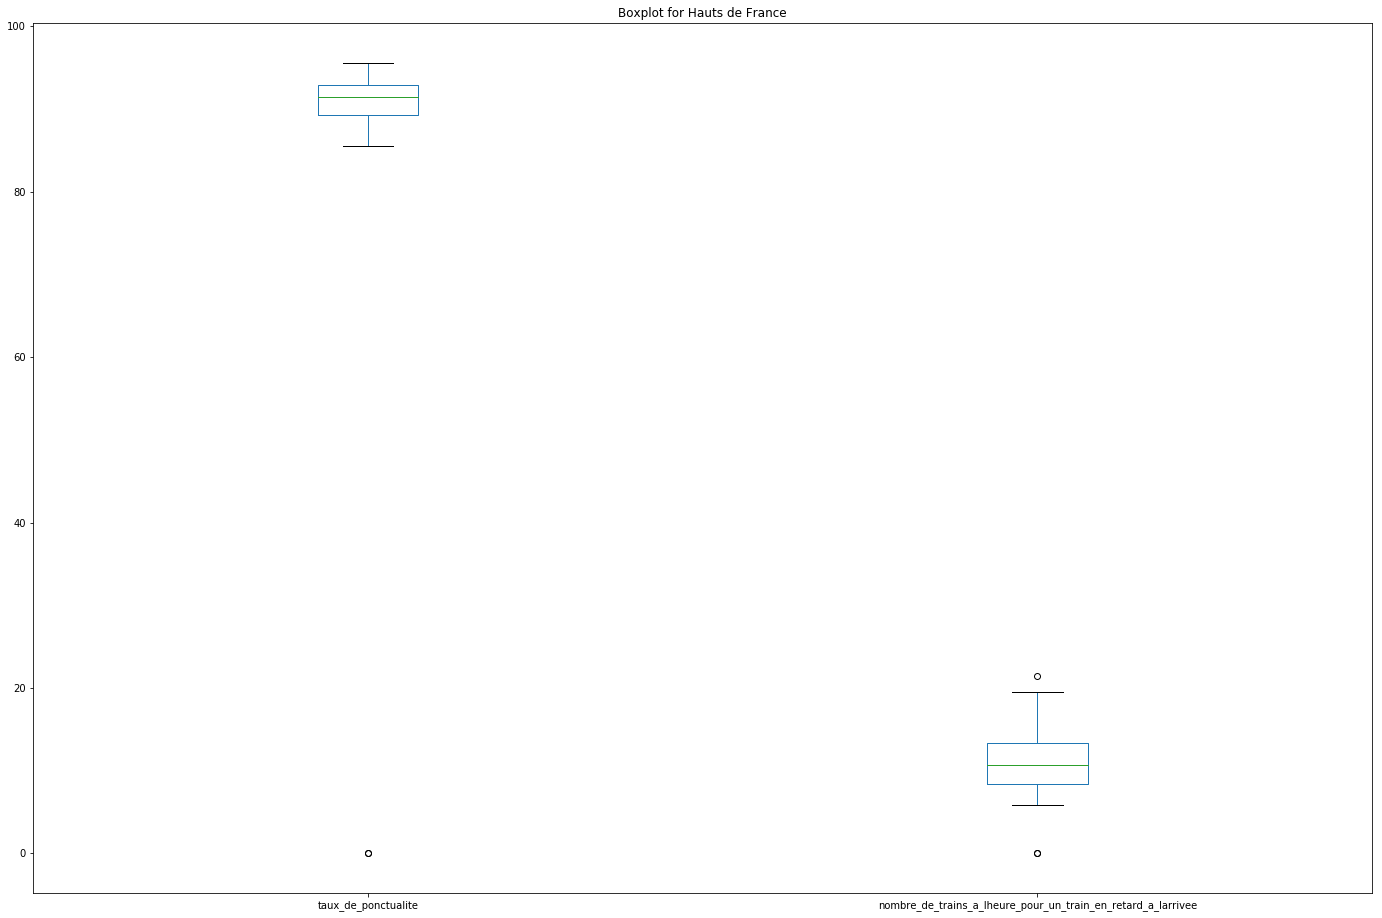

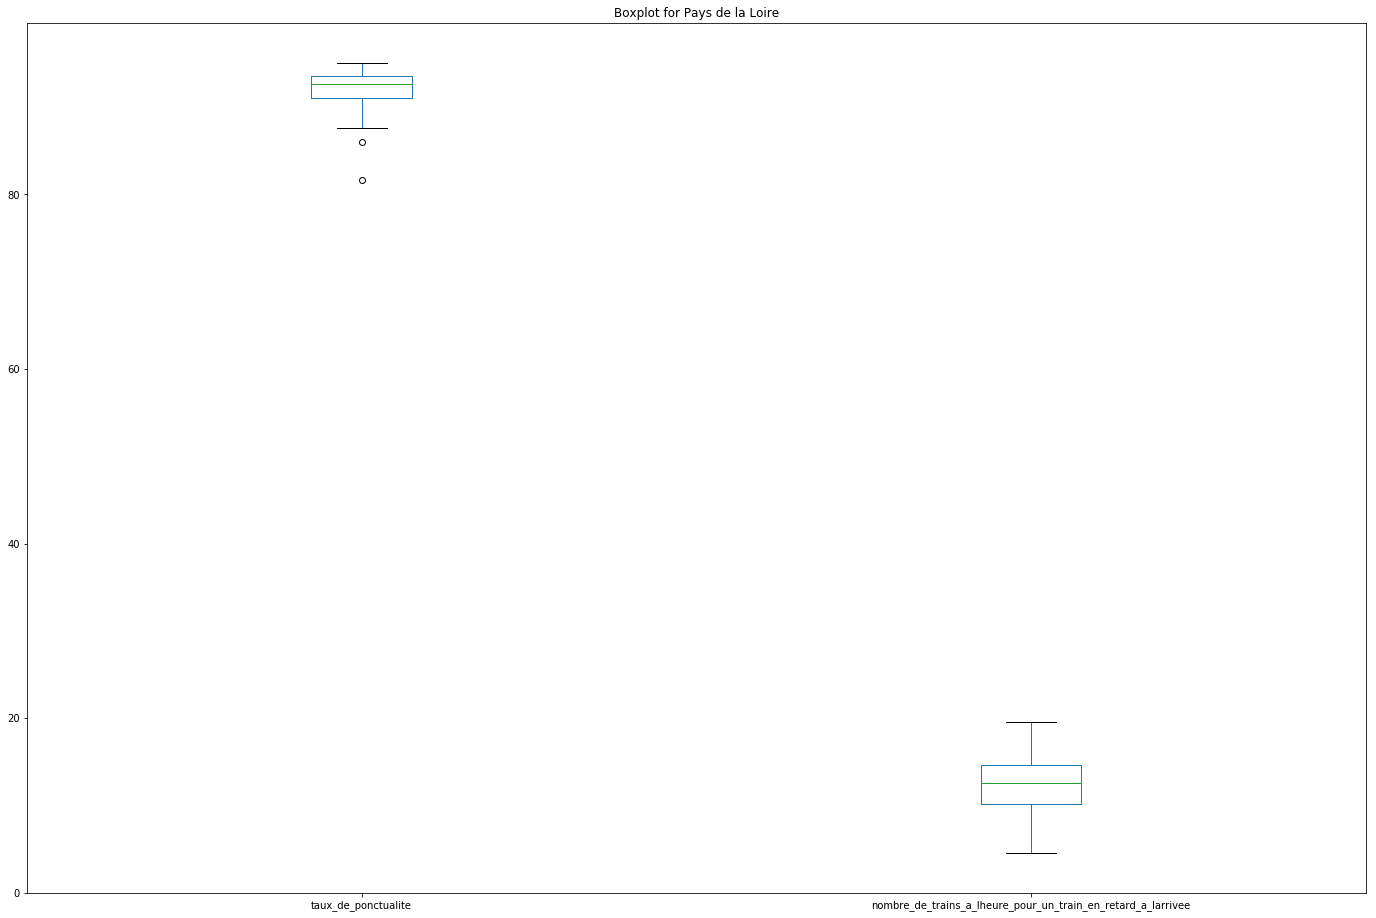

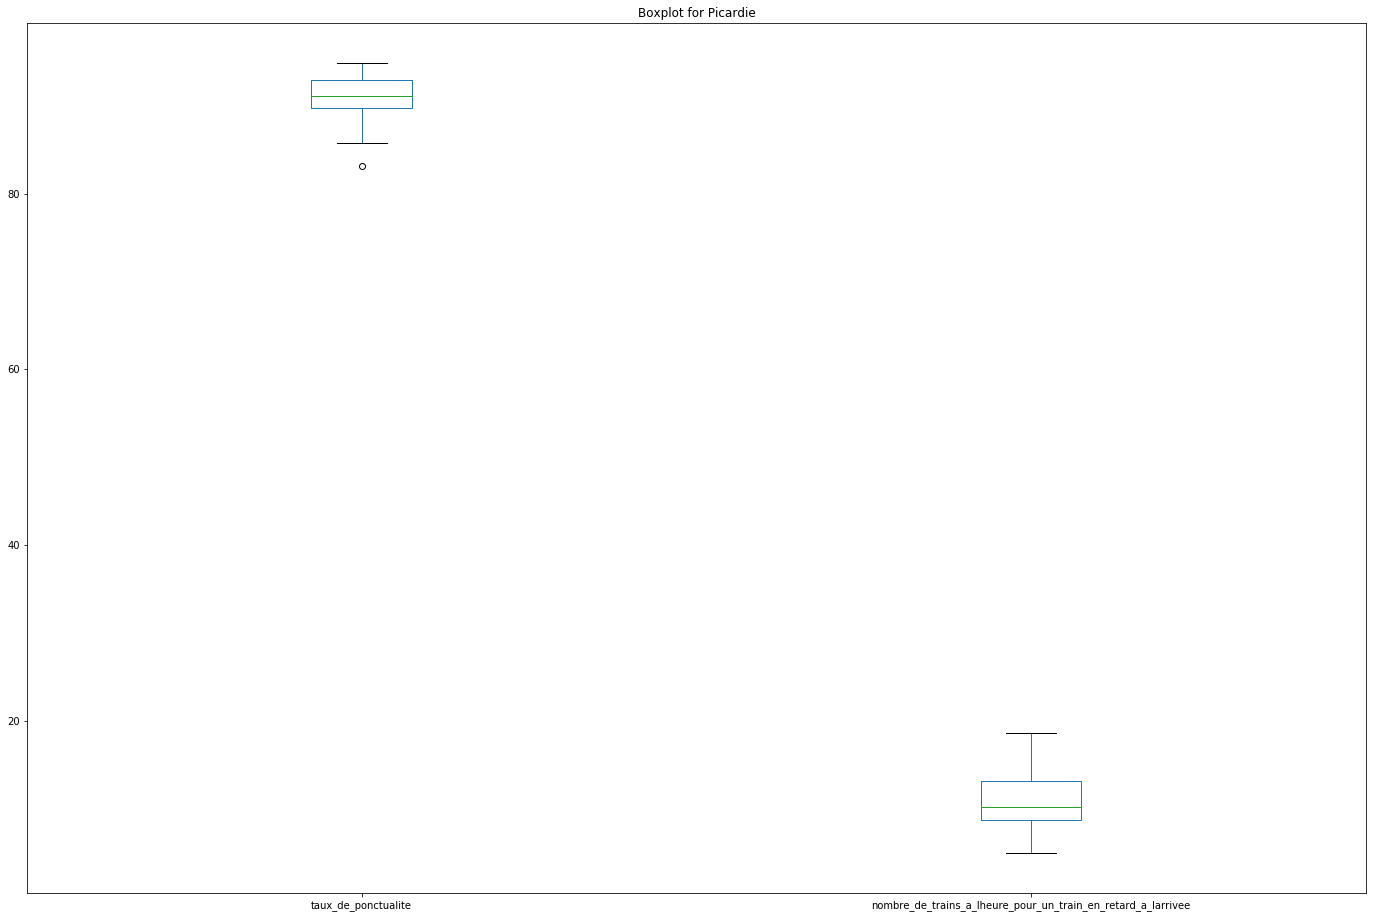

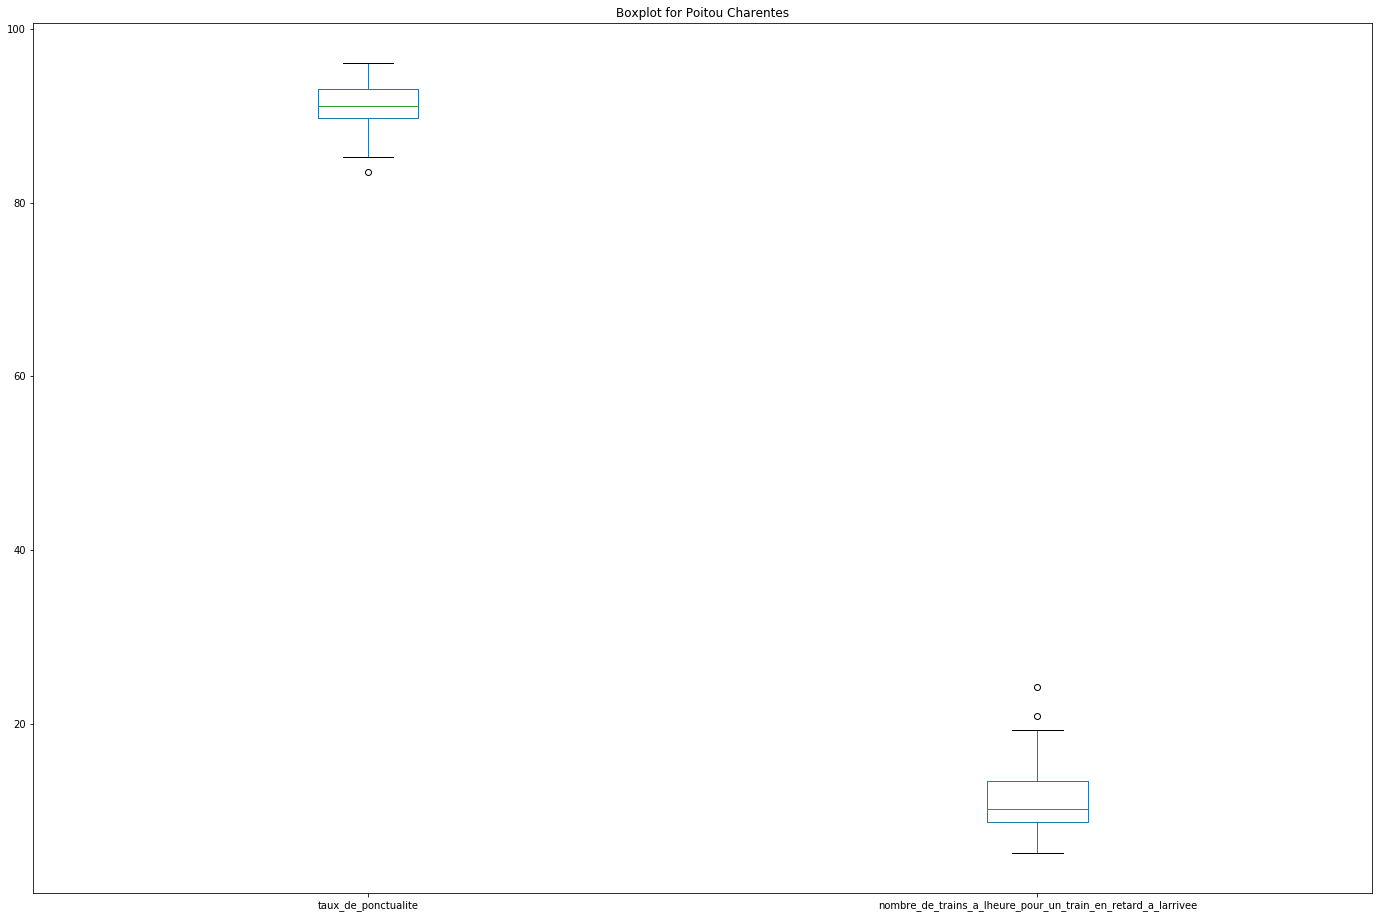

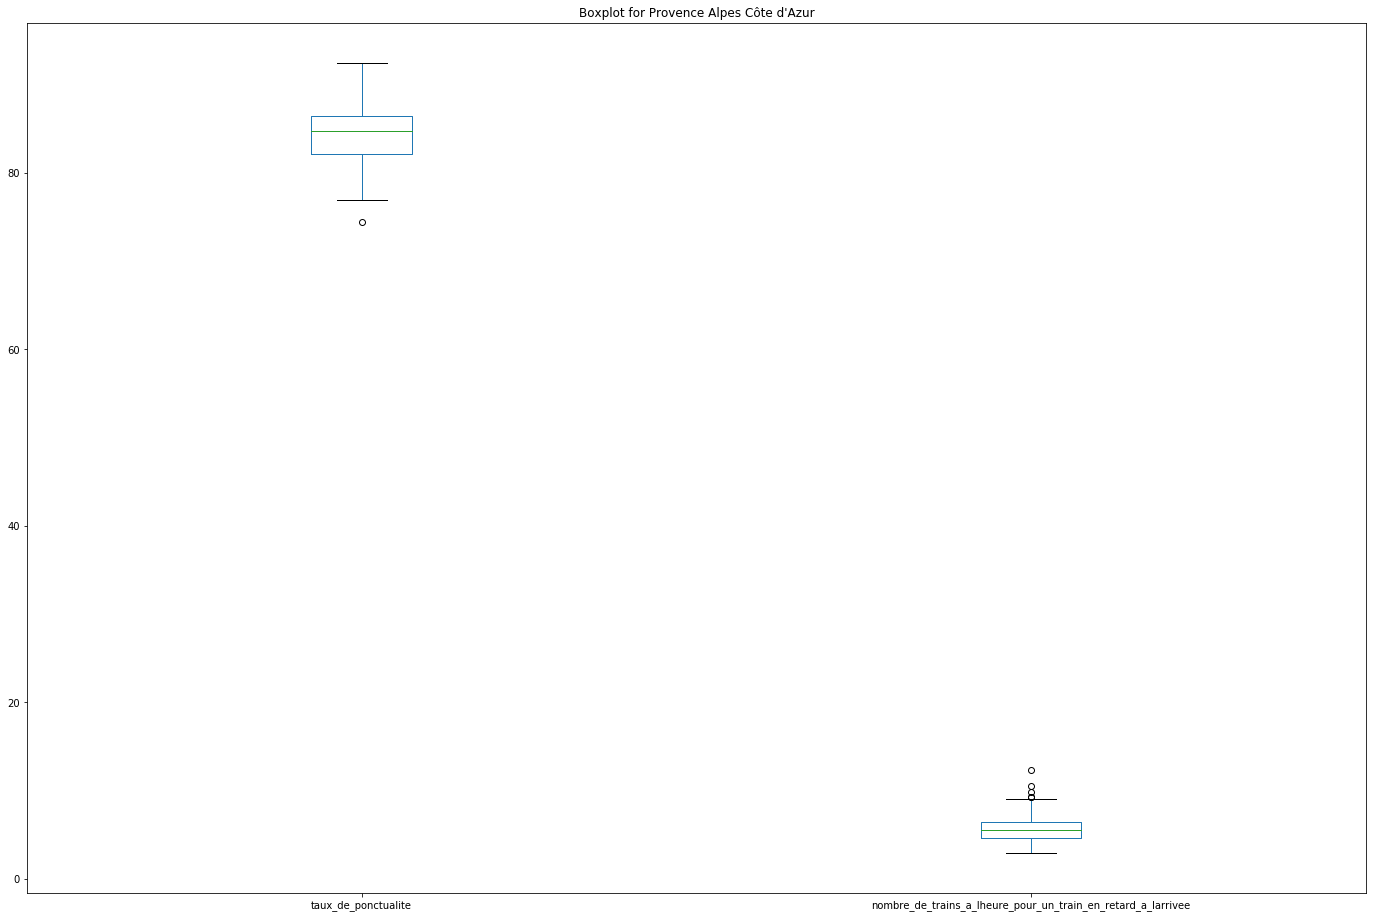

In [15]:
display(Markdown("We do the same for the punctuality rates and the number of trains on time for one delayed train, since their values are much smaller (generally between 0 and 100, with some exceptions)."))
for i in range(1,20):
    # Create the id to sort and filter the data
    id = "TER_"+str(i)
    
    # Filter to keep only the data for the selected region, sorted by date, and with only the attributes that we want
    m = test.loc[test.id == id, ["date","region","taux_de_ponctualite","nombre_de_trains_a_lheure_pour_un_train_en_retard_a_larrivee"]].sort_values(by='date')
    
    matplotlib.pyplot.rcParams["figure.figsize"] = [24.0, 16.0]
    m.plot.box()
    matplotlib.pyplot.title('Boxplot for '+m.region.all())
    
    matplotlib.pyplot.show()

### 4. Correlation analysis
Calculate covariance and correlation matrices. <br>
Which attributes are highly (positively or negatively) correlated? <br>
Create a heatmap of the correlation matrix. 

We output the matrices and heatmaps for the whole dataset, and for each region individually

Covariance and correlation matrices for all regions
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.999531   
nombre_de_trains_annules                                               0.625439   
nombre_de_trains_en_retard_a_l_arrivee                                 0.759383   
taux_de_ponctualite                                                    0.186293   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                     0.061704   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.999531   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                  0.605500   
nombre_de_trains_en_re

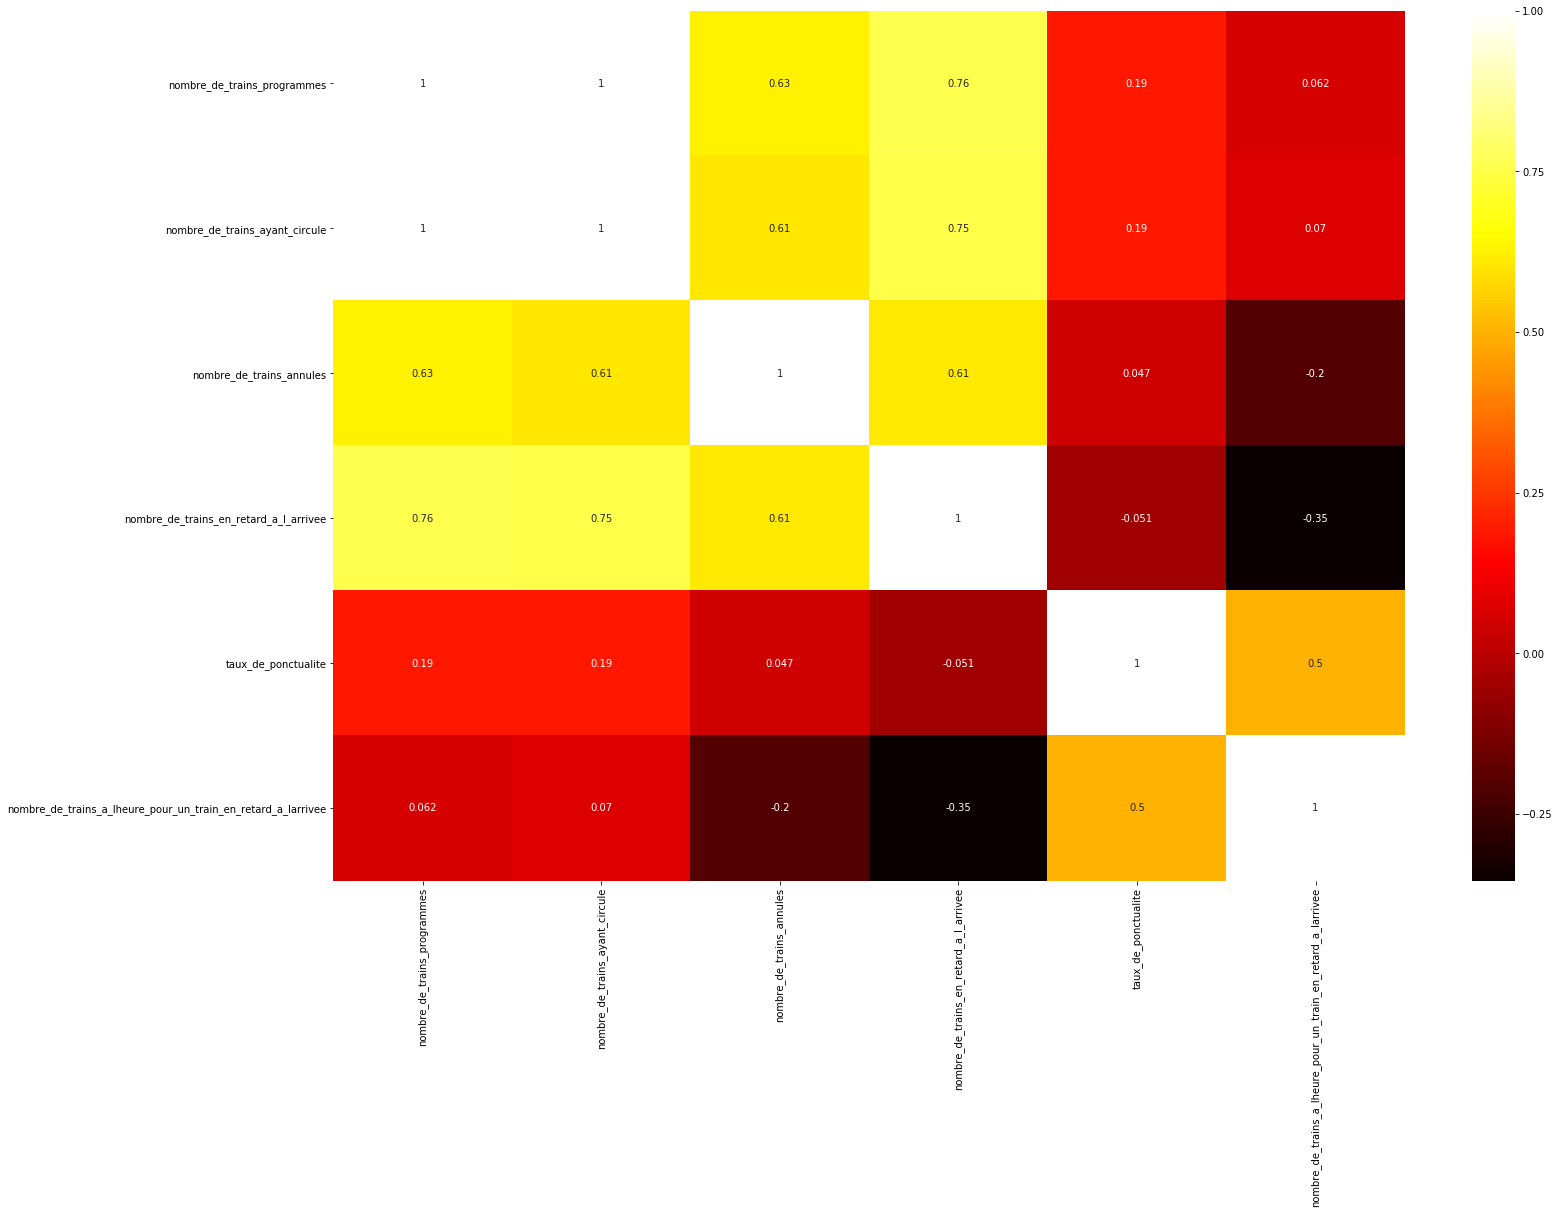

Covariance and correlation matrices for Grand Est
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.999660   
nombre_de_trains_annules                                               0.713599   
nombre_de_trains_en_retard_a_l_arrivee                                 0.920313   
taux_de_ponctualite                                                   -0.521721   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                    -0.498232   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.999660   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                  0.695183   
nombre_de_trains_en_reta

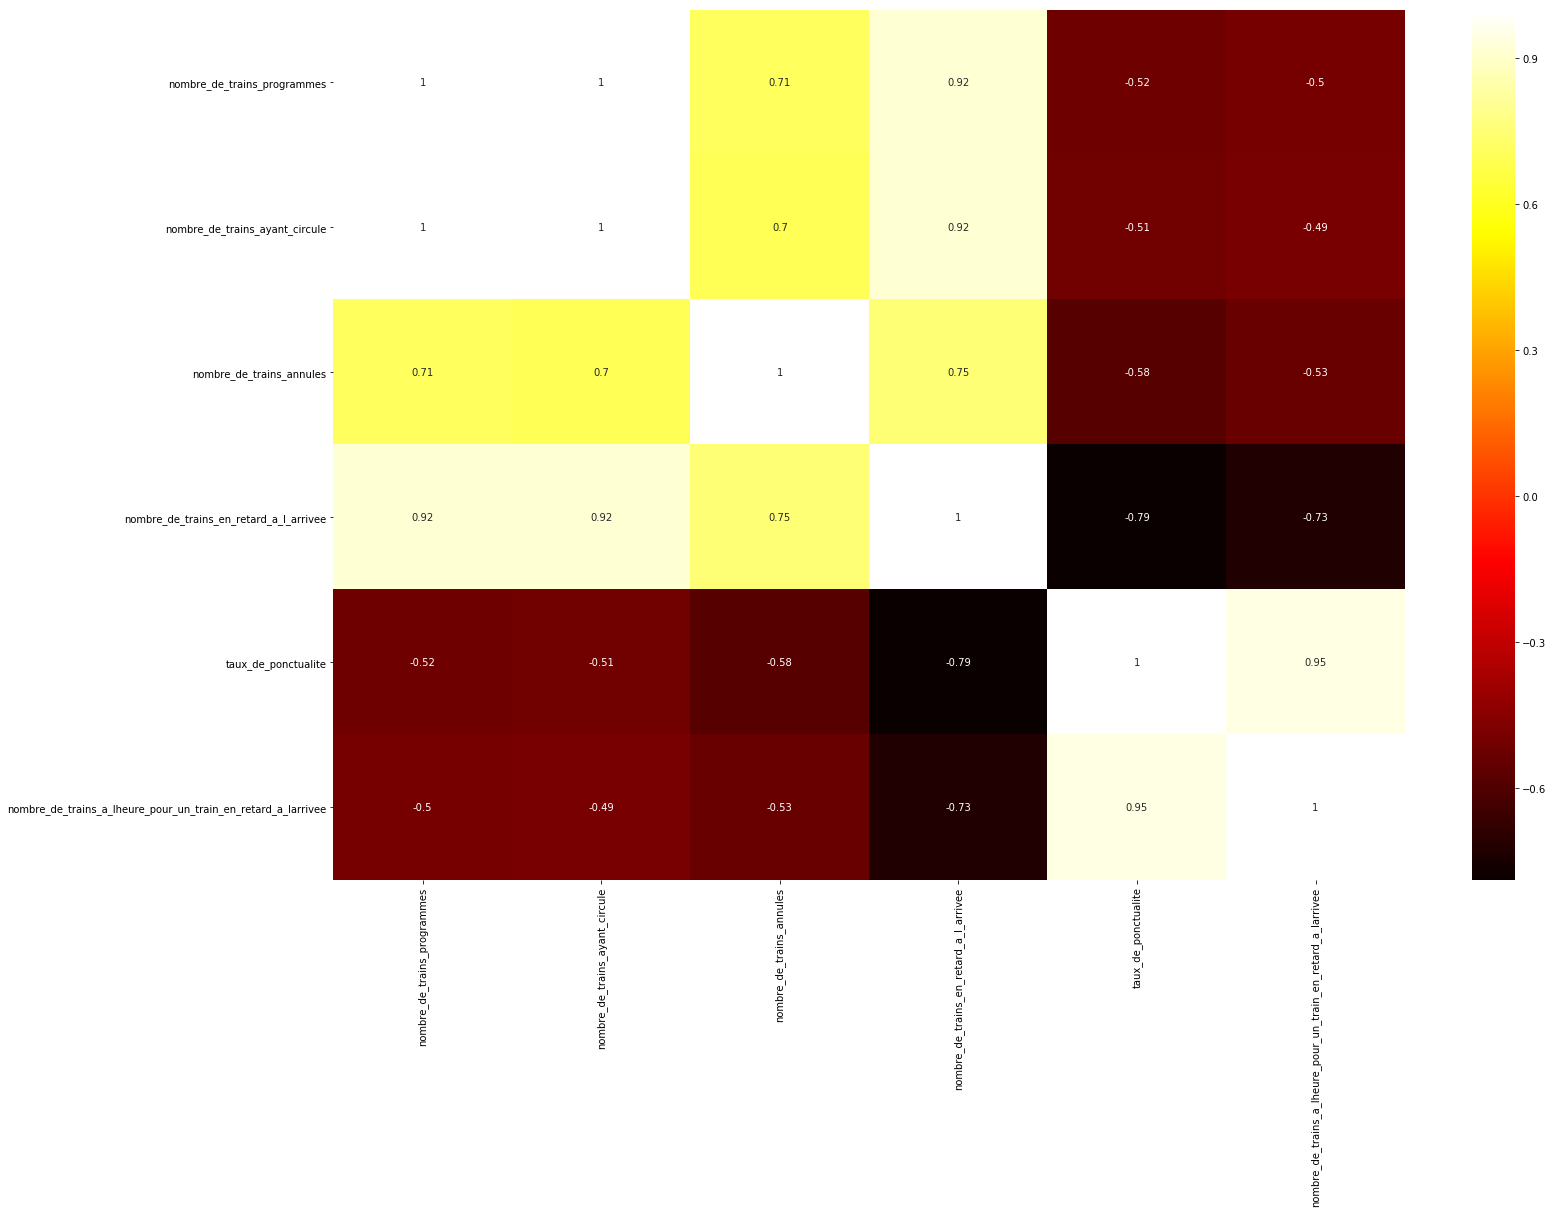

Covariance and correlation matrices for Aquitaine
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.998909   
nombre_de_trains_annules                                               0.378596   
nombre_de_trains_en_retard_a_l_arrivee                                 0.550463   
taux_de_ponctualite                                                    0.576054   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                     0.619747   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.998909   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                  0.336859   
nombre_de_trains_en_reta

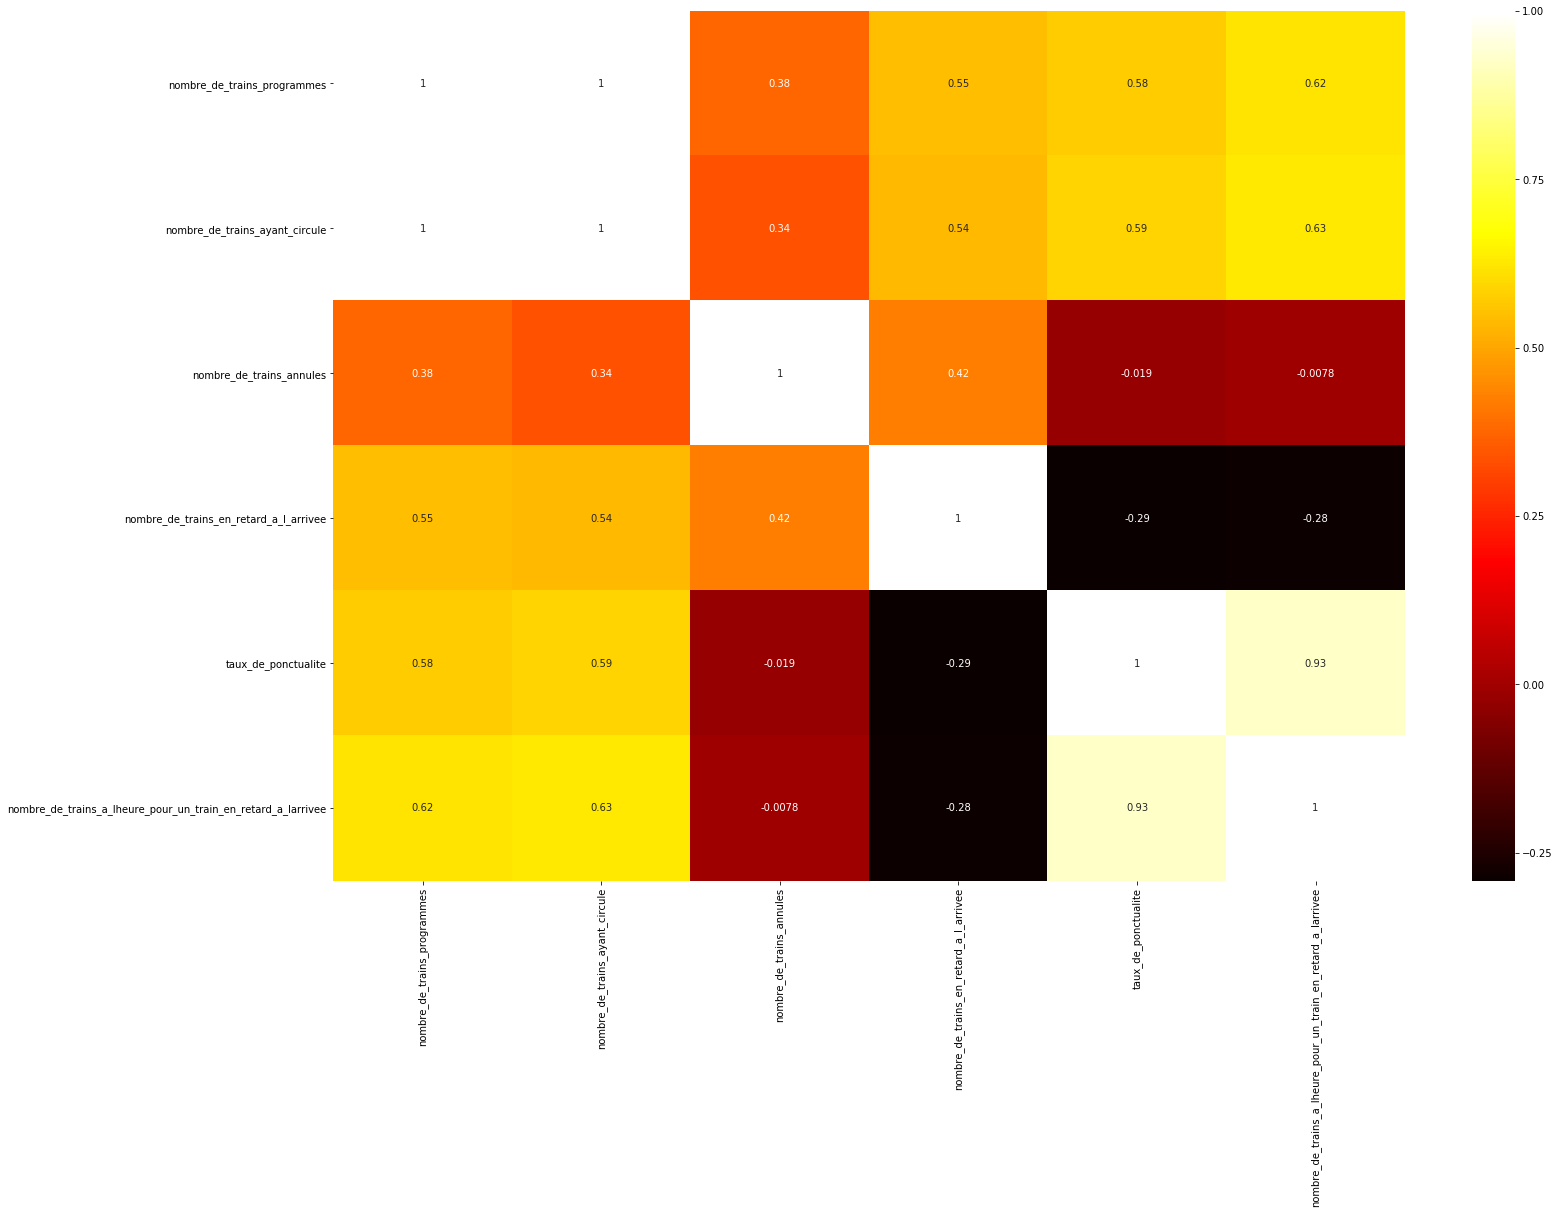

Covariance and correlation matrices for Auvergne-Rhône Alpes
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.999878   
nombre_de_trains_annules                                               0.806830   
nombre_de_trains_en_retard_a_l_arrivee                                 0.964094   
taux_de_ponctualite                                                   -0.574404   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                    -0.510346   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.999878   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                  0.797515   
nombre_de_tra

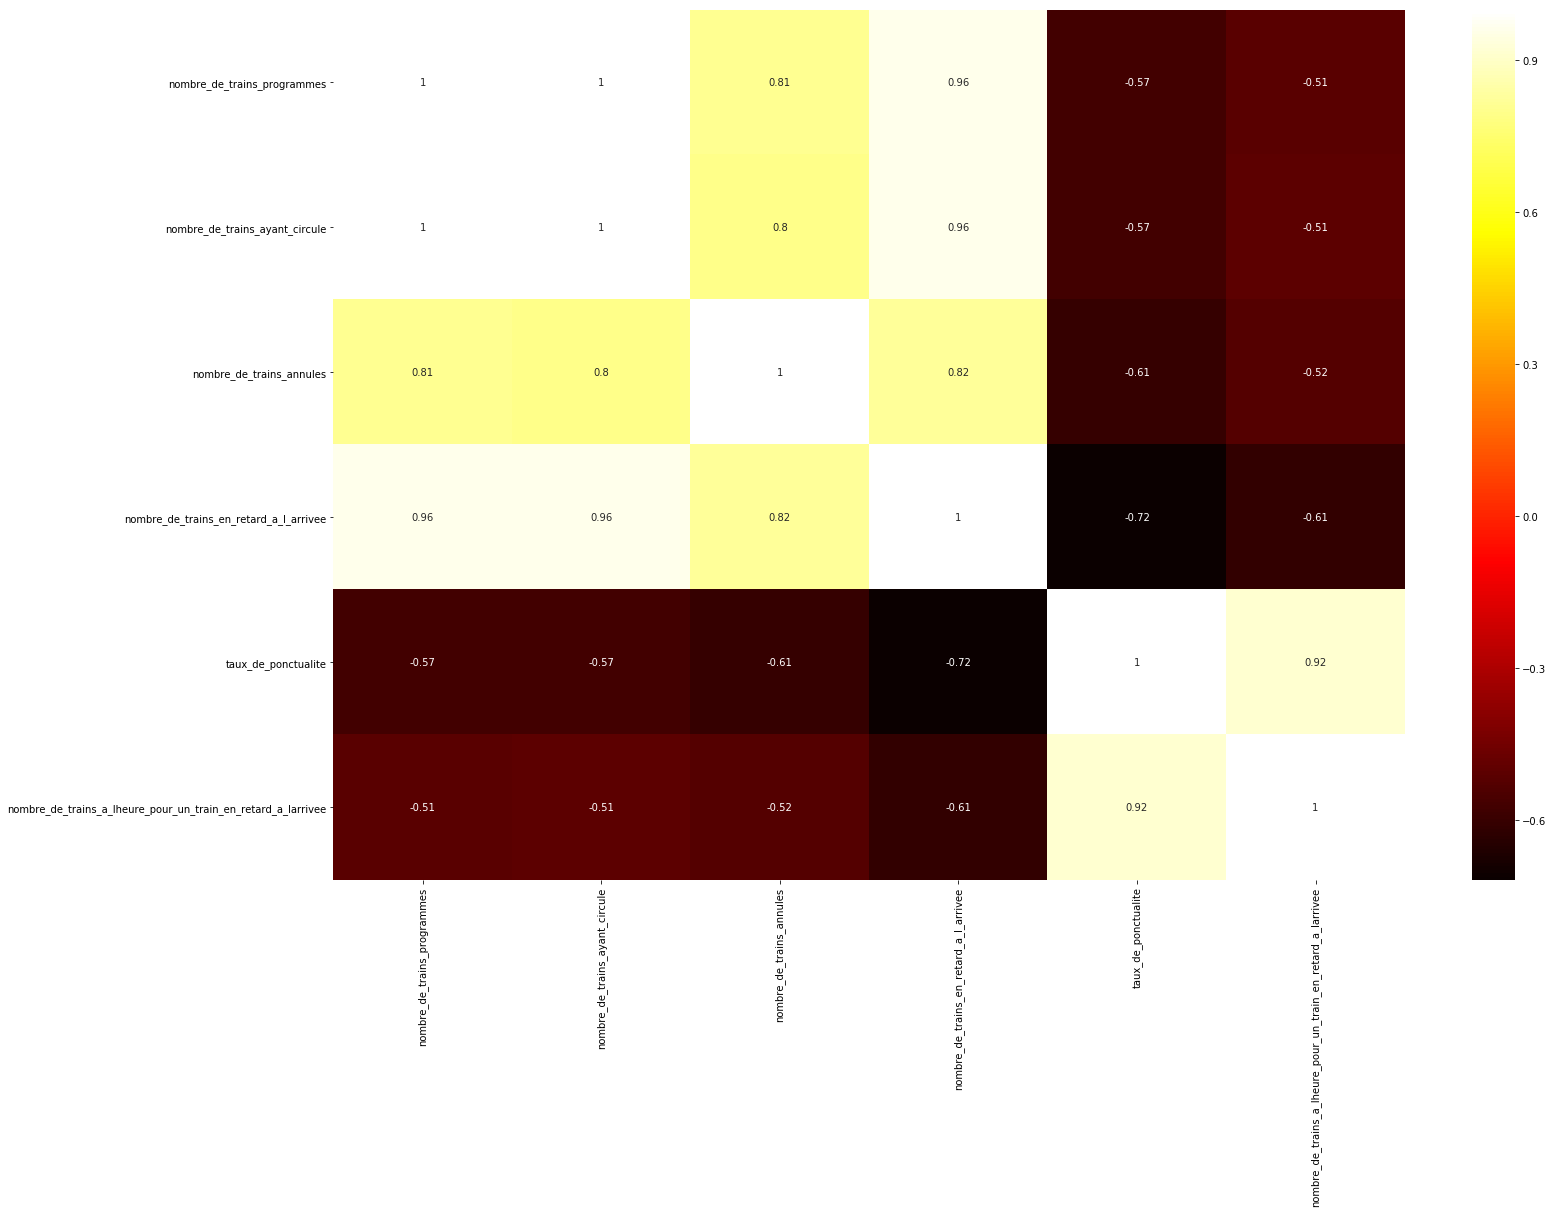

Covariance and correlation matrices for Normandie
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.999282   
nombre_de_trains_annules                                               0.422120   
nombre_de_trains_en_retard_a_l_arrivee                                 0.786327   
taux_de_ponctualite                                                   -0.089720   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                    -0.052969   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.999282   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                  0.387674   
nombre_de_trains_en_reta

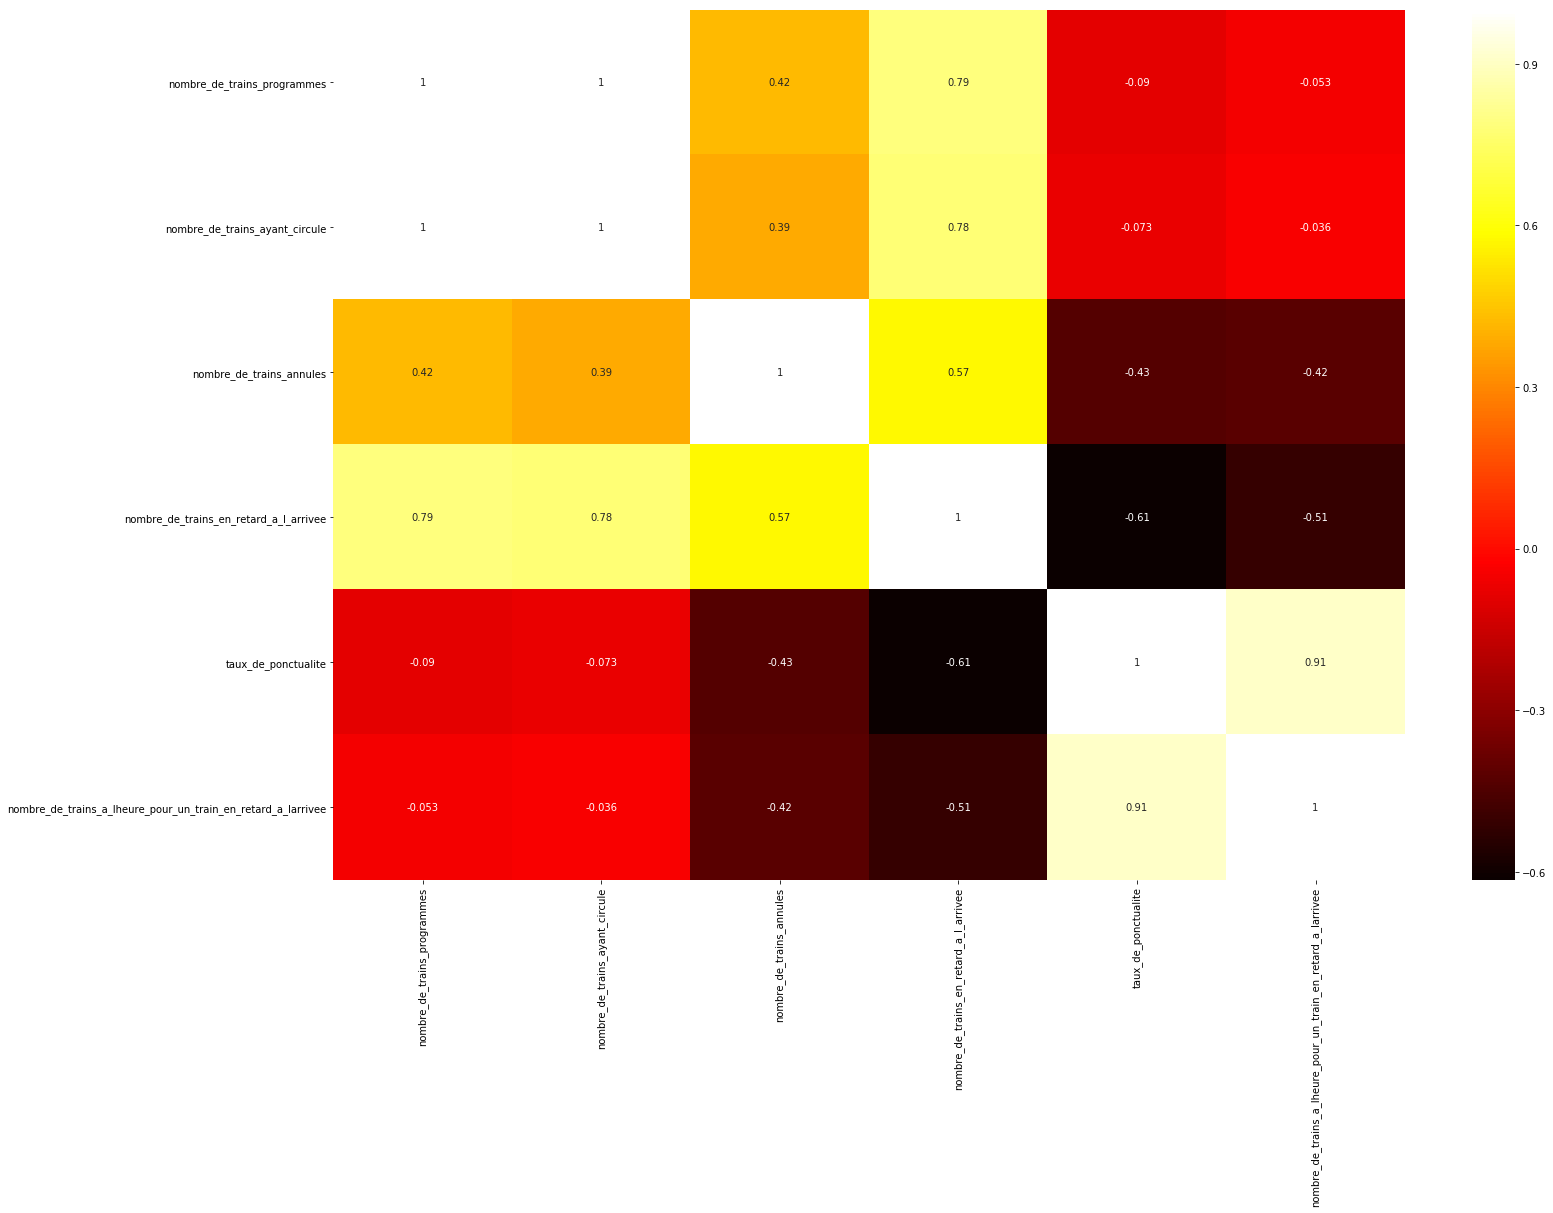

Covariance and correlation matrices for Bourgogne-Franche Comté
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.999101   
nombre_de_trains_annules                                               0.213432   
nombre_de_trains_en_retard_a_l_arrivee                                 0.699082   
taux_de_ponctualite                                                    0.426108   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                     0.501354   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.999101   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                  0.177994   
nombre_de_

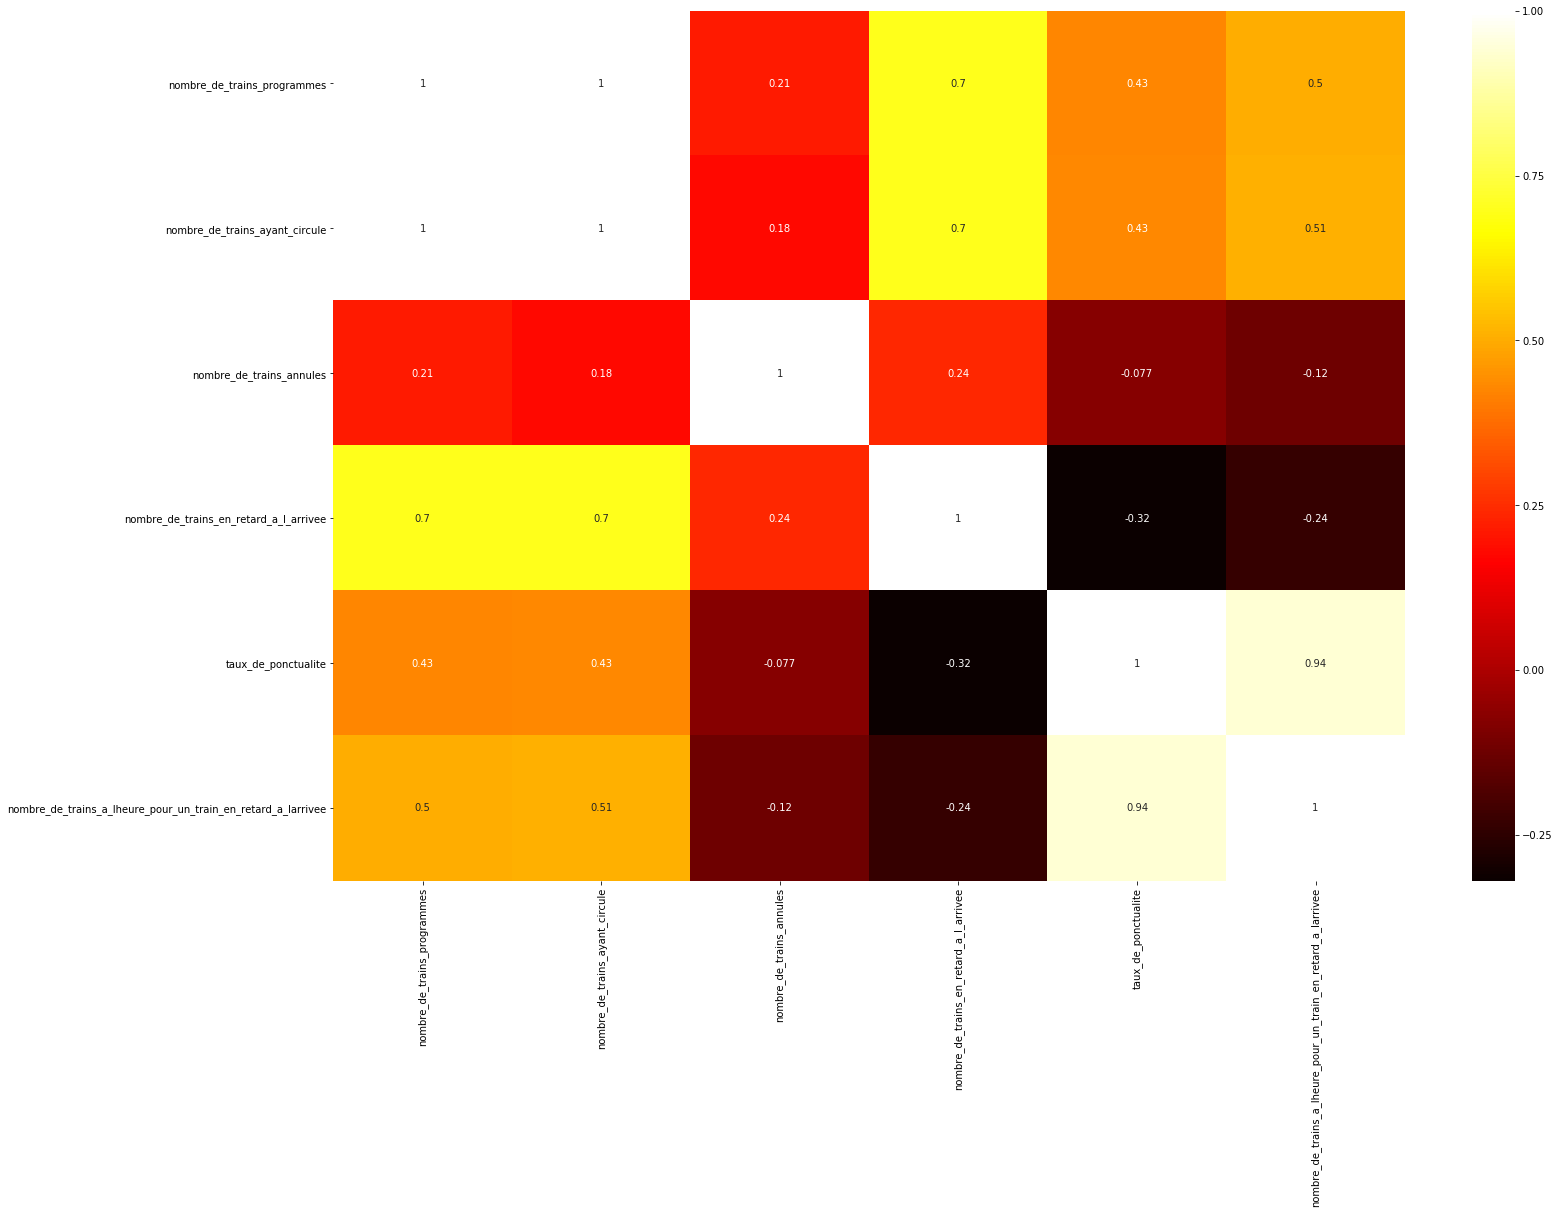

Covariance and correlation matrices for Bretagne
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.997662   
nombre_de_trains_annules                                               0.279673   
nombre_de_trains_en_retard_a_l_arrivee                                 0.113021   
taux_de_ponctualite                                                    0.296943   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                     0.200559   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.997662   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                  0.213399   
nombre_de_trains_en_retar

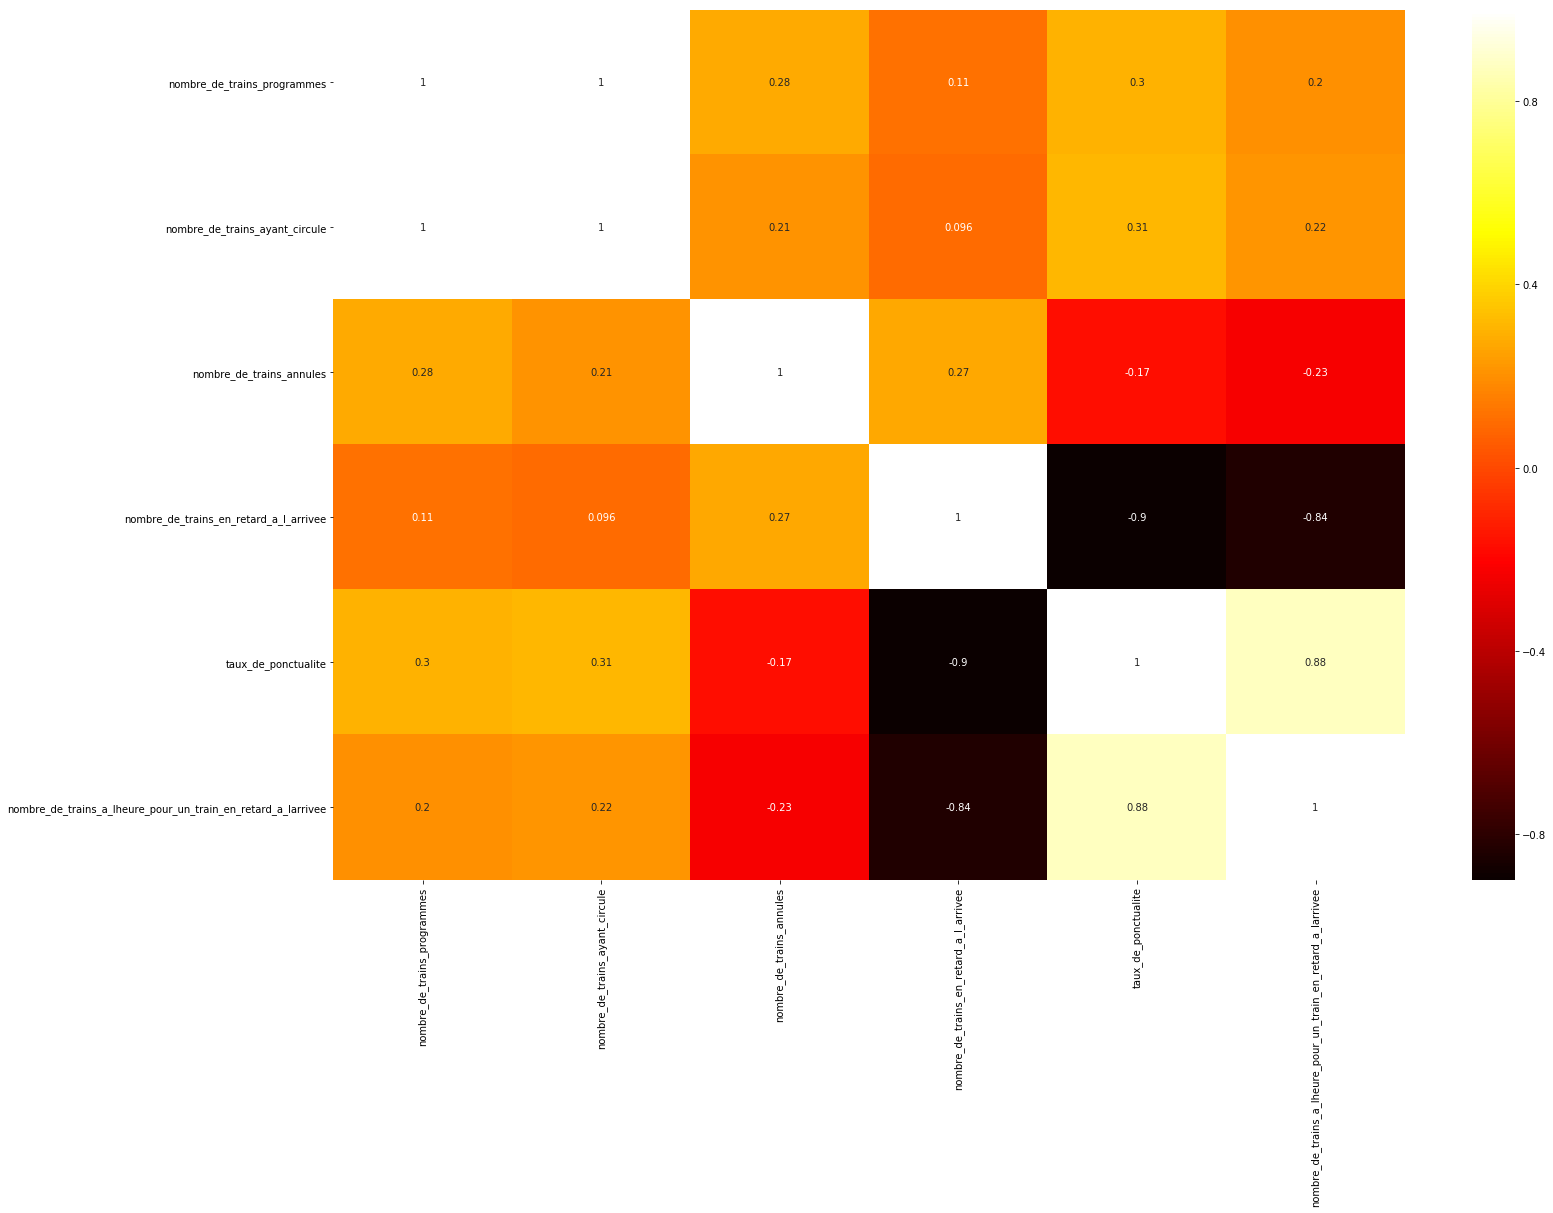

Covariance and correlation matrices for Centre
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.895664   
nombre_de_trains_annules                                              -0.019225   
nombre_de_trains_en_retard_a_l_arrivee                                 0.417879   
taux_de_ponctualite                                                    0.033998   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                     0.007339   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.895664   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                 -0.149855   
nombre_de_trains_en_retard_

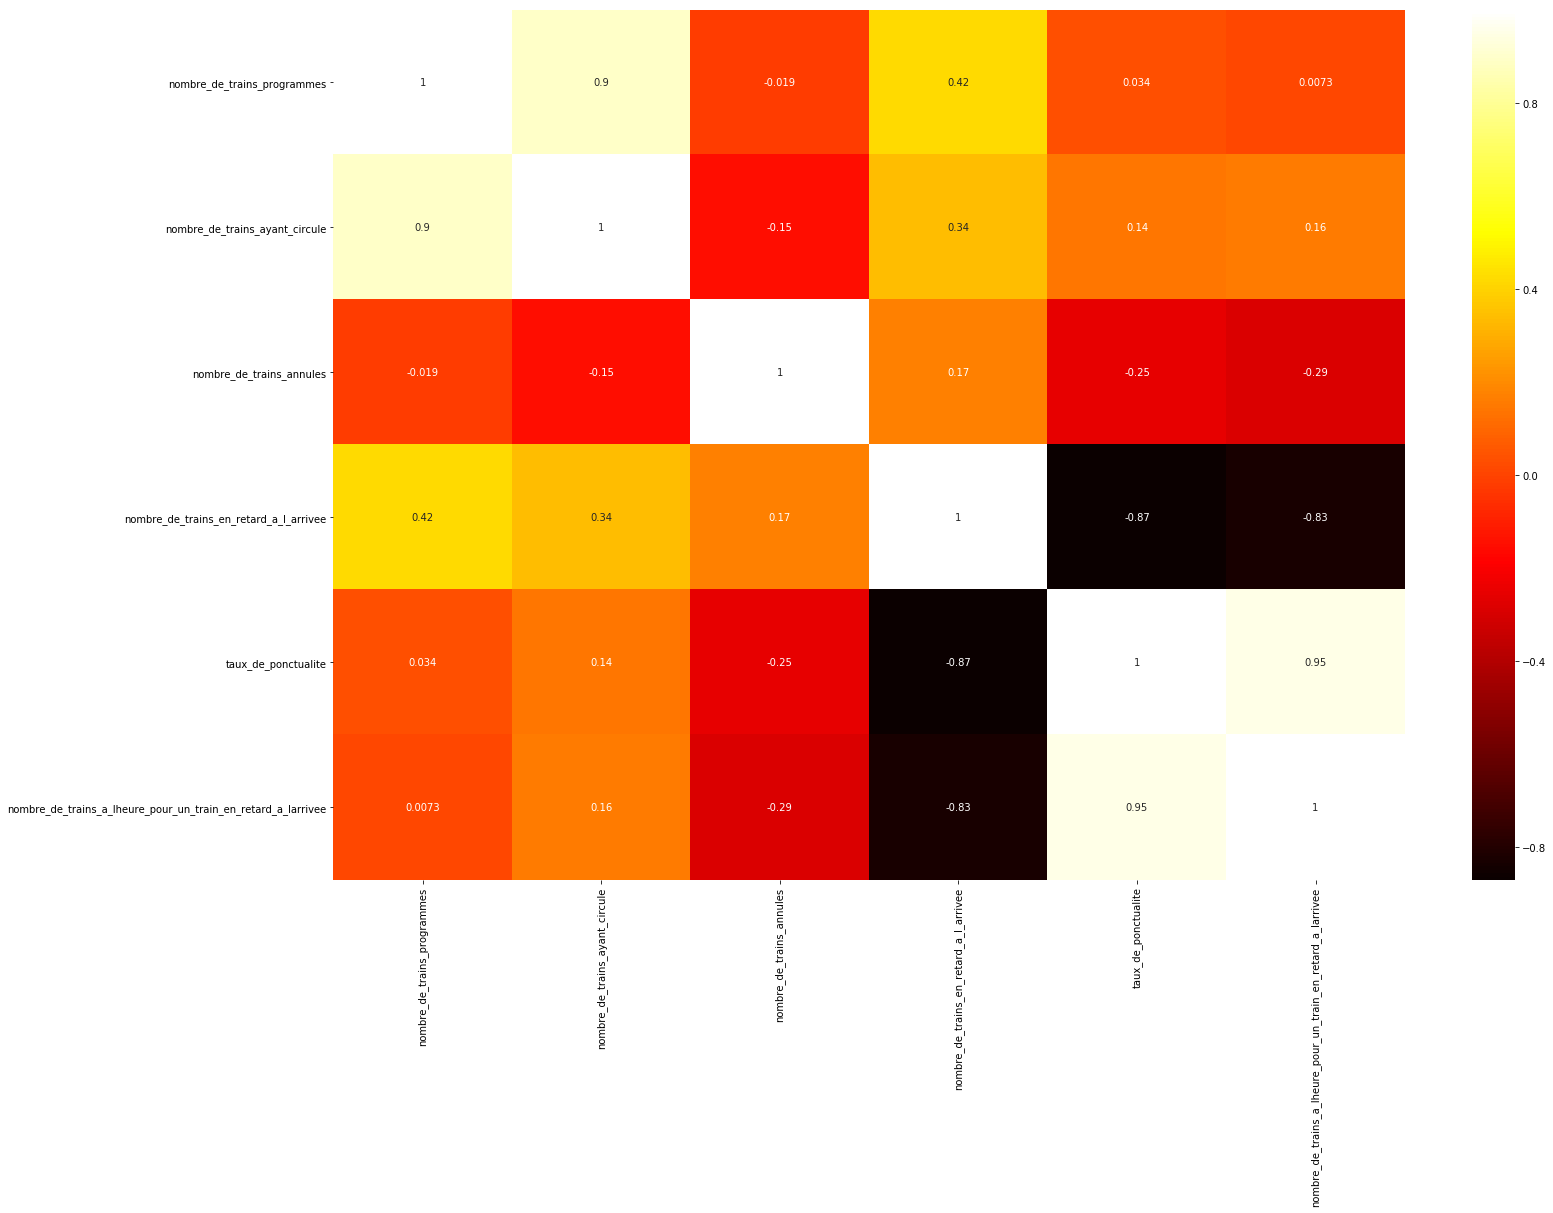

Covariance and correlation matrices for Champagne Ardenne
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.976279   
nombre_de_trains_annules                                               0.249106   
nombre_de_trains_en_retard_a_l_arrivee                                 0.146028   
taux_de_ponctualite                                                    0.145879   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                     0.130757   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.976279   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                  0.033508   
nombre_de_trains

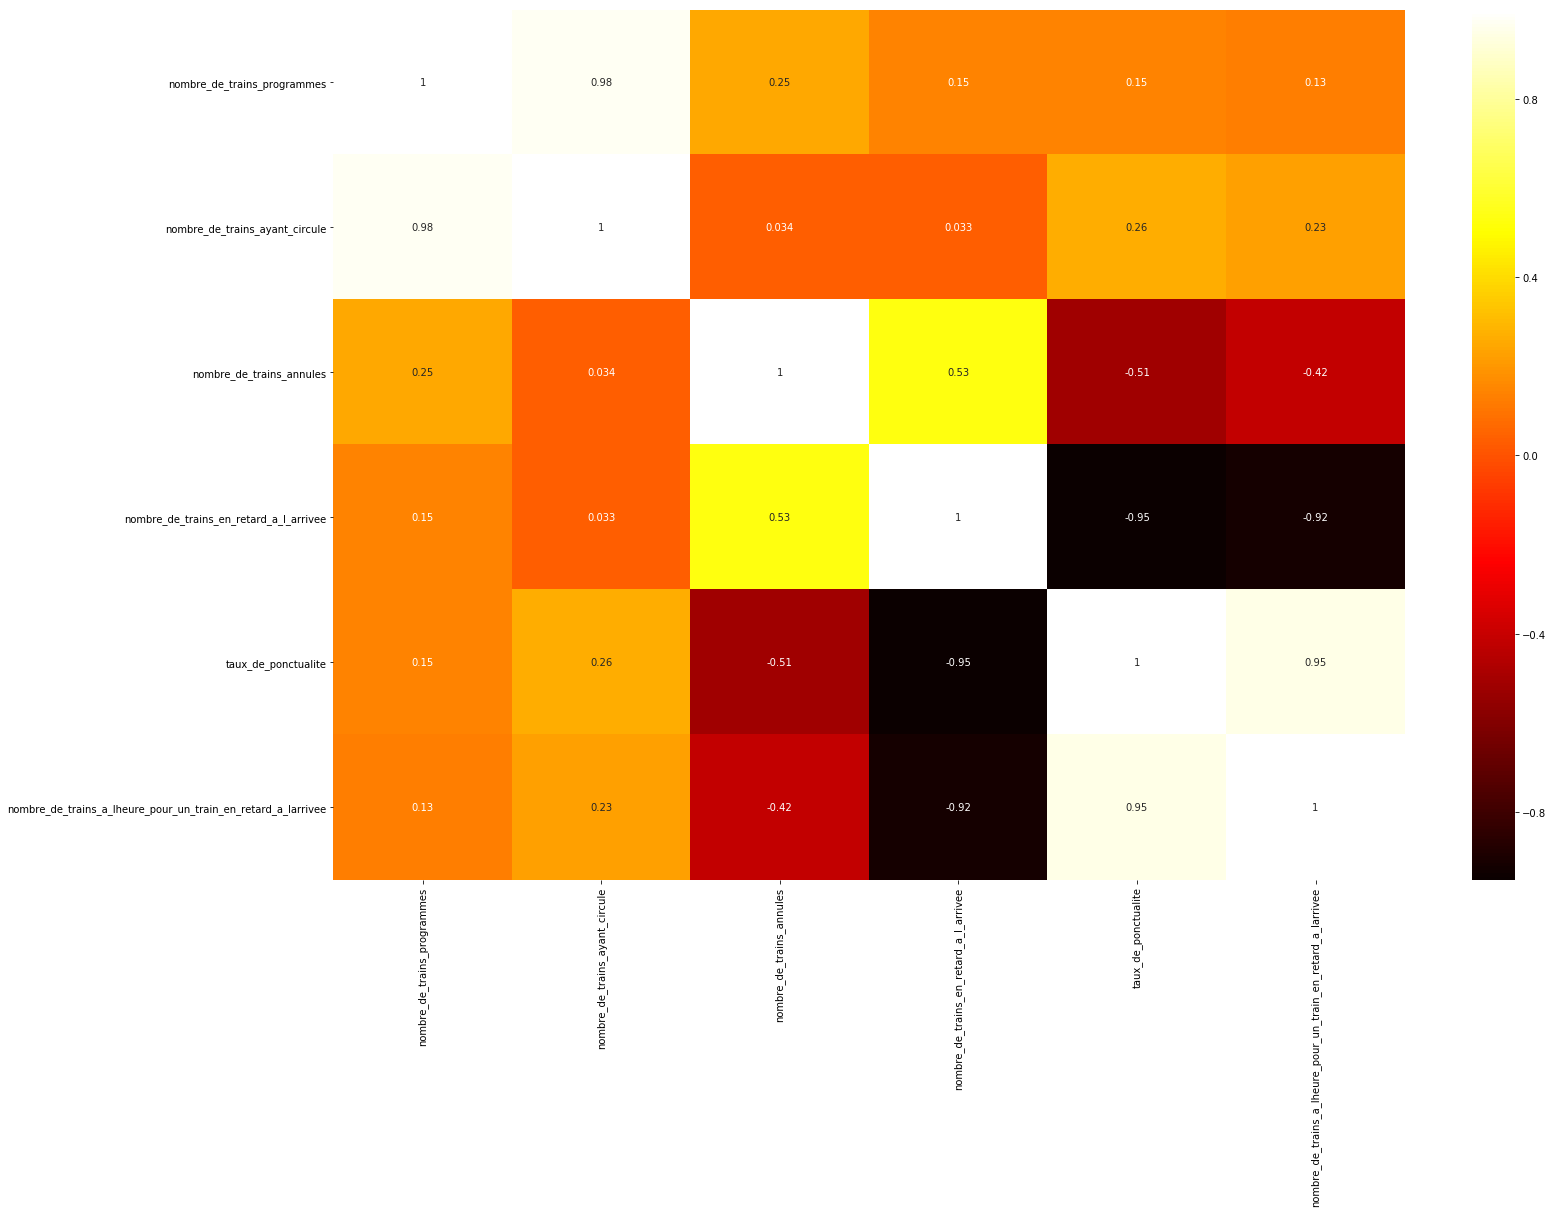

Covariance and correlation matrices for Franche Comté
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.698226   
nombre_de_trains_annules                                              -0.272423   
nombre_de_trains_en_retard_a_l_arrivee                                 0.205932   
taux_de_ponctualite                                                    0.125201   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                     0.073597   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.698226   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                 -0.310449   
nombre_de_trains_en_

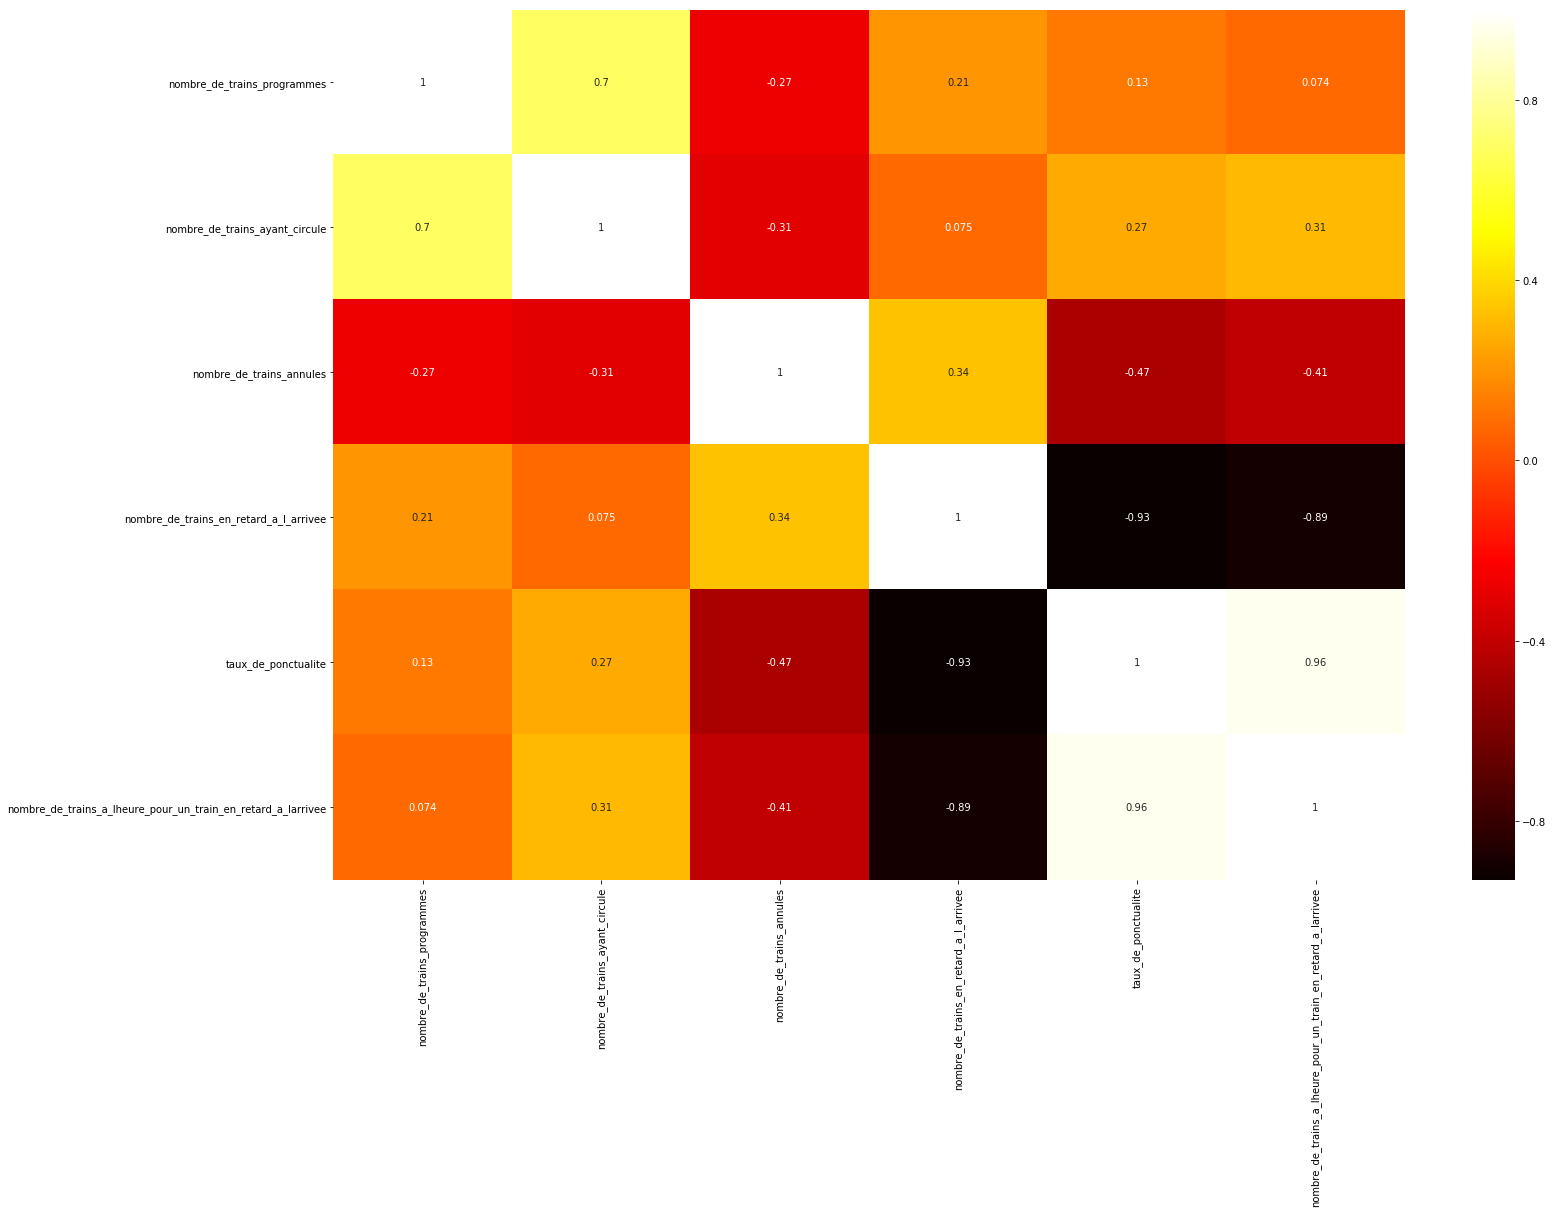

Covariance and correlation matrices for Haute Normandie
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.979343   
nombre_de_trains_annules                                              -0.158727   
nombre_de_trains_en_retard_a_l_arrivee                                 0.171496   
taux_de_ponctualite                                                    0.086810   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                     0.044911   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.979343   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                 -0.355092   
nombre_de_trains_e

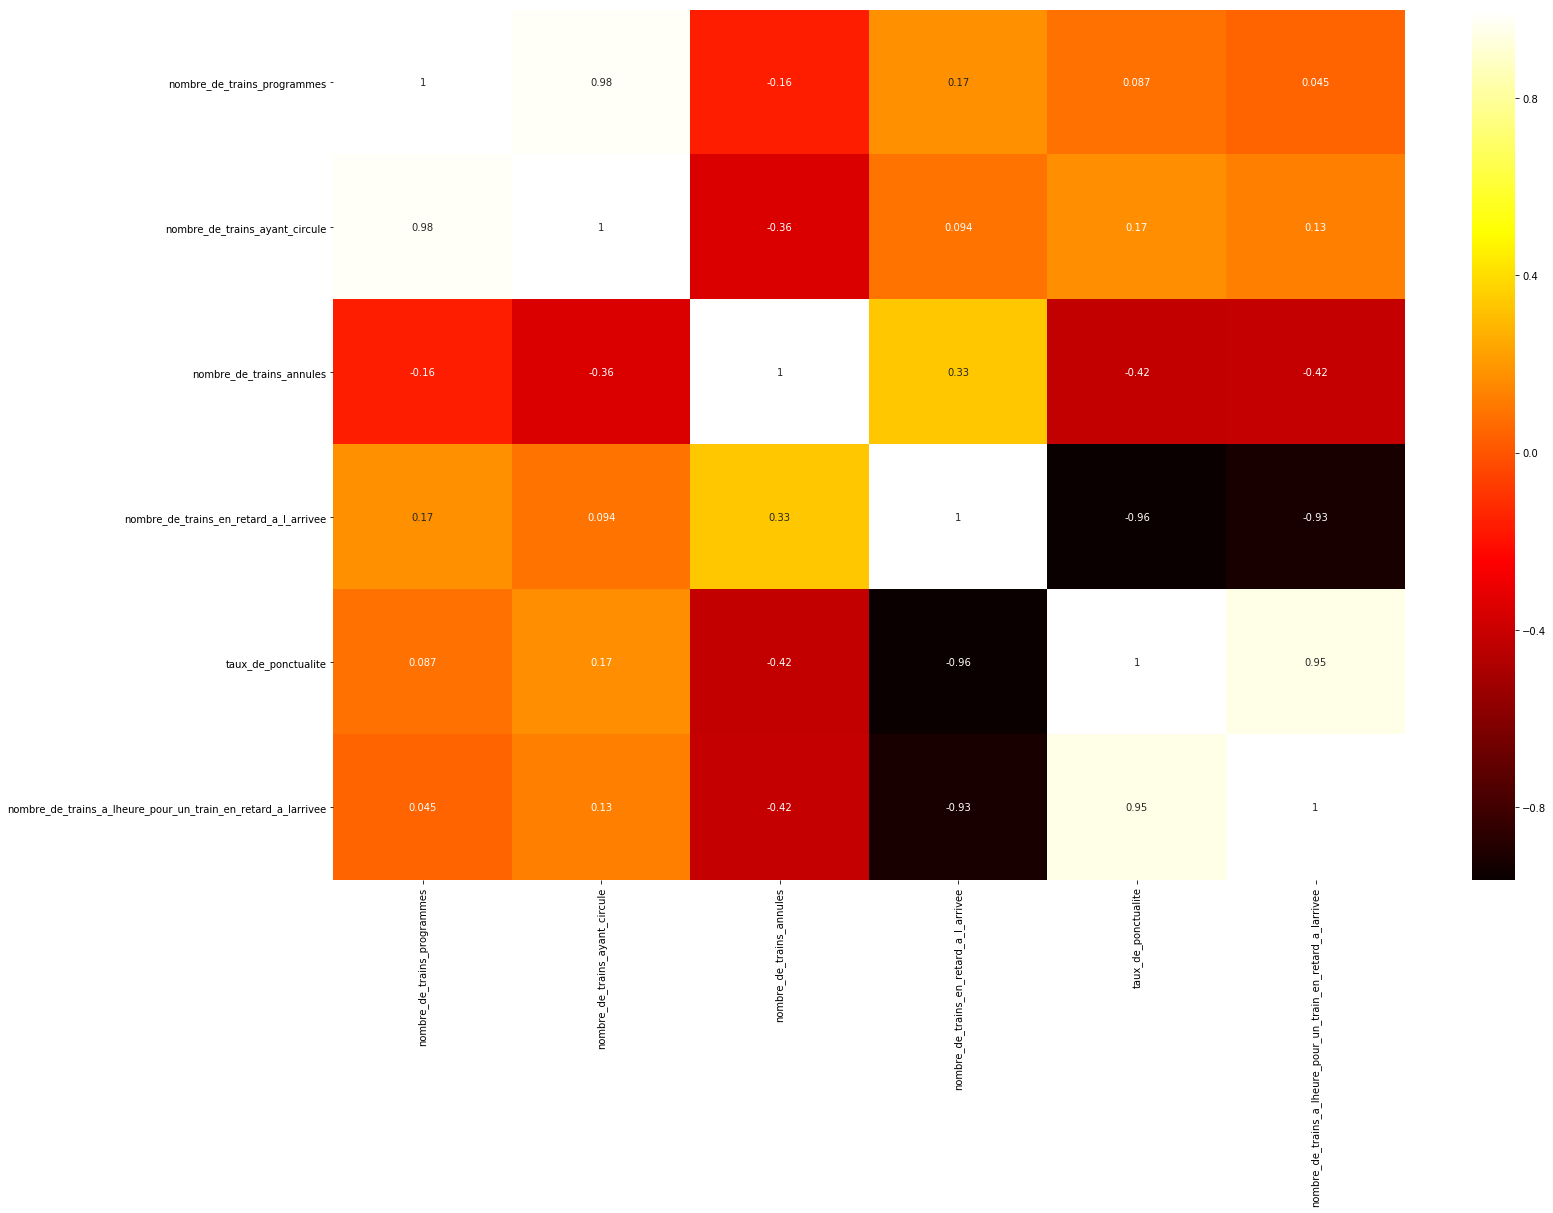

Covariance and correlation matrices for Languedoc Roussillon
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.972856   
nombre_de_trains_annules                                               0.037765   
nombre_de_trains_en_retard_a_l_arrivee                                 0.317465   
taux_de_ponctualite                                                    0.096394   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                     0.092917   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.972856   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                 -0.194507   
nombre_de_tra

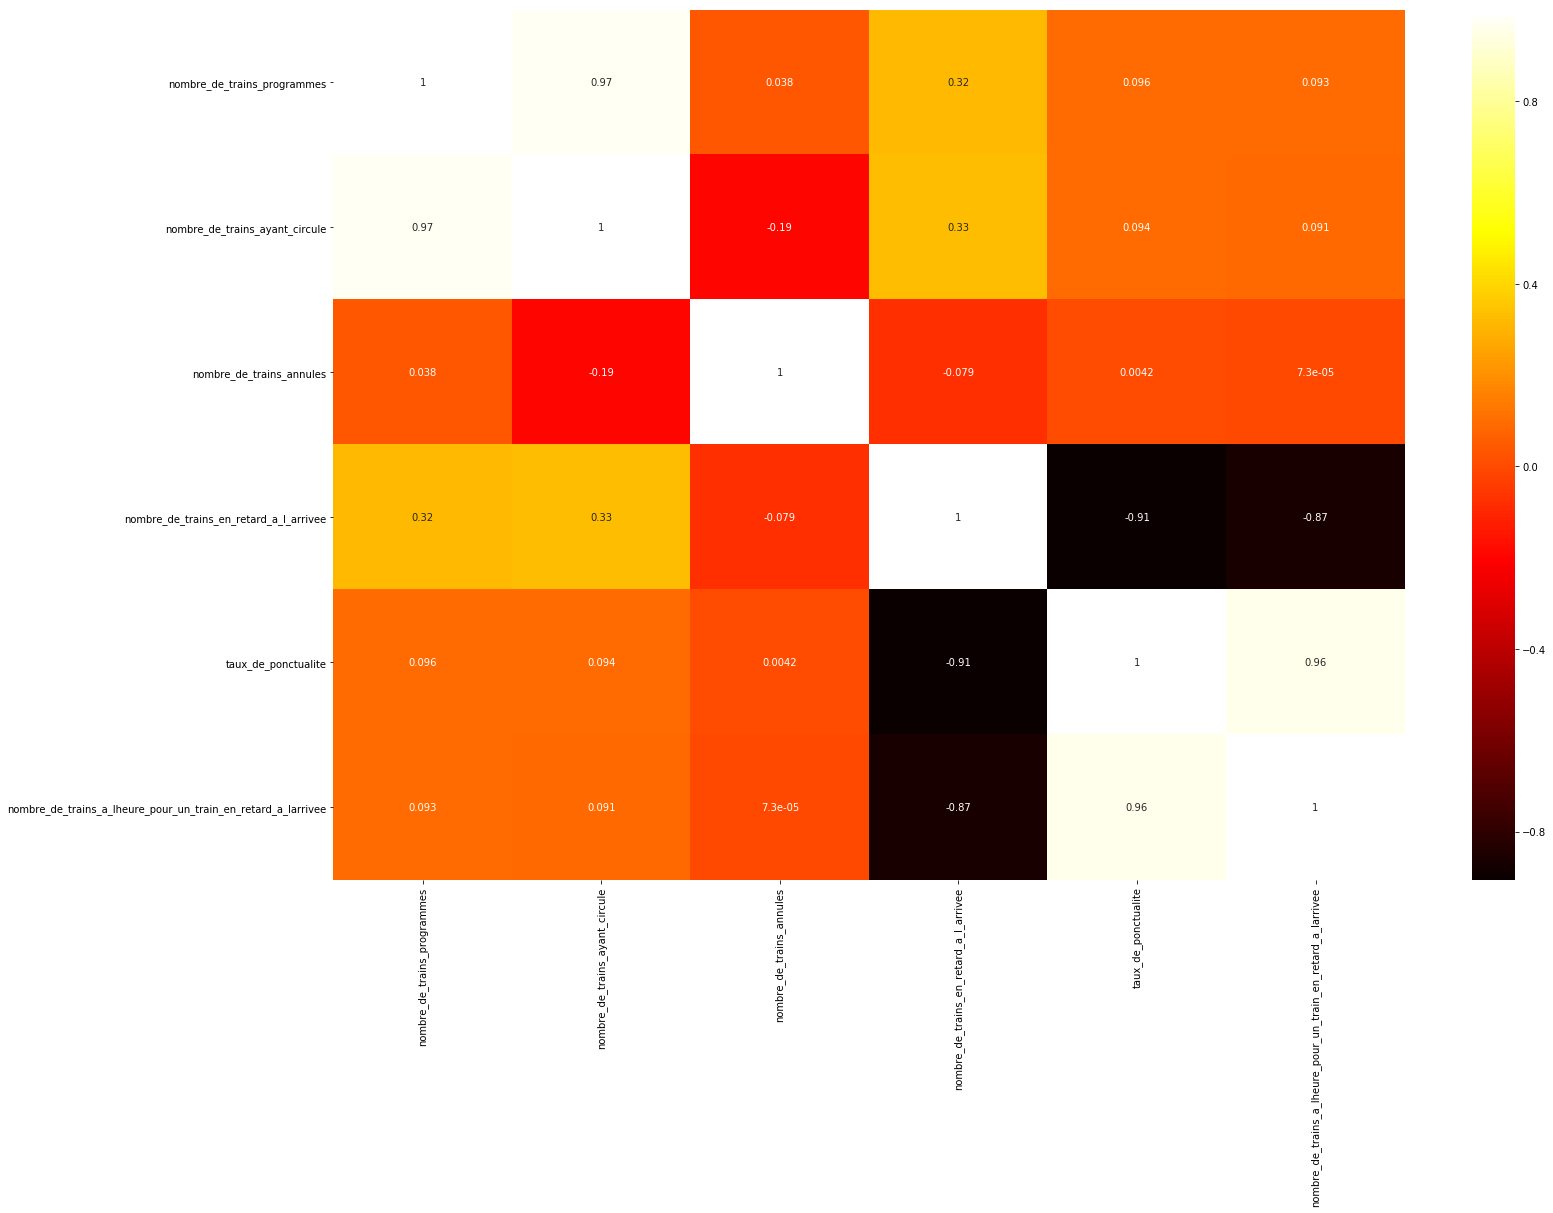

Covariance and correlation matrices for Limousin
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.912996   
nombre_de_trains_annules                                              -0.146494   
nombre_de_trains_en_retard_a_l_arrivee                                 0.158836   
taux_de_ponctualite                                                    0.052706   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                     0.030030   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.912996   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                 -0.537315   
nombre_de_trains_en_retar

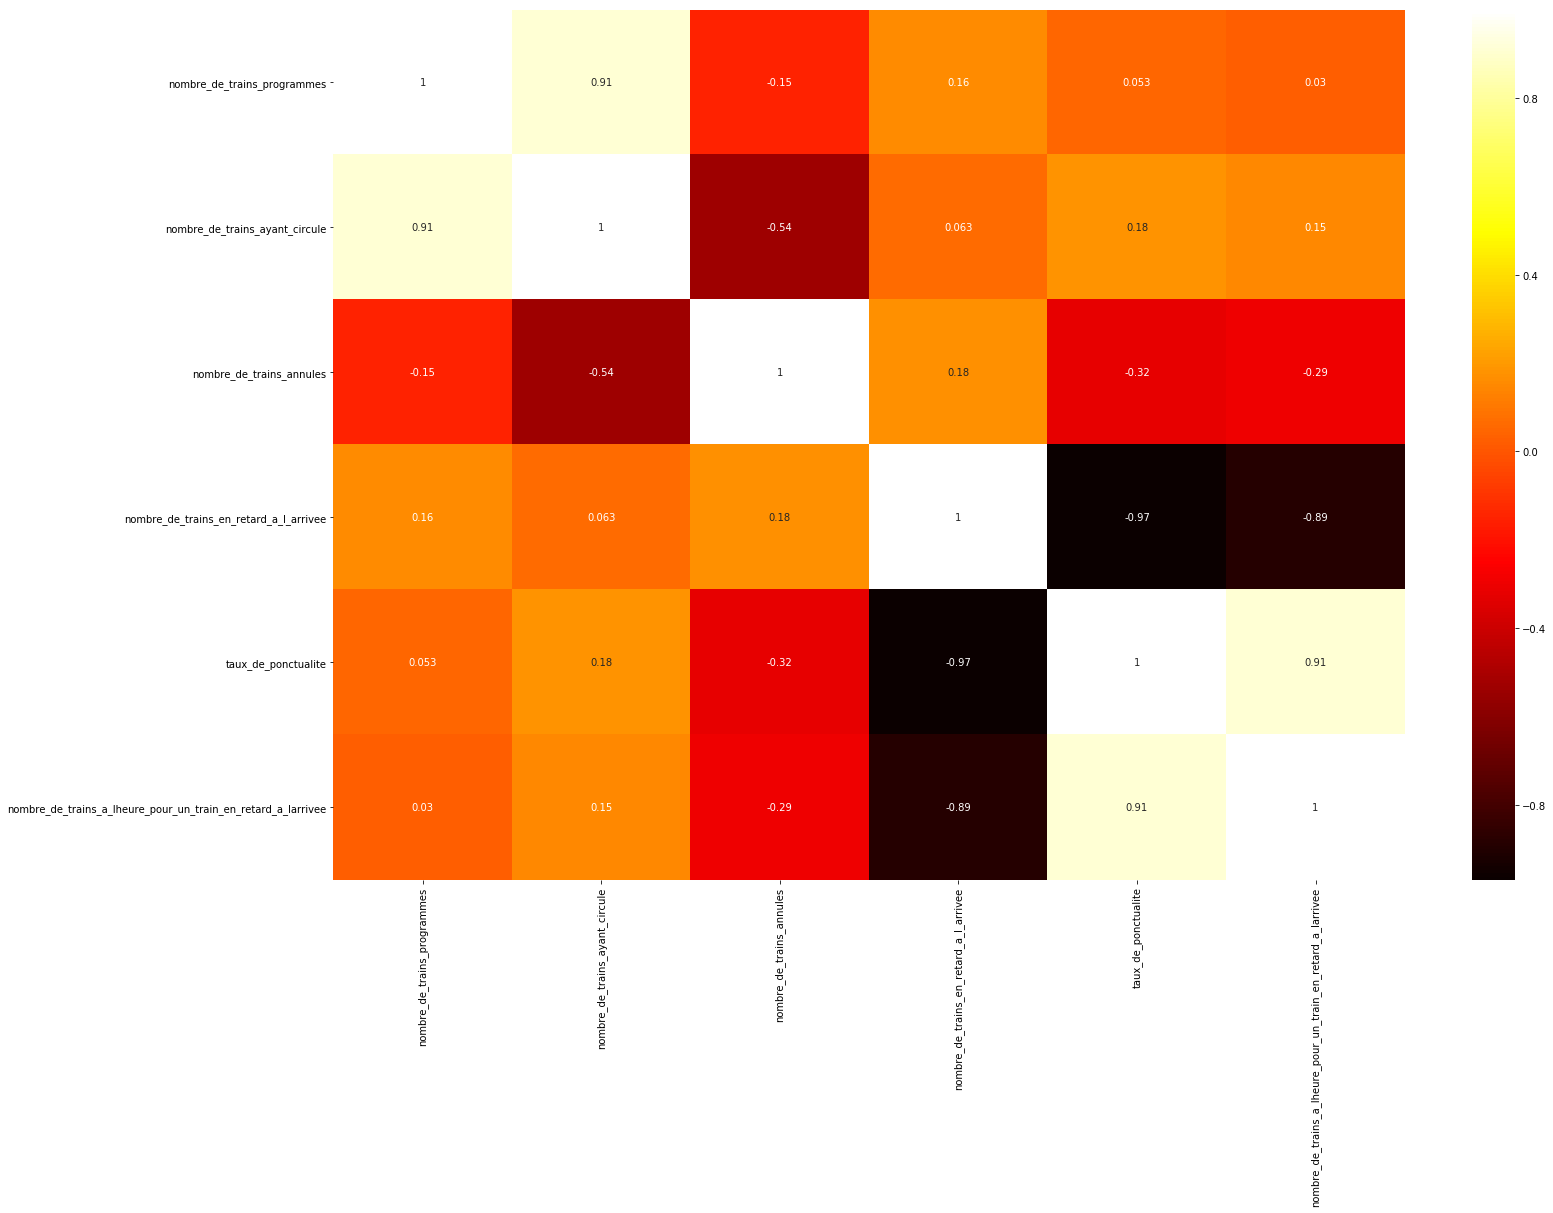

Covariance and correlation matrices for Lorraine
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.999925   
nombre_de_trains_annules                                               0.872518   
nombre_de_trains_en_retard_a_l_arrivee                                 0.978353   
taux_de_ponctualite                                                    0.989946   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                     0.961425   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.999925   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                  0.866484   
nombre_de_trains_en_retar

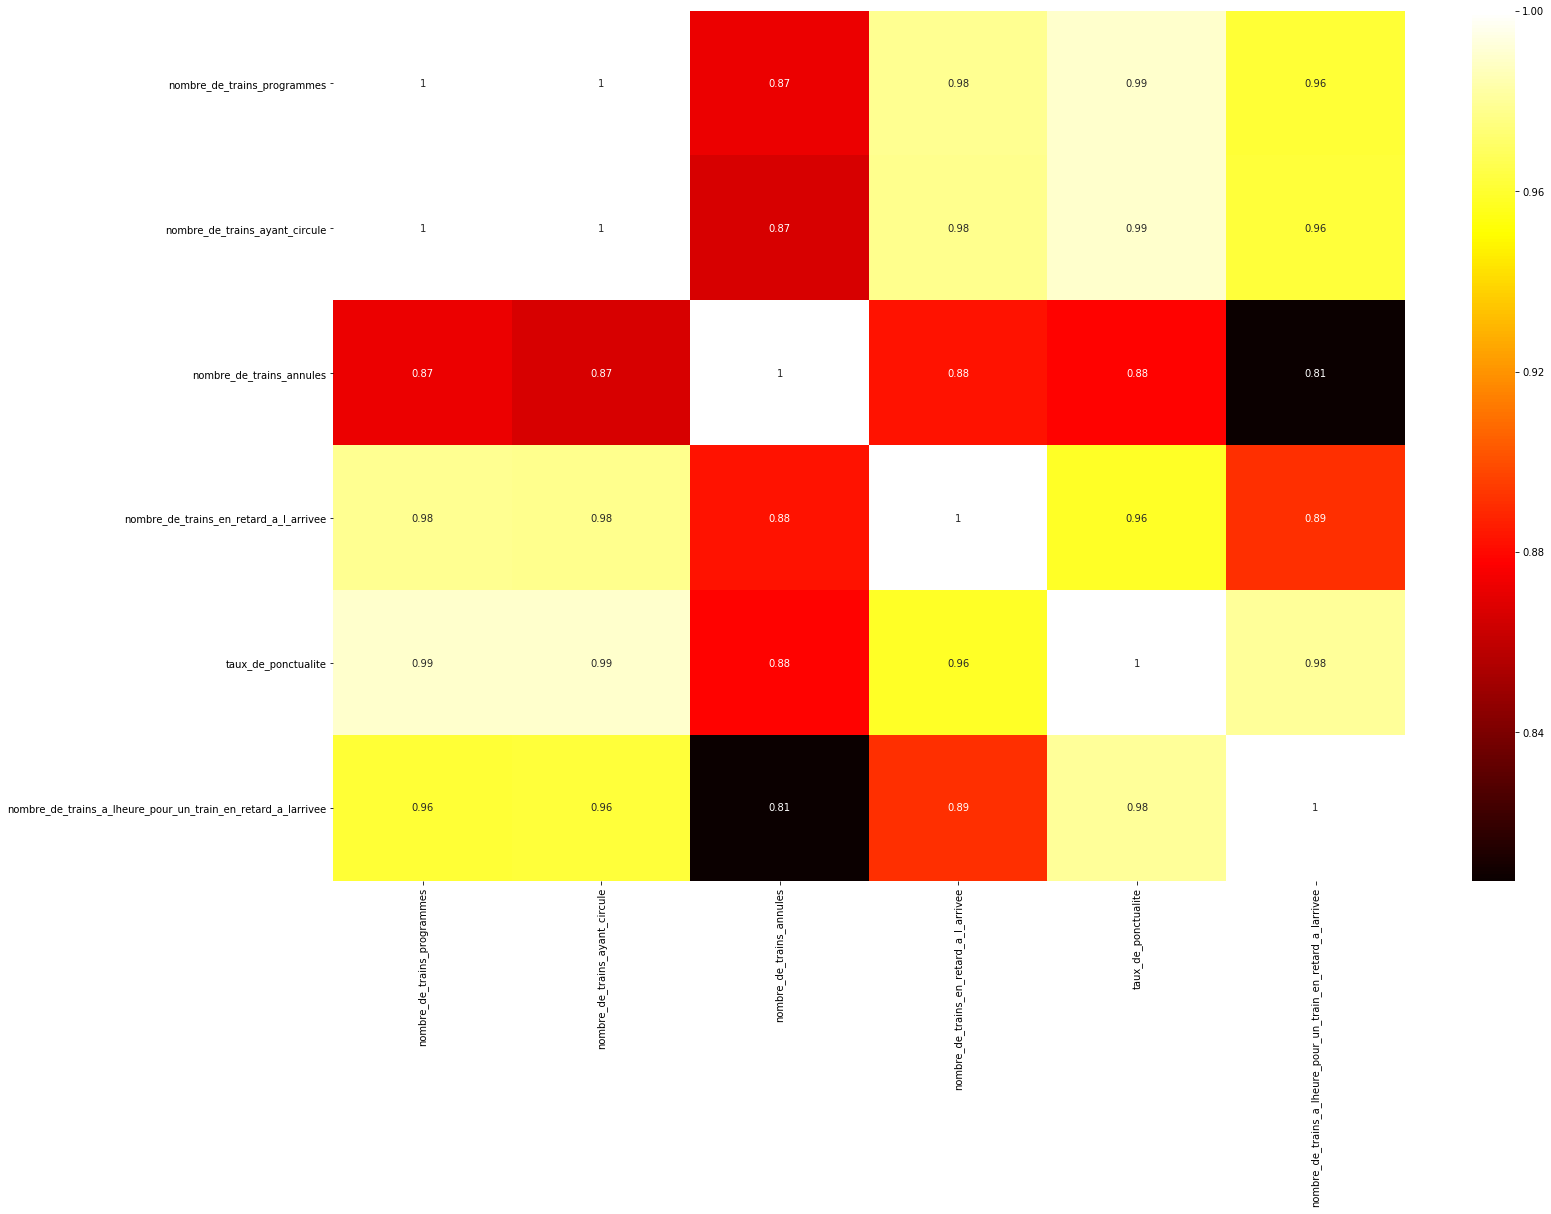

Covariance and correlation matrices for Occitanie
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.996669   
nombre_de_trains_annules                                               0.359899   
nombre_de_trains_en_retard_a_l_arrivee                                 0.075516   
taux_de_ponctualite                                                    0.073352   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                     0.071702   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.996669   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                  0.282616   
nombre_de_trains_en_reta

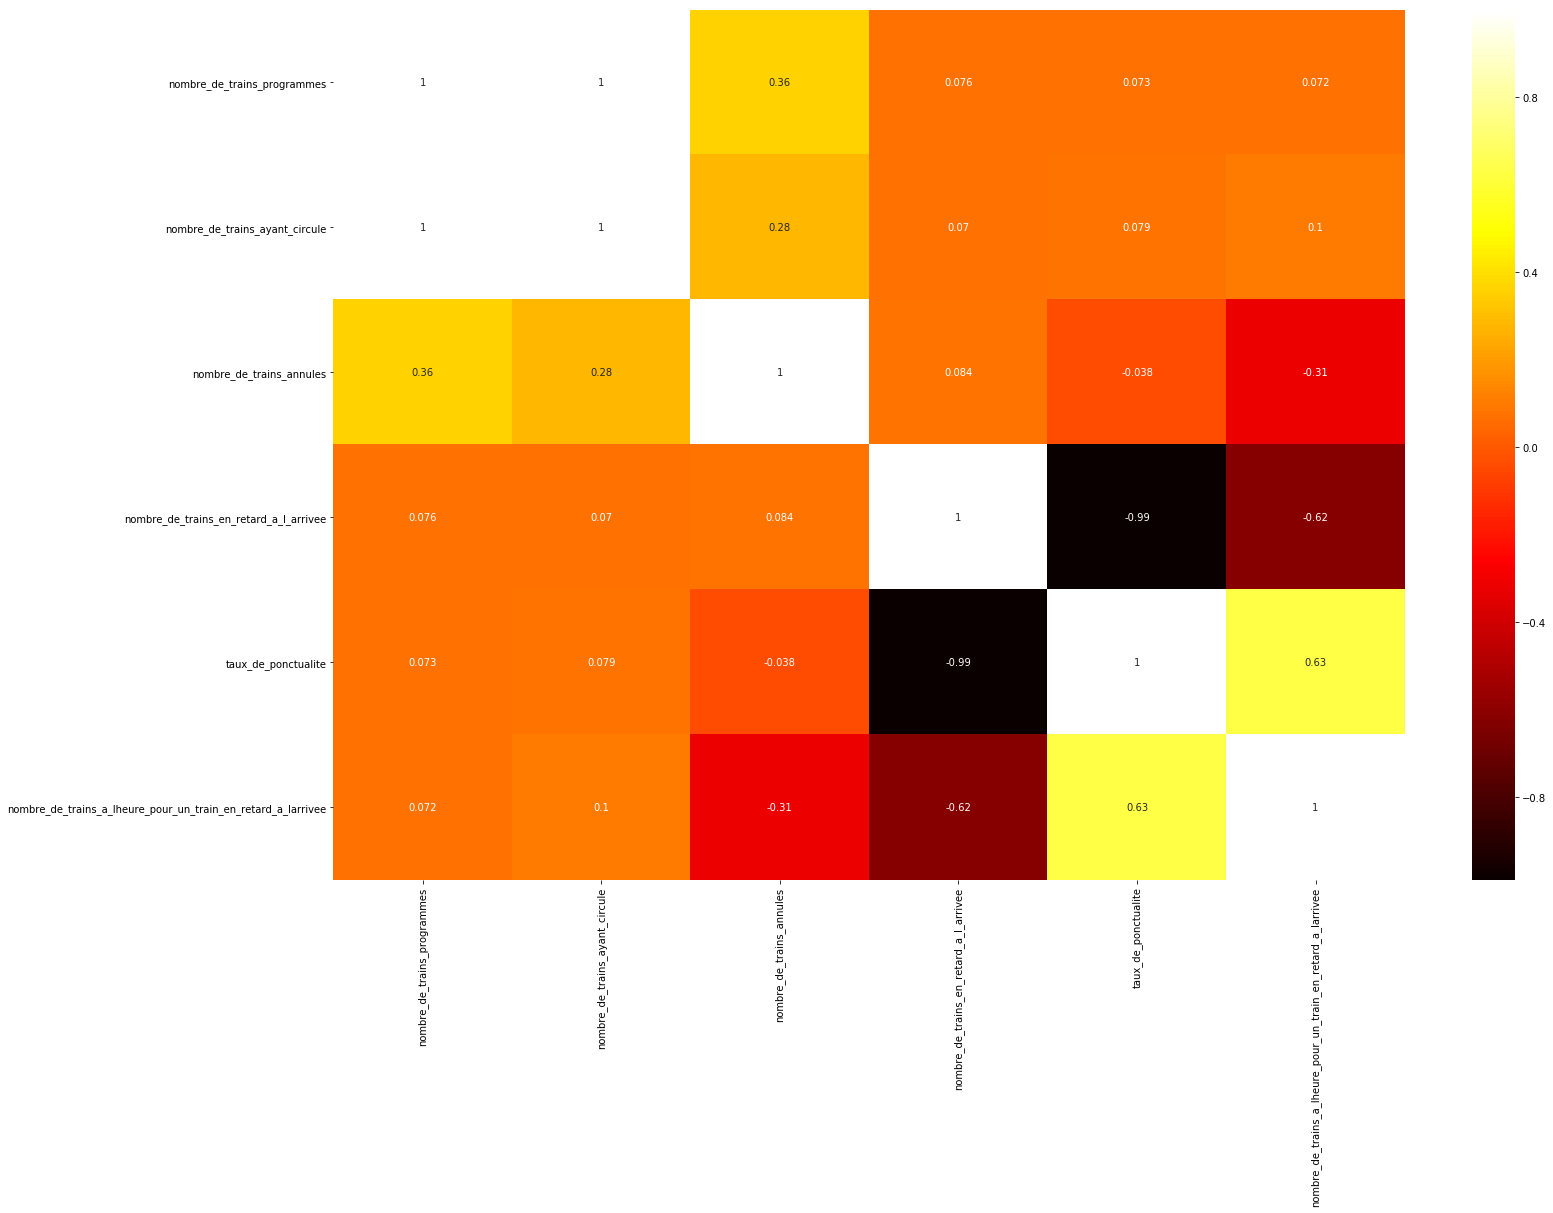

Covariance and correlation matrices for Hauts de France
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.999100   
nombre_de_trains_annules                                               0.522728   
nombre_de_trains_en_retard_a_l_arrivee                                 0.815741   
taux_de_ponctualite                                                    0.521201   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                     0.019484   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.999100   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                  0.489509   
nombre_de_trains_e

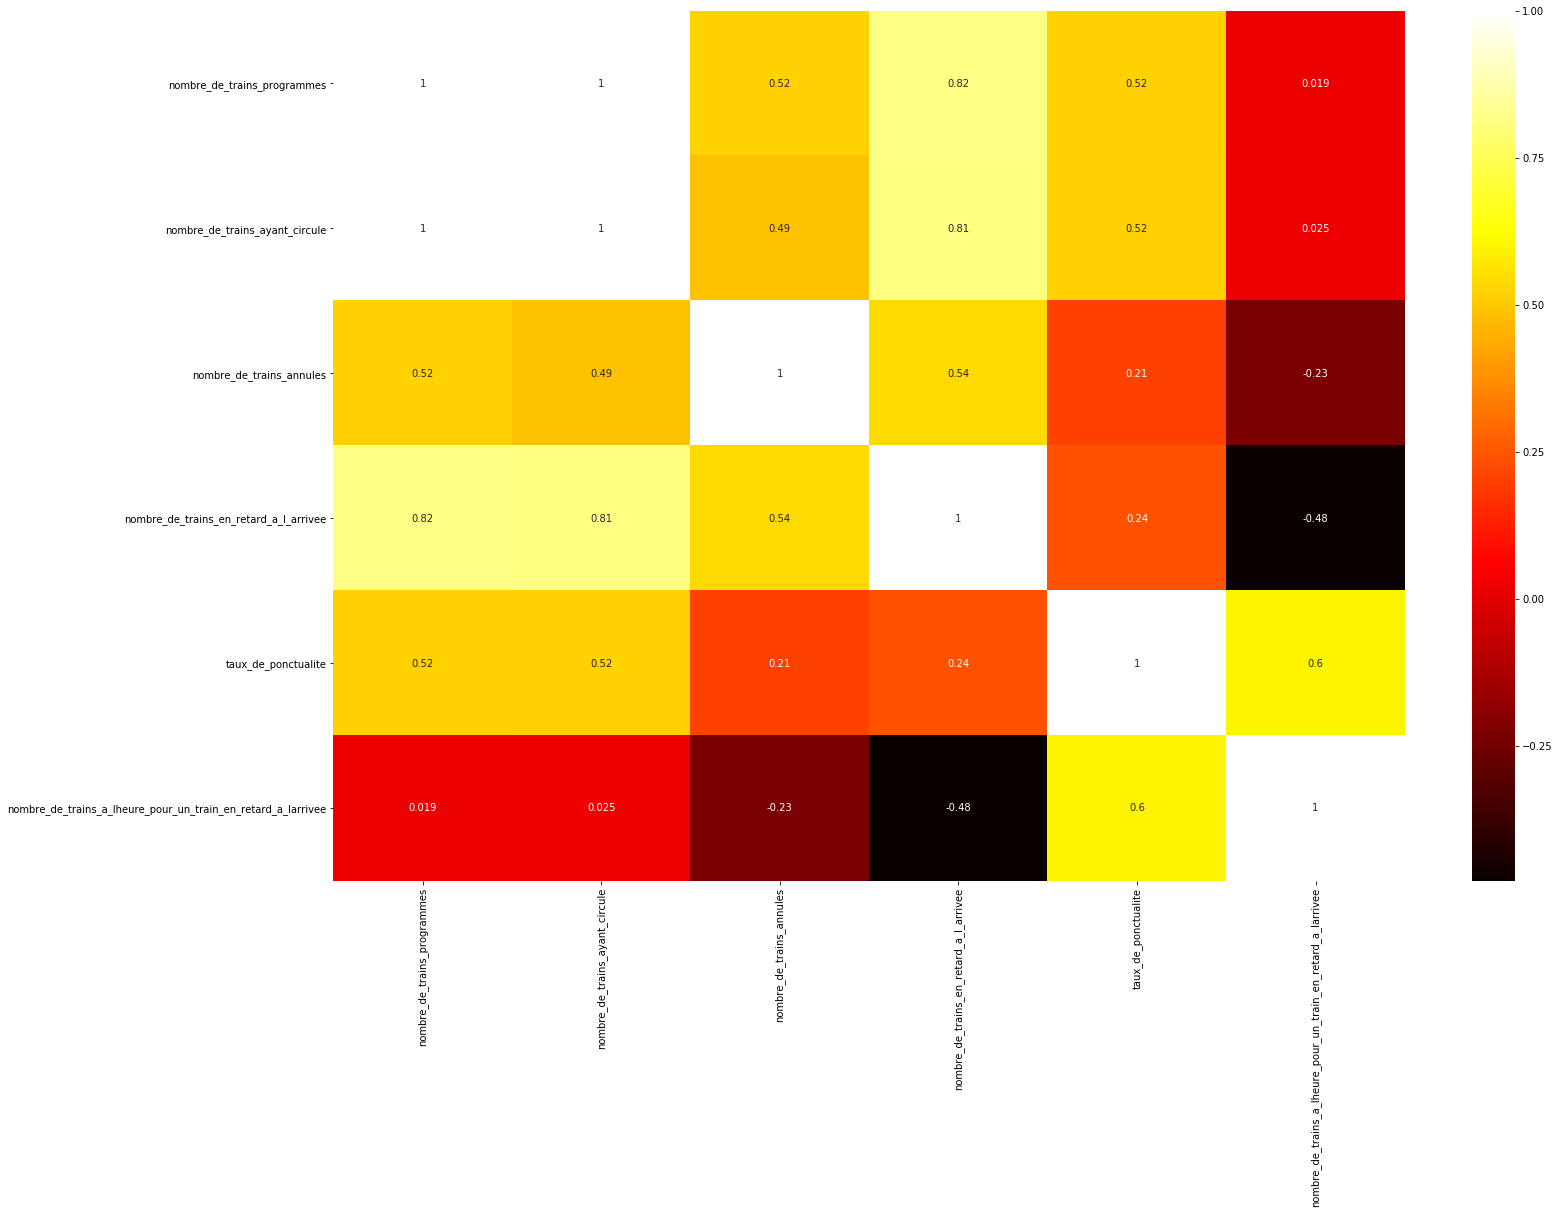

Covariance and correlation matrices for Pays de la Loire
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.994913   
nombre_de_trains_annules                                               0.166776   
nombre_de_trains_en_retard_a_l_arrivee                                 0.393180   
taux_de_ponctualite                                                    0.189958   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                     0.109093   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.994913   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                  0.066596   
nombre_de_trains_

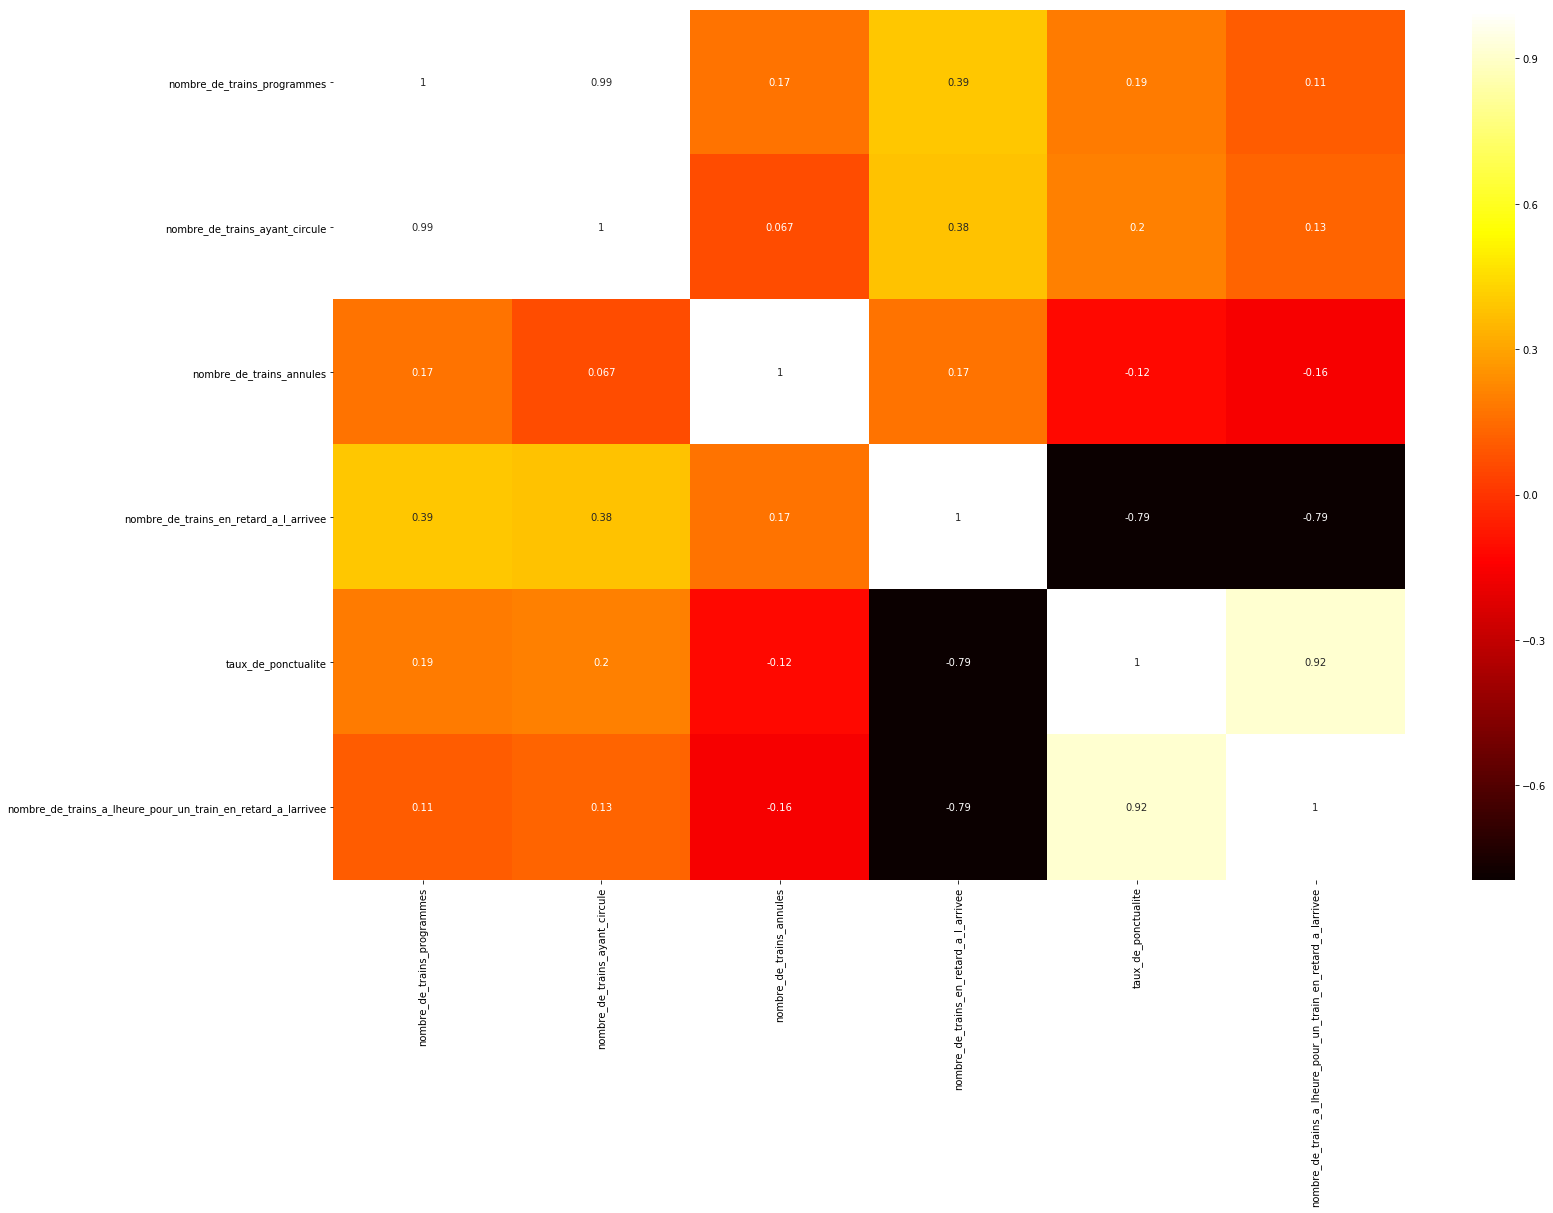

Covariance and correlation matrices for Picardie
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.995432   
nombre_de_trains_annules                                              -0.006111   
nombre_de_trains_en_retard_a_l_arrivee                                 0.256222   
taux_de_ponctualite                                                    0.081414   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                     0.060147   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.995432   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                 -0.101556   
nombre_de_trains_en_retar

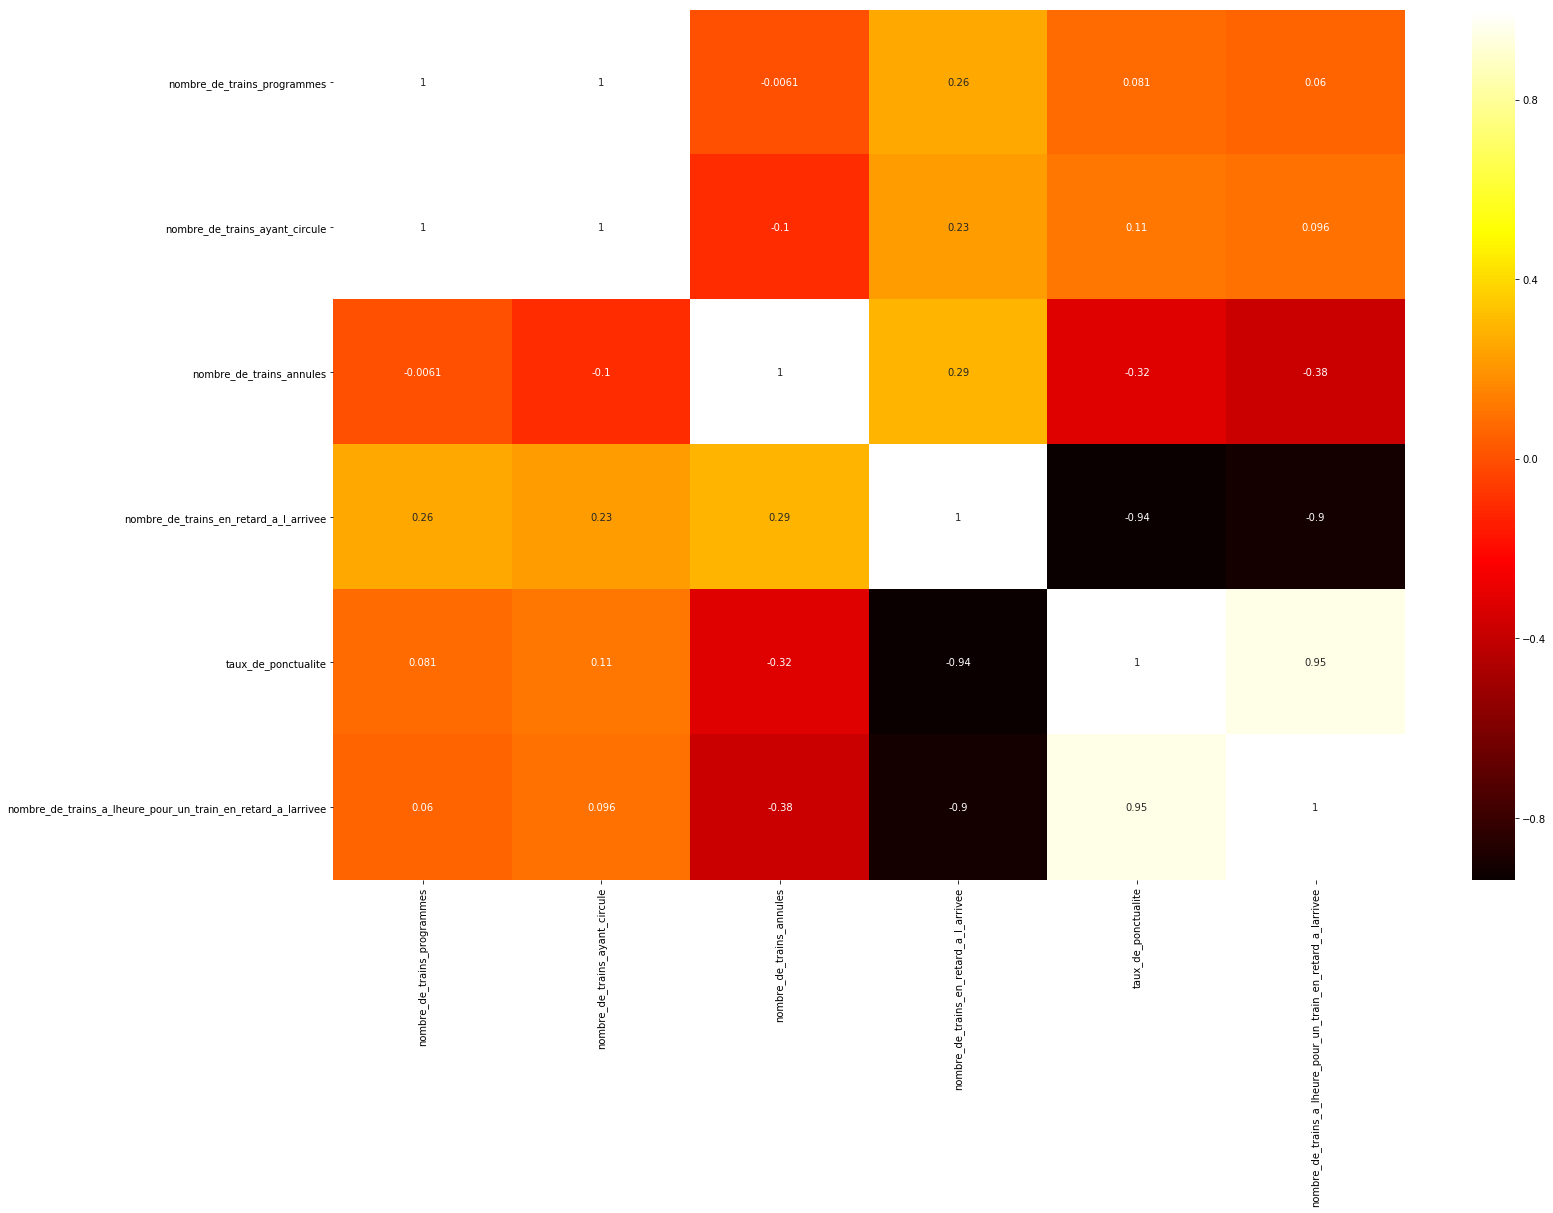

Covariance and correlation matrices for Poitou Charentes
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.988696   
nombre_de_trains_annules                                              -0.114548   
nombre_de_trains_en_retard_a_l_arrivee                                 0.193943   
taux_de_ponctualite                                                    0.035218   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                    -0.012480   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.988696   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                 -0.262199   
nombre_de_trains_

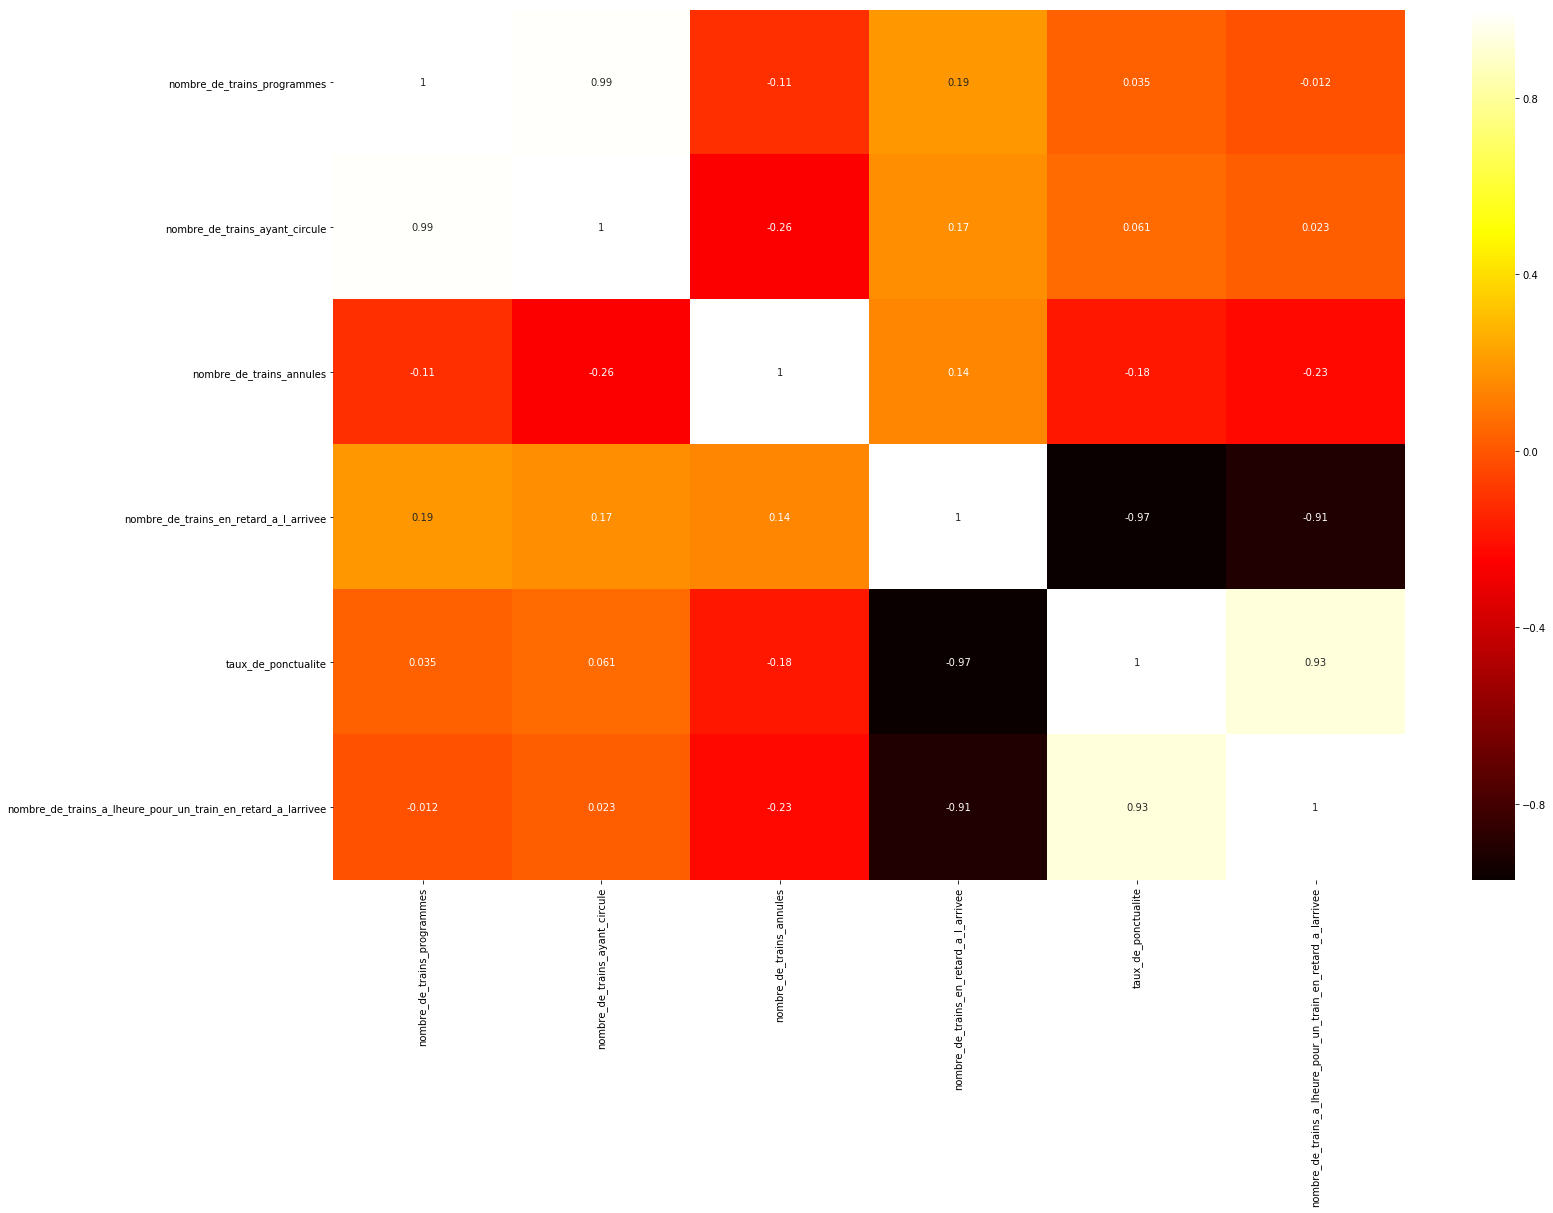

Covariance and correlation matrices for Provence Alpes Côte d'Azur
                                                    nombre_de_trains_programmes  \
nombre_de_trains_programmes                                            1.000000   
nombre_de_trains_ayant_circule                                         0.972571   
nombre_de_trains_annules                                               0.029286   
nombre_de_trains_en_retard_a_l_arrivee                                 0.535467   
taux_de_ponctualite                                                    0.045407   
nombre_de_trains_a_lheure_pour_un_train_en_reta...                     0.025496   

                                                    nombre_de_trains_ayant_circule  \
nombre_de_trains_programmes                                               0.972571   
nombre_de_trains_ayant_circule                                            1.000000   
nombre_de_trains_annules                                                 -0.204024   
nombre_

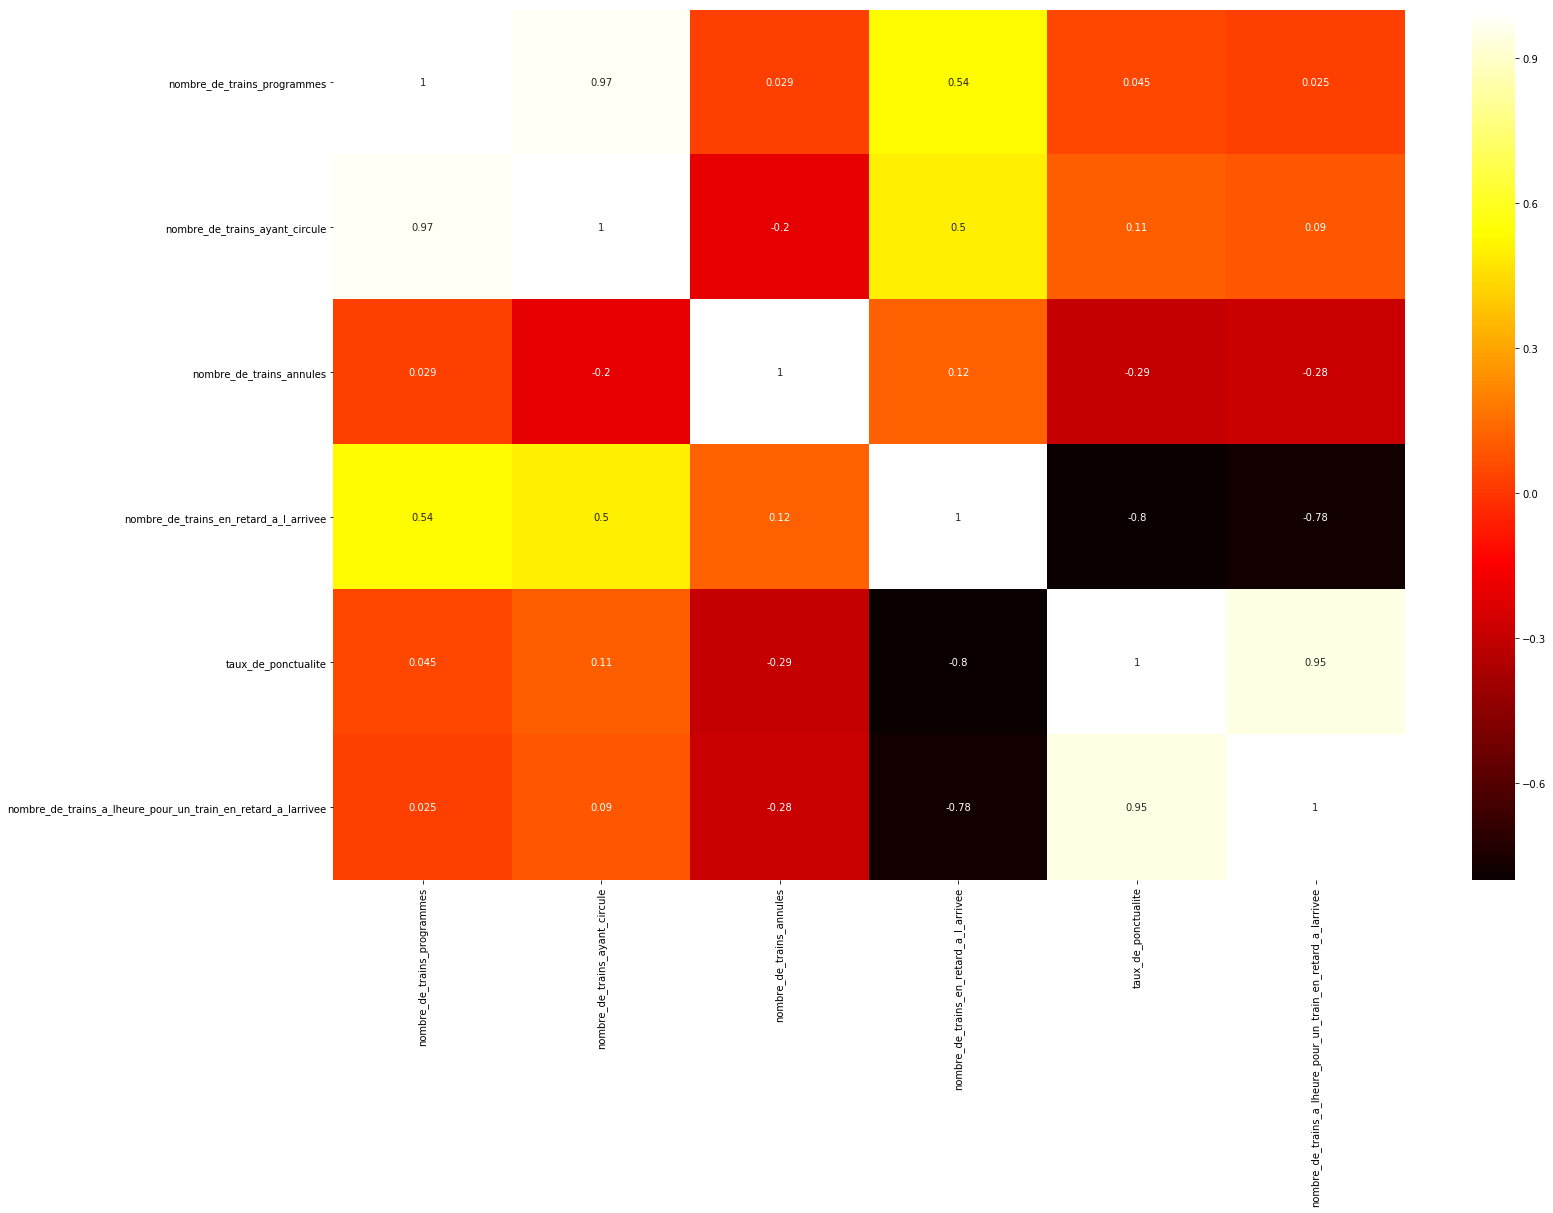

In [15]:
print("Covariance and correlation matrices for all regions")

m = test.sort_values(by='date')

m.cov()
cl = m.corr()
print(cl)
    
seaborn.heatmap(cl,annot=True, cmap='hot')
matplotlib.pyplot.show()

for i in range(1,20):
    # Create the id to sort and filter the data
    id = "TER_"+str(i)
    
    # Filter to keep only the data for the selected region, sorted by date
    m = test.loc[test.id == id].sort_values(by='date')
    
    print("Covariance and correlation matrices for "+m.region.all())
    m.cov()
    cl = m.corr()
    
    print(cl)
    
    seaborn.heatmap(cl,annot=True, cmap='hot')
    matplotlib.pyplot.show()



For all regions, we see that there are two groups representated : the number of trains scheduled, the number of trains that ran, the number of cancelled trains and the number of delayed trains have some mid-ranged correlation with each other, oscillating between 0.6 and 0.75; while the punctuality rate and the number of trains on time for one delayed train at arrival have a correlation of 0.5 only. Both groups don't have any strong positive correlation with each other, and they only tend to weak tendances (close to 0.2 at most), or negative values (some reach -0.36 at most). We observe the same tendency with each region analysis, but the values are really different depending on the region studied.

### 5. Data transformation
We need to select datapoints where the fields that interests us are not equal to 0 as they usually indicates the absence of revelant data. This means that we are basically going to exclude all reported months where there was no data from our model to avoid any problem.<br>
<br>
We also reshape our data to have less difficulties during the supervised learning.

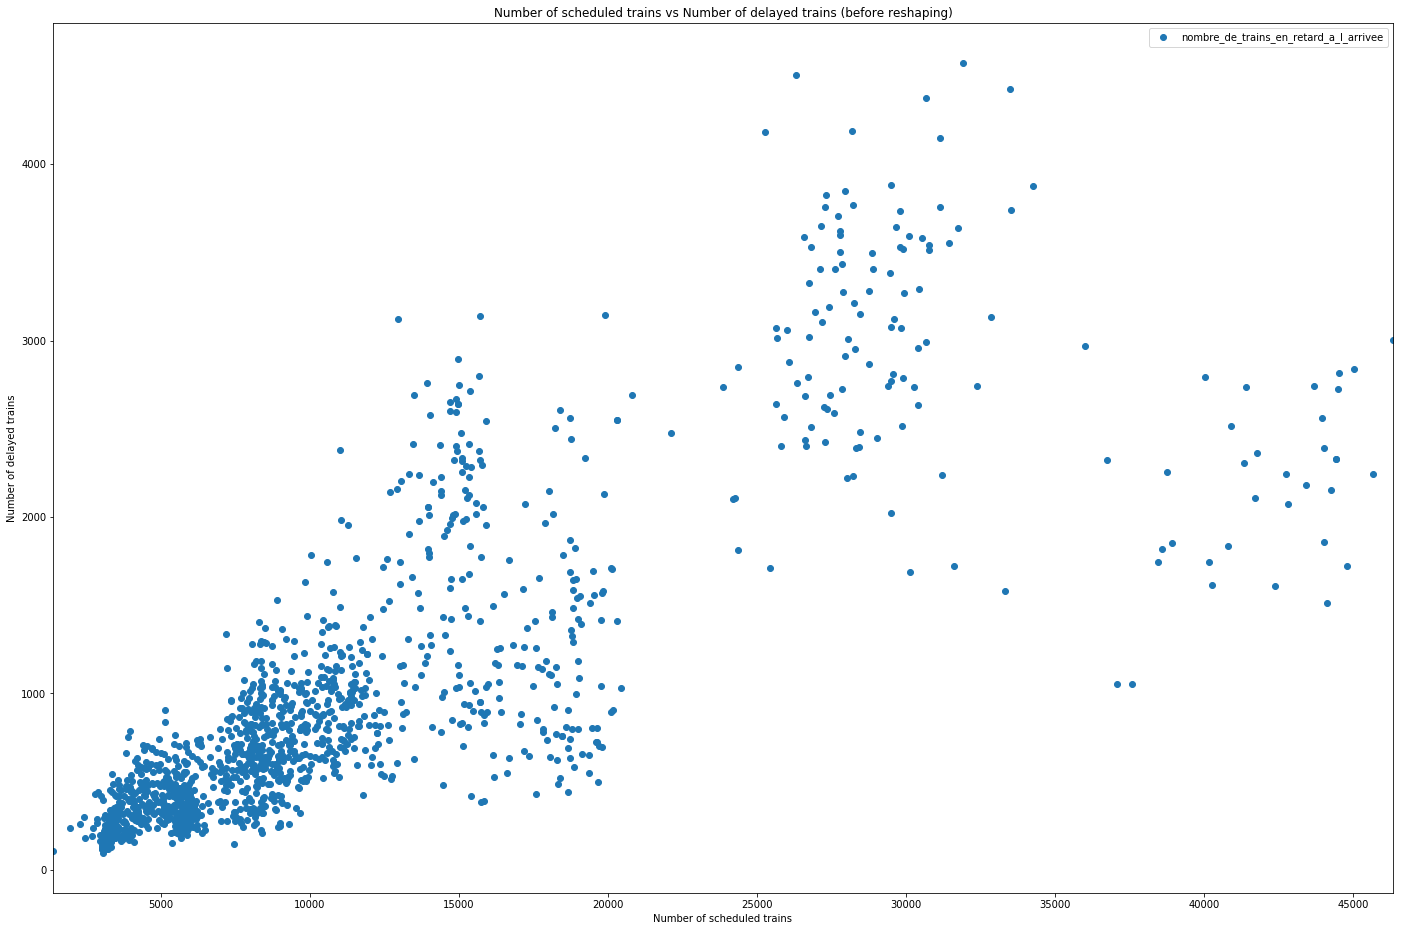

In [16]:
ah = test.loc[test.taux_de_ponctualite > 0].sort_values(by='date')
test.describe()
ah.plot(x='nombre_de_trains_programmes', y='nombre_de_trains_en_retard_a_l_arrivee', style='o')  
matplotlib.pyplot.title('Number of scheduled trains vs Number of delayed trains (before reshaping)')  
matplotlib.pyplot.xlabel('Number of scheduled trains')  
matplotlib.pyplot.ylabel('Number of delayed trains')  
matplotlib.pyplot.show()

X = ah['nombre_de_trains_programmes'].values.reshape(-1,1)
y = ah['nombre_de_trains_en_retard_a_l_arrivee'].values.reshape(-1,1)

### 6. Clustering and/or PCA (Unsupervised learning)
Apply a clustering (e.g. k-means, hierarchical, ...) or PCA algorithm to your dataset. <br><br> 

<font color=darkred> NOTE: This step can be skipped in case you have a dataset that is suitable for supervised learning! </font>

<br>
(Note: If you have a dataset that is suitable for supervised learning but you still want to perform unsupervised learning: <br> In that case, the dependent variable (class attribute to predict) should be excluded from the data for clustering. <br>
For example, for the iris dataset we would exclude the attribute "species" to see if clustering only based <br> on the independent variables (i.e. petal and sepal lengths/widths) allows partitioning of the data into <br> groups that relate to the plant species)<br>
<br>
For the unsupervised learning part, we try to apply the k-means clustering to our dataset in order to determine main groups among some of our fields.<br>
Here, we try to predict how many trains are going to be cancelled in average by selecting the group that corresponds the most to our number of scheduled trains.<br>
<br>
In order to have an optimal clustering, we first use the elbow method to select a value of k with a low error rate.

Text(0, 0.5, 'SSE')

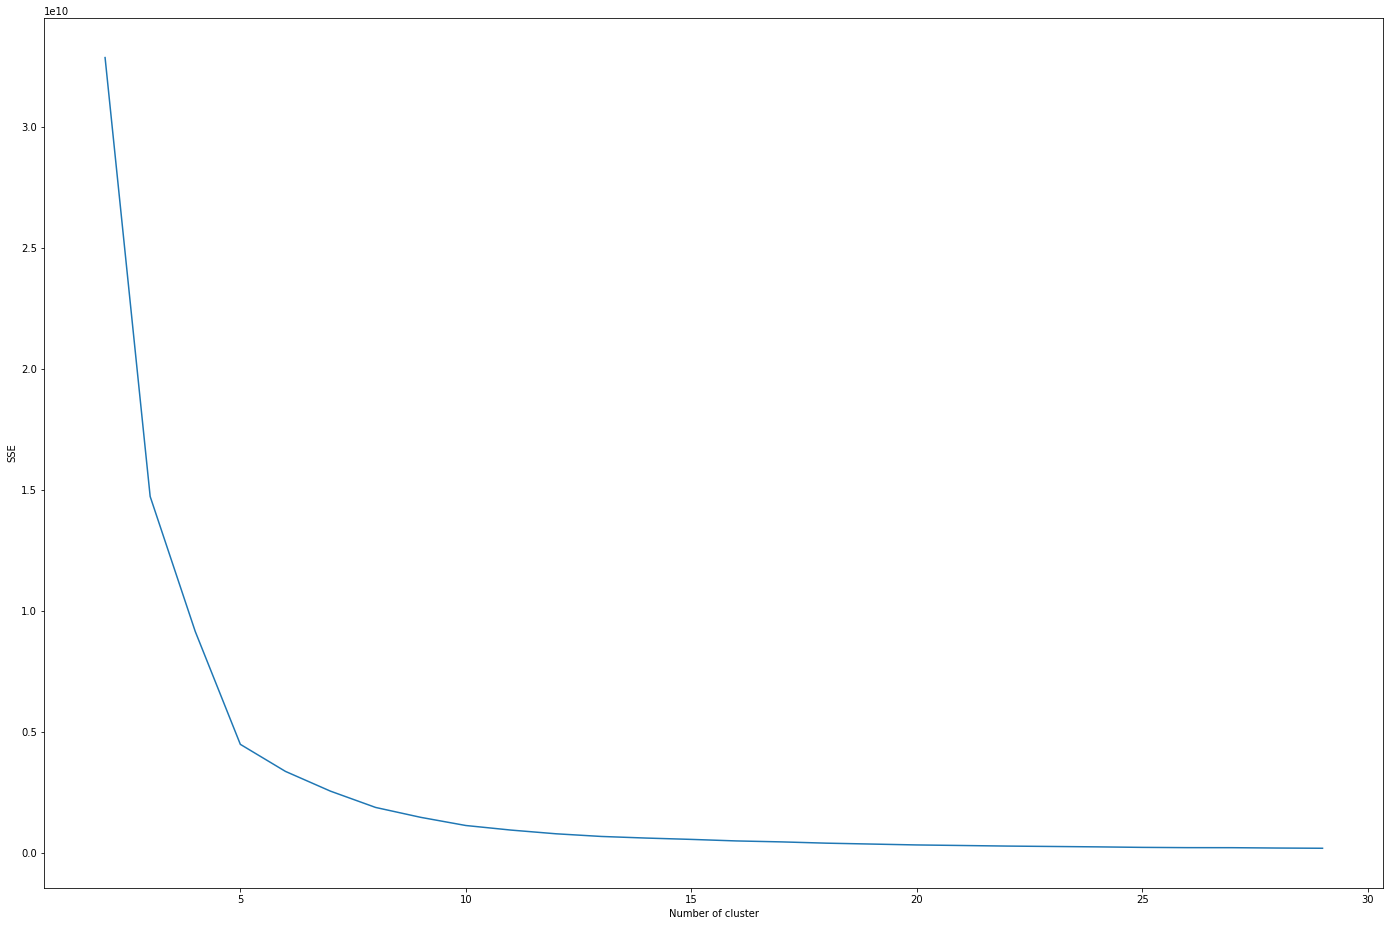

In [17]:
df = pd.DataFrame( test.sort_values(by='date'),columns=['nombre_de_trains_programmes','nombre_de_trains_annules'])

ssedata = {}
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k).fit(df)
    centroids = kmeans.cluster_centers_
    ssedata[k] = kmeans.inertia_ 

matplotlib.pyplot.figure()
matplotlib.pyplot.plot(list(ssedata.keys()), list(ssedata.values()))
matplotlib.pyplot.xlabel("Number of cluster")
matplotlib.pyplot.ylabel("SSE")

With this method, we then know that we should select a number of clusters that is superior than 15, because they generate less errors than any number of cluster inferior to this minimal limit. Once we got the good number of cluster, we can compute the k-means graph. Here, we will try with 15.

[[1.09945362e+04 2.06173913e+02]
 [3.07472000e+04 6.10325000e+02]
 [3.68484681e+03 8.71829787e+01]
 [1.76981064e+04 2.70191489e+02]
 [3.94523529e+04 8.00470588e+02]
 [9.26591195e+03 1.81283019e+02]
 [5.63212741e+03 9.74247104e+01]
 [1.52798454e+04 4.79608247e+02]
 [2.53238125e+04 4.18875000e+02]
 [4.41808889e+04 8.61500000e+02]
 [2.76840000e+04 4.77553191e+02]
 [7.92537168e+03 1.40588496e+02]
 [1.93819310e+04 3.64310345e+02]
 [1.30914179e+04 4.03328358e+02]
 [3.65789474e+01 7.89473684e-01]]


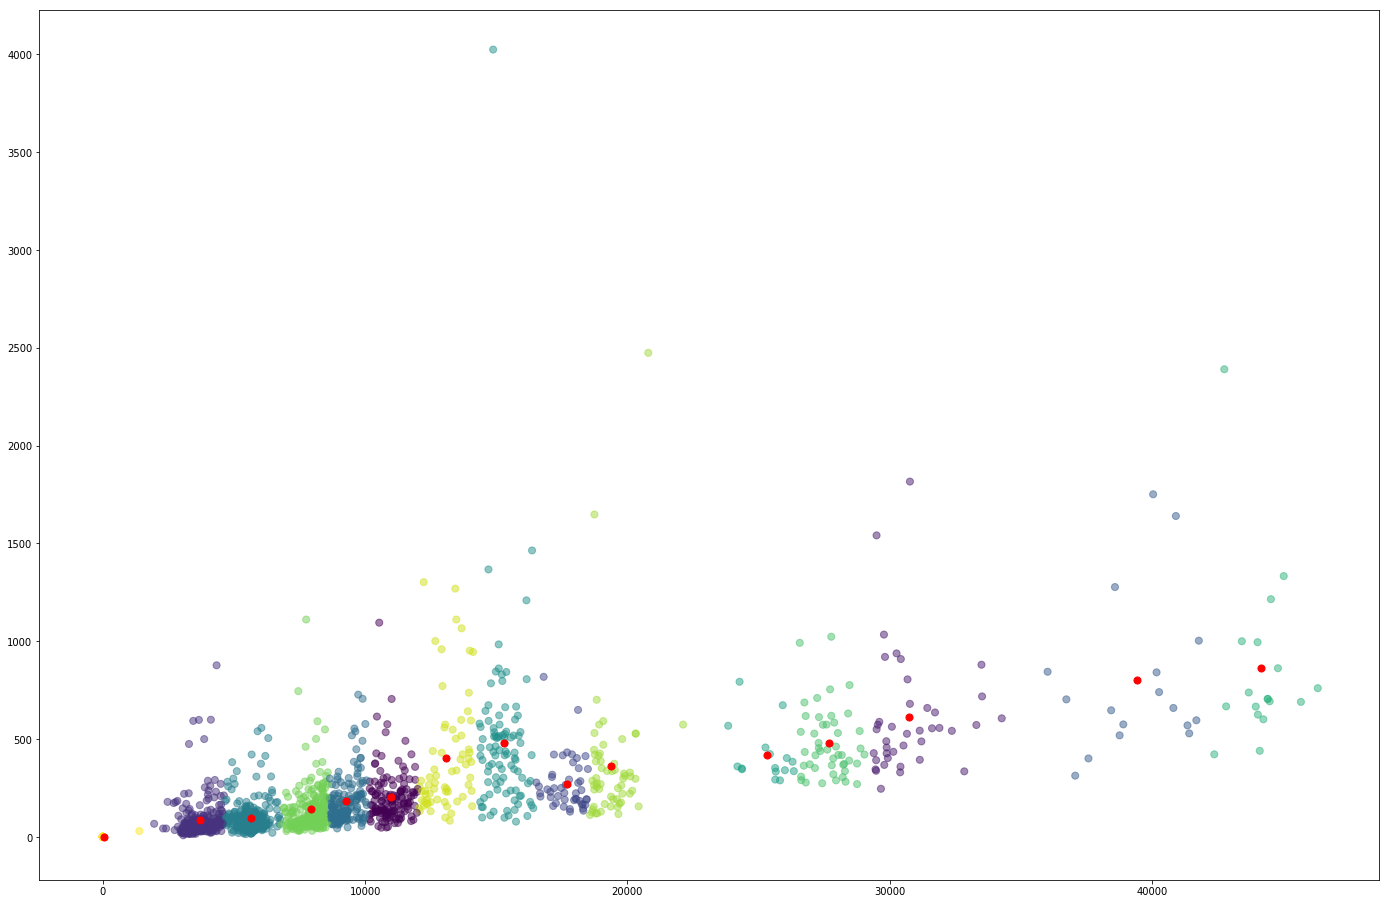

In [18]:
kmeans = KMeans(n_clusters=15).fit(df)

centroids = kmeans.cluster_centers_
print(centroids)

matplotlib.pyplot.scatter(df['nombre_de_trains_programmes'], df['nombre_de_trains_annules'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
matplotlib.pyplot.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

According to our final results, if we decide in the future to schedule 9259 trains for a month, there is a probability that there will be 177 trains that will be cancelled on average. Since the data is sprayed, this is not the most reliable estimation available, but it helps us predict global, average outcomes that can help us to verify if the situation for the month currently tested was considerated as normal (within the predictions) or not.

### 7. Building prediction models (supervised learning)
Depending on your dataset, there is an attribute (which can be categorical (classification task) or numeric (regression task)) that we would like to be able to predict. <br><br>
(For example, for the iris dataset we had the attribute "species". Using the independent attributes of <br> sepal and petal lengths and widths, the goal would be to build a prediction model that allows us to predict <br> the plant species of new incoming plant data.) <br><br>
Tasks:
1. Determine which class attribute you want to predict. Then, split your data into training and test set
2. Use one or more machine learning method(s) to build models based on the training data. <br>
3. Validate your models by predicting your test data. <br>
4. Assess your model performances using different metrics (e.g. accuracy, recall, ...). 
5. Optional: Attempt to improve the machine learning process (and thus prediction performance(s)) by implementing feature selection and/or parameter search (for the machine learning algorithm) steps. 
<br><br>
Since the dataset doesn't have a category attribute, we will do a basic linear regression task first, and then try a random forest regression to try multiple models and see which one is the best.<br>
We want to predict the number of trains that are likely going to be delayed depending on the punctuality rate.<br>

We then create our train and test shapes, apply the linear regression wth the train set, and test it to see if it fits.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)

wow = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
wow

Training Features Shape: (996, 1)
Training Labels Shape: (996, 1)
Testing Features Shape: (427, 1)
Testing Labels Shape: (427, 1)
[41.29517057]
[[0.08272399]]


Actual    Predicted
0       545   715.578397
1       185   290.542546
2      1078  1031.418583
3      1088  1614.788147
4       956   649.647378
5       797   977.730715
6       393  1351.146797
7       327   656.596193
8      3580  2566.941249
9      1186  1612.058255
10      635   389.563160
11      378   587.025320
12      937  1311.356559
13      521  1563.168378
14      639   711.855817
15      663   455.494179
16      806   662.304149
17      740   720.045492
18      311   323.053074
19      220   297.574085
20      240   203.020567
21     1693  1654.330213
22     3162  2271.285716
23      292   405.777062
24      533  1075.345021
25     1278   728.731511
26      334   412.891325
27      486   404.039858
28      500   397.918283
29      799  1612.306427
..      ...          ...
397     265   458.306794
398     225   575.940305
399     581   567.750630
400     359   487.094742
401     236   513.318246
402     790   639.968672
403    1552  1619.668862
404     740   981.618742
405    1419   903.775470
406    1478  1072.449681
407     597   392.541224
408     274   349.855646
409     322   737.996598
410    2743  3656.085275
411     334   392.541224
412    2322  1340.061783
413     396   506.783051
414    1109   741.884625
415     367   515.303622
416     383   689.520341
417    2542  1358.591956
418     336   554.597516
419     444   317.924187
420     521   541.361678
421     298   663.379561
422     841  1003.788771
423     385  1344.446154
424     883  1125.641206
425    2548  1722.081159
426     767   748.171648

[427 rows x 2 columns]

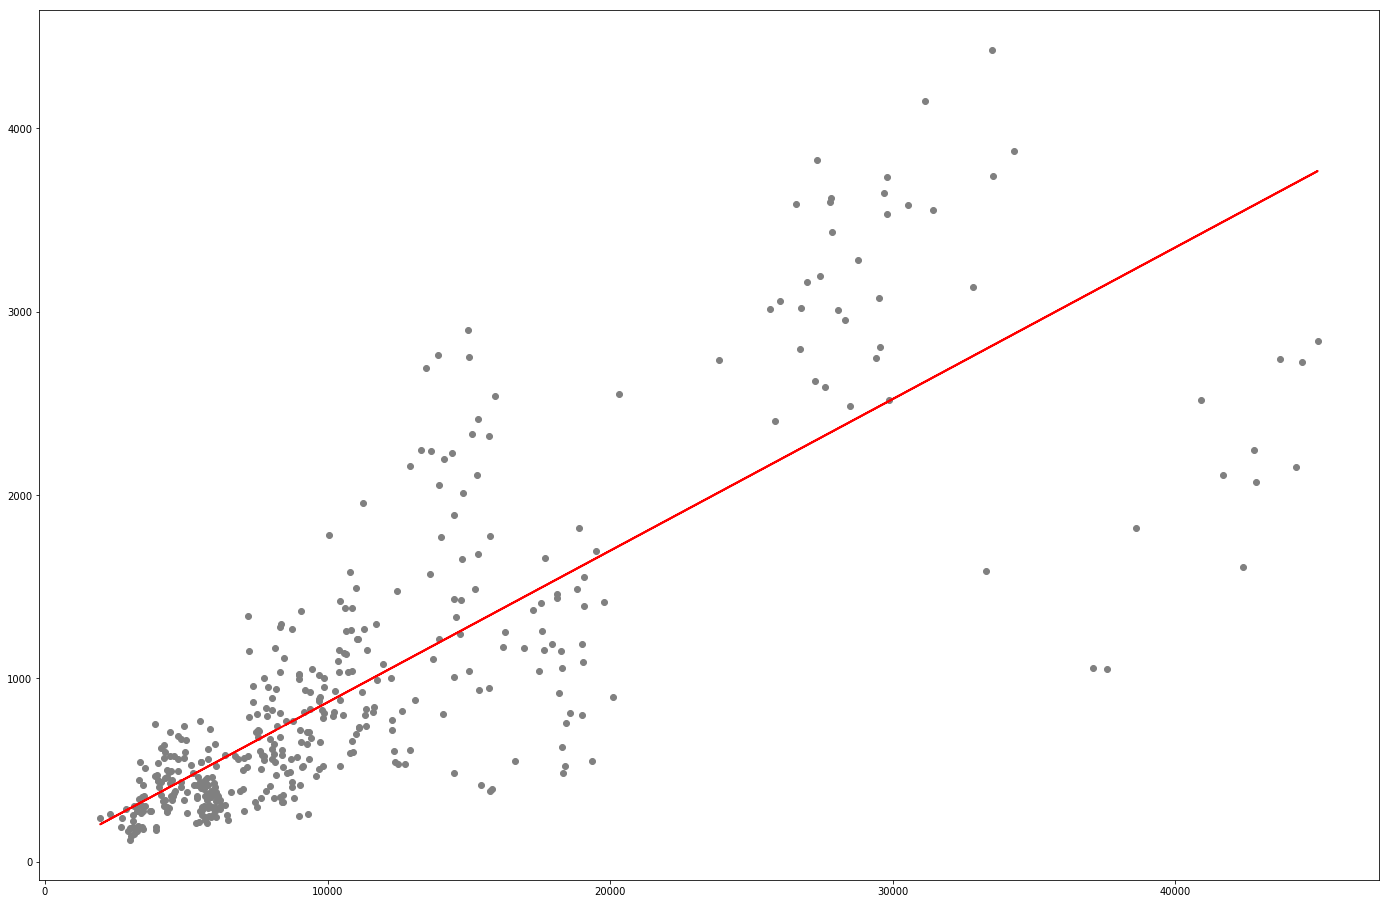

Mean Absolute Error: 340.2254091000616
Mean Squared Error: 259611.72720724894
Root Mean Squared Error: 509.5210763130893


In [20]:
matplotlib.pyplot.scatter(X_test, y_test,  color='gray')
matplotlib.pyplot.plot(X_test, y_pred, color='red', linewidth=2)
matplotlib.pyplot.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

We see with the prediction tables, the graph and the error values that the model gives us outputs that are not perfect for the test set. But, we are actually trying to estimate an attribute that has no strong correlation with the input attribute, so this was to be expected. This model is more adaptated to give us a way to obtain an average number of delayed trains that we can expect depending on the punctuality rate provided on the input, that would act as a way to control if a unnatural situation has occured on that month (by applying an interval around the model prediction where we can still confirm that the value is normal or not).<br>
<br>
Thus, we can say that the linear regression does not fit with the real data, but instead focus to trying to provide an average for constraints-free situations.

We then want to apply the random forest regression in order to have another supervised learning technique. The problem is that we obtain a negative accuracy which is synonym of a bad quality regression, so we can't rely on it to obtain accurate results. However, we can still conceive a model that can output realistic values for a somewhat "normal" situation.

In [21]:
# The baseline predictions are the historical averages
baseline_preds = X_test[:, 0]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

# Import the model we are using
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)# Train the model on training data

rf.fit(X_train, y_train.ravel());

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)# Calculate the absolute errors
errors = abs(predictions - y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Average baseline error:  10334.22
Mean Absolute Error: 834.83
Accuracy: -30.55 %.


We output two different trees for our random forest regressor. The biggest one is on tree.dot and tree.png, while a (not so) "smaller" and somewhat more readable tree designed on a 6-level depth is available on small_tree.dot and small_tree.png

In [22]:
# Pull out one tree from the forest
tree = rf.estimators_[5]# Export the image to a dot file

export_graphviz(tree, out_file = 'tree.dot', feature_names = ['nombre_de_trains_programmes'], rounded = True)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')
display(Image(filename='tree.png'))

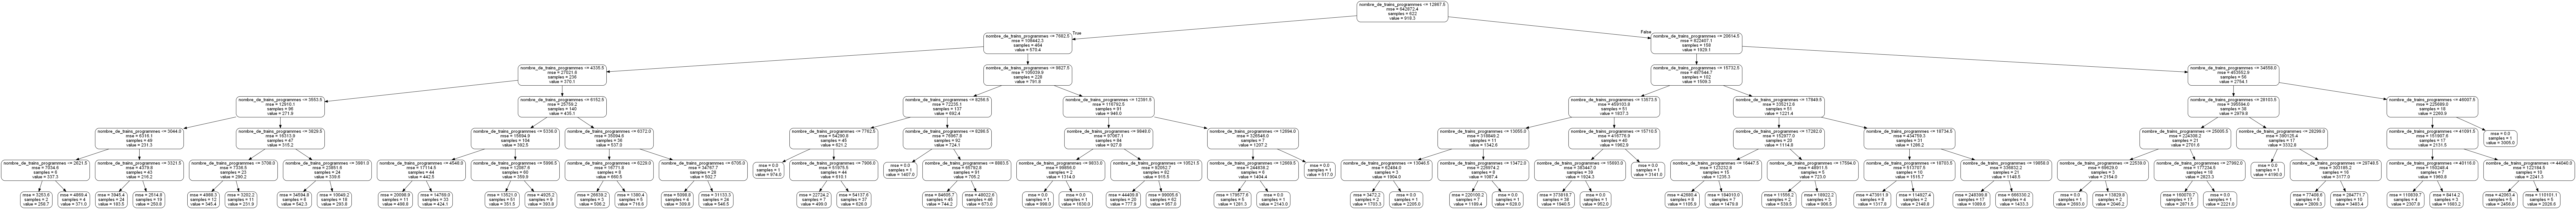

In [23]:
# Limit depth of tree to 6 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 6)
rf_small.fit(X_train, y_train.ravel())

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = ['nombre_de_trains_programmes'], rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')
display(Image(filename='small_tree.png'))

This is where we are supposed to run our model, and to see if our predictions fits the actual data.

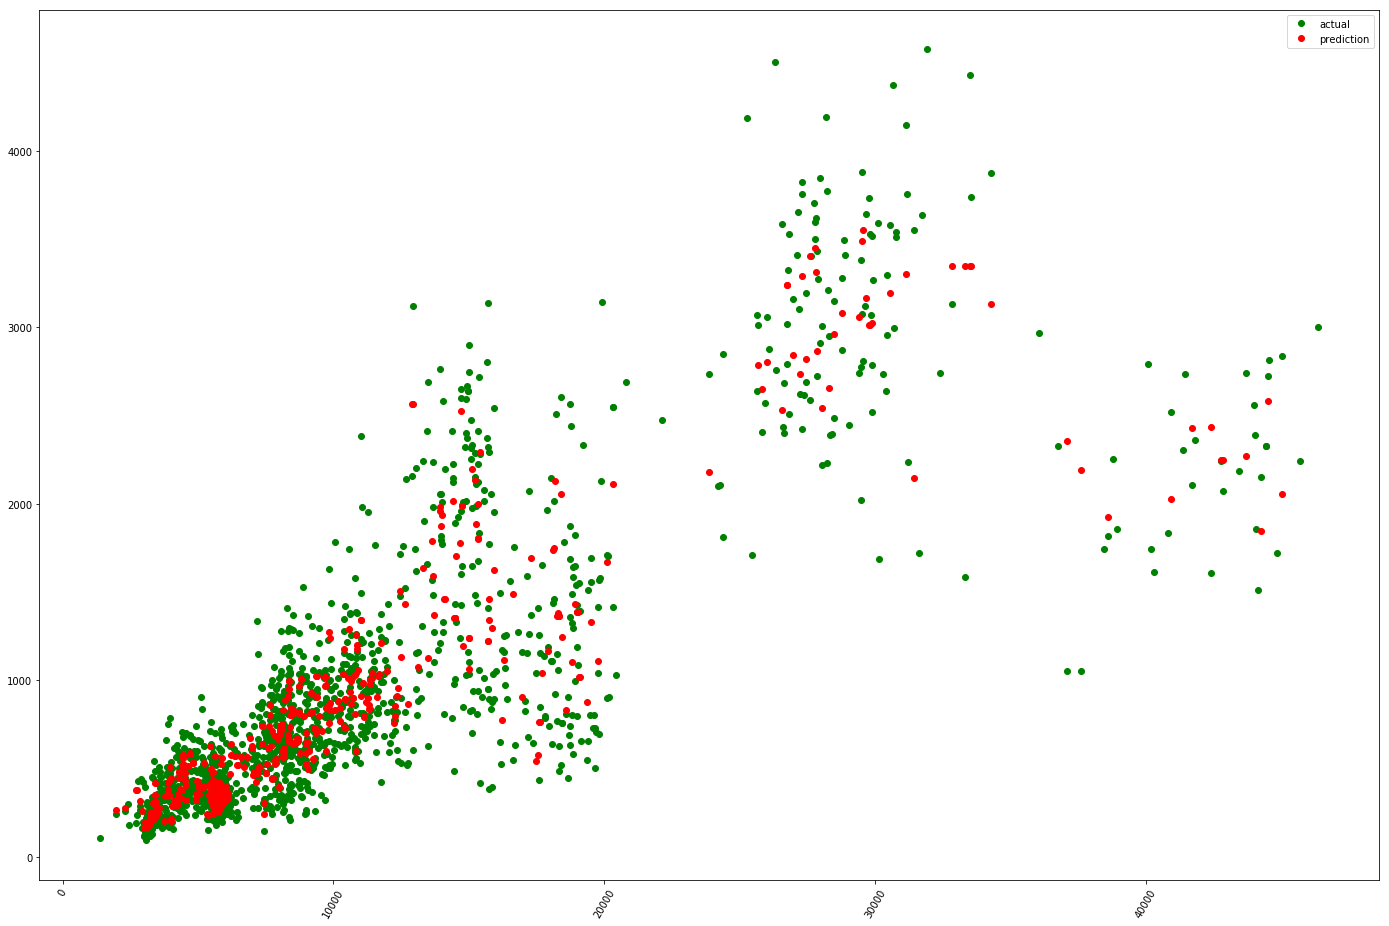

In [24]:
predictions_data = pd.DataFrame(data = {'nombre_de_trains_en_retard_a_l_arrivee': predictions})

matplotlib.pyplot.plot(ah['nombre_de_trains_programmes'], ah['nombre_de_trains_en_retard_a_l_arrivee'], 'go', label = 'actual')
matplotlib.pyplot.plot(X_test, predictions_data['nombre_de_trains_en_retard_a_l_arrivee'], 'ro', label = 'prediction')
matplotlib.pyplot.xticks(rotation = '60'); 
matplotlib.pyplot.legend()

We see that our predictions are actually pretty good compared to the disparity of the data, and that we can actually make some average predictions to simulate a normal behaviour. I was expecting this model to output values that would be completly out of place and totally unusable, but it turned out better than expected.<br>
<br>
In conclusion, we now have a model that, for any number of scheduled trains inputted, is able to predict the number of trains that will be delayed at the final stop while following the same pattern than for the actual data. This gives more realistic values, but which are less likely to be accurate. <br>But since the accuracy is irrevelant on data based from results mesured on the real world that depends on countless factors, we can still take this model into consideration.<br>
<br>
To sum up this part on supervised learning, we obtained two models that each have their own way of running (linear and random forest), and outputs different values for each data inputted. In order to have more accurate predictions, an idea of improvement would be to merge the results given by both models, which would give probably better results. For the time being, the random forest seems closer to the real life situation anticipation, while the linear model is only considerating a situation where there is no external constraint.